#### BERT

https://www.youtube.com/watch?v=RgpANRh44ao

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 

In [6]:
df_train = pd.read_csv('original_train_data.csv')
df_test = pd.read_csv('original_test_data.csv')
#df_test = df_test[df_test['maslow']!='none']
#df_train = df_train[df_train['maslow']!='none']
df_test = df_test[['sentence','maslow']]
df_train = df_train[['sentence','maslow']]
df_full = pd.concat([df_train,df_test],axis = 0)
df_full

,sentence,maslow
0,Melissa never drank wine.Melissa broke up with...,physiological
1,Ray couldn't get an irritating tune out of his...,none
2,The family shared a basket of fries.The son at...,physiological
3,Poppy started going to dance school.She knew s...,stability
4,Our neighbor Tracy has a boy and a girl in ele...,love
...,...,...
4114,Candy heard that her very favorite band was pl...,esteem
4115,"Morgan loved riding her bicycle.One day, she r...",stability
4116,My father liked to eat oysters.One day he brou...,none
4117,"When I was a boy, I rode my bike down a local ...",none


In [7]:
df_full.maslow.unique()

array(['physiological', 'none', 'stability', 'love', 'esteem',
       'spiritual growth'], dtype=object)

In [8]:
df_full['maslow'] = df_full['maslow'].replace(['physiological','stability','love','esteem','spiritual growth','none'],['need','need','need','need','need','no need'])

In [9]:
df_full

,sentence,maslow
0,Melissa never drank wine.Melissa broke up with...,need
1,Ray couldn't get an irritating tune out of his...,no need
2,The family shared a basket of fries.The son at...,need
3,Poppy started going to dance school.She knew s...,need
4,Our neighbor Tracy has a boy and a girl in ele...,need
...,...,...
4114,Candy heard that her very favorite band was pl...,need
4115,"Morgan loved riding her bicycle.One day, she r...",need
4116,My father liked to eat oysters.One day he brou...,no need
4117,"When I was a boy, I rode my bike down a local ...",no need


In [10]:
!pip install text_hammer
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 18.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 33.2 MB/s 
     |████████████████████████████████| 6.6 MB 50.0 MB/s 
     |████████████████████████████████| 101 kB 12.8 MB/s 


In [11]:
from tqdm._tqdm_notebook import tqdm_notebook 
import text_hammer as th
tqdm_notebook.pandas()

def text_preprocessing(df, column_name):
    column = column_name 
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return(df)
df_cleaned = text_preprocessing(df_full,'sentence')

  0%|          | 0/20593 [00:00<?, ?it/s]

  0%|          | 0/20593 [00:00<?, ?it/s]

  0%|          | 0/20593 [00:00<?, ?it/s]

  0%|          | 0/20593 [00:00<?, ?it/s]

  0%|          | 0/20593 [00:00<?, ?it/s]

  0%|          | 0/20593 [00:00<?, ?it/s]

In [12]:
df_cleaned.head()

,sentence,maslow
0,melissa never drank winemelissa broke up with ...,need
1,ray could not get an irritating tune out of hi...,no need
2,the family shared a basket of friesthe son ate...,need
3,poppy started going to dance schoolshe knew sh...,need
4,our neighbor tracy has a boy and a girl in ele...,need


In [13]:
df_cleaned = df_cleaned.copy()

In [14]:
df_cleaned['num_words'] = df_cleaned.sentence.apply(lambda x:len(x.split()))
df_cleaned.head()

,sentence,maslow,num_words
0,melissa never drank winemelissa broke up with ...,need,18
1,ray could not get an irritating tune out of hi...,no need,11
2,the family shared a basket of friesthe son ate...,need,21
3,poppy started going to dance schoolshe knew sh...,need,27
4,our neighbor tracy has a boy and a girl in ele...,need,25


In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20593 entries, 0 to 4118
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   20593 non-null  object
 1   maslow     20593 non-null  object
 2   num_words  20593 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 643.5+ KB


In [22]:
df_cleaned['maslow'] = df_cleaned.maslow.astype('category')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20593 entries, 0 to 4118
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sentence   20593 non-null  object  
 1   maslow     20593 non-null  category
 2   num_words  20593 non-null  int64   
dtypes: category(1), int64(1), object(1)
memory usage: 502.9+ KB


In [23]:
print(df_cleaned.maslow.unique())

[0, 1]
Categories (2, int64): [0, 1]


In [24]:
df_cleaned.maslow

0       0
1       1
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    1
4117    1
4118    0
Name: maslow, Length: 20593, dtype: category
Categories (2, int64): [0, 1]

In [25]:
print(df_cleaned.maslow.cat.codes)

0       0
1       1
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    1
4117    1
4118    0
Length: 20593, dtype: int8


In [26]:
#encoded_dict = {'esteem':0, 'love':1, 'none':2, 'physiological':3, 'spiritual growth':4, 'stability':5}
encoded_dict = {'need':0, 'no need':1}
df_cleaned['maslow'] = df_cleaned.maslow.cat.codes
df_cleaned.maslow

0       0
1       1
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    1
4117    1
4118    0
Name: maslow, Length: 20593, dtype: int8

In [27]:
df_cleaned.head()

,sentence,maslow,num_words
0,melissa never drank winemelissa broke up with ...,0,18
1,ray could not get an irritating tune out of hi...,1,11
2,the family shared a basket of friesthe son ate...,0,21
3,poppy started going to dance schoolshe knew sh...,0,27
4,our neighbor tracy has a boy and a girl in ele...,0,25


In [28]:
df_cleaned.num_words.max()

67

In [29]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df_cleaned, test_size = 0.2, random_state = 0, stratify = df_cleaned.maslow)
print(data_train.shape)
print(data_test.shape)

(16474, 3)
(4119, 3)


In [30]:
from tensorflow.keras.utils import to_categorical
to_categorical(data_train.maslow)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [31]:
from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [32]:
#tokenizer.save_pretrained('bert-tokenizer')
#bert.save_pretrained('bert-model')

In [33]:
#import shutil 
#shutil.make_archive('bert-tokenizer','zip','bert-tokenizer')
#shutil.make_archive('bert-model','zip','bert-model')

In [34]:
#from transformers import BertTokenizer, TFBertModel, BertConfig, TFDistilBertModel, DistilBertTokenizer, DistilBertConfig
#dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

In [35]:
x_train = tokenizer(
    text = data_train.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

In [36]:
x_train

{'input_ids': <tf.Tensor: shape=(16474, 70), dtype=int32, numpy=
array([[  101, 21718,  1306, ...,     0,     0,     0],
       [  101,  1103, 11209, ...,     0,     0,     0],
       [  101,  2393,  4396, ...,     0,     0,     0],
       ...,
       [  101, 12972,  1179, ...,     0,     0,     0],
       [  101,  1122,  1108, ...,     0,     0,     0],
       [  101,  8050,  2312, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(16474, 70), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [37]:
x_test

{'input_ids': <tf.Tensor: shape=(4119, 70), dtype=int32, numpy=
array([[  101,  1126,  5213, ...,     0,     0,     0],
       [  101, 21718, 10659, ...,     0,     0,     0],
       [  101, 24181, 15644, ...,     0,     0,     0],
       ...,
       [  101,   178,  1198, ...,     0,     0,     0],
       [  101, 15925,  2315, ...,     0,     0,     0],
       [  101,   174,  5242, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(4119, 70), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [38]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.initializers import TruncatedNormal 
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf 
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [41]:
max_len = 70 
input_ids = Input(shape = (max_len,), dtype = tf.int32, name = 'input_ids')
input_mask = Input(shape = (max_len,), dtype = tf.int32, name = 'attention_mask') 
embeddings = bert(input_ids, attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation = 'relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(2, activation = 'sigmoid')(out)
model = tf.keras.Model(inputs = [input_ids, input_mask], outputs = y)
model.layers[2].trainable = True

In [42]:
model.layers

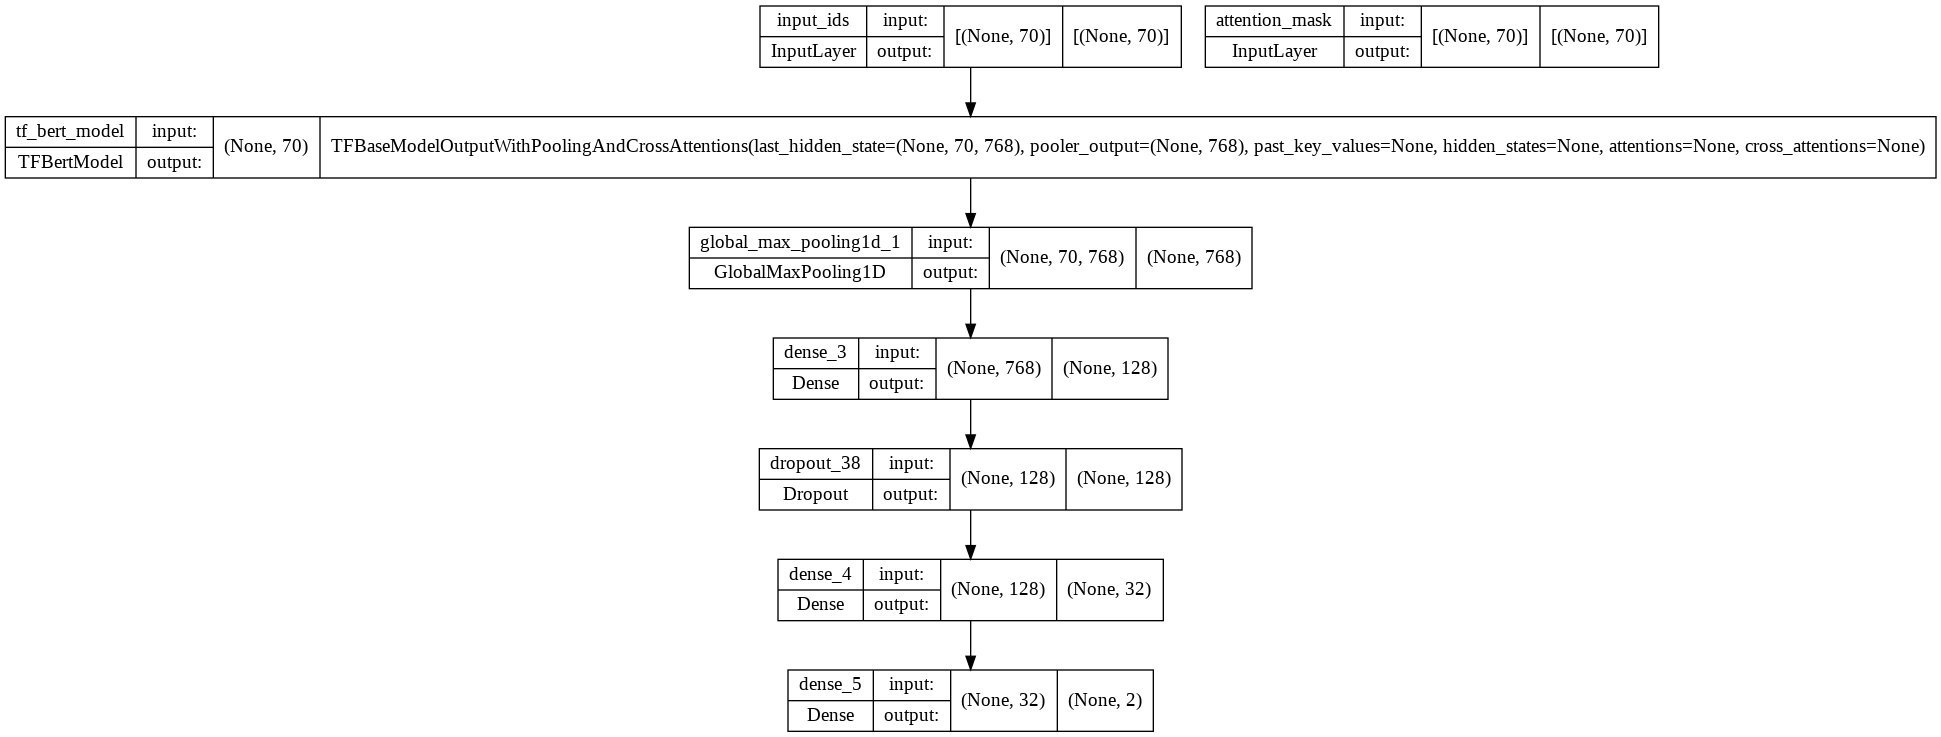

In [43]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [44]:
optimizer = Adam(
    learning_rate = 5e-05,
    epsilon = 1e-08,
    decay = 0.01,
    clipnorm = 1.0
)

#loss = CategoricalCrossentropy() 
metric = CategoricalAccuracy('balanced_accuracy')
model.compile(optimizer = optimizer, loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = metric)

In [45]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [47]:
for i in range(5):
    answer = int(input("Do you want to run another epoch?1/0: "))
    if answer == 1:
        train_history = model.fit(x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
                            y = to_categorical(data_train.maslow),
                            validation_data = (
                                {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}, to_categorical(data_test.maslow)
                            ),
                            epochs = 5,
                            batch_size = 36,
                            )
    else:
        break

Do you want to run another epoch?1/0: 1
Epoch 1/5


  1/458 [..............................] - ETA: 16:43 - loss: 1.2803 - balanced_accuracy: 0.2500

  2/458 [..............................] - ETA: 5:14 - loss: 0.9308 - balanced_accuracy: 0.5000 

  3/458 [..............................] - ETA: 5:11 - loss: 0.7370 - balanced_accuracy: 0.6389

  4/458 [..............................] - ETA: 5:10 - loss: 0.6583 - balanced_accuracy: 0.6944

  5/458 [..............................] - ETA: 5:09 - loss: 0.6145 - balanced_accuracy: 0.7222

  6/458 [..............................] - ETA: 5:08 - loss: 0.5611 - balanced_accuracy: 0.7546

  7/458 [..............................] - ETA: 5:08 - loss: 0.5043 - balanced_accuracy: 0.7857

  8/458 [..............................] - ETA: 5:07 - loss: 0.4766 - balanced_accuracy: 0.8021

  9/458 [..............................] - ETA: 5:07 - loss: 0.4805 - balanced_accuracy: 0.8056

 10/458 [..............................] - ETA: 5:07 - loss: 0.4672 - balanced_accuracy: 0.8139

 11/458 [..............................] - ETA: 5:07 - loss: 0.4639 - balanced_accuracy: 0.8182

 12/458 [..............................] - ETA: 5:06 - loss: 0.4519 - balanced_accuracy: 0.8241

 13/458 [..............................] - ETA: 5:06 - loss: 0.4567 - balanced_accuracy: 0.8226

 14/458 [..............................] - ETA: 5:05 - loss: 0.4561 - balanced_accuracy: 0.8254

 15/458 [..............................] - ETA: 5:04 - loss: 0.4476 - balanced_accuracy: 0.8296

 16/458 [>.............................] - ETA: 5:04 - loss: 0.4344 - balanced_accuracy: 0.8385

 17/458 [>.............................] - ETA: 5:03 - loss: 0.4354 - balanced_accuracy: 0.8382

 18/458 [>.............................] - ETA: 5:03 - loss: 0.4354 - balanced_accuracy: 0.8380

 19/458 [>.............................] - ETA: 5:02 - loss: 0.4288 - balanced_accuracy: 0.8421

 20/458 [>.............................] - ETA: 5:02 - loss: 0.4211 - balanced_accuracy: 0.8458

 21/458 [>.............................] - ETA: 5:01 - loss: 0.4191 - balanced_accuracy: 0.8479

 22/458 [>.............................] - ETA: 5:01 - loss: 0.4131 - balanced_accuracy: 0.8510

 23/458 [>.............................] - ETA: 5:00 - loss: 0.4203 - balanced_accuracy: 0.8490

 24/458 [>.............................] - ETA: 5:00 - loss: 0.4234 - balanced_accuracy: 0.8484

 25/458 [>.............................] - ETA: 4:59 - loss: 0.4191 - balanced_accuracy: 0.8500

 26/458 [>.............................] - ETA: 4:59 - loss: 0.4164 - balanced_accuracy: 0.8515

 27/458 [>.............................] - ETA: 4:58 - loss: 0.4094 - balanced_accuracy: 0.8549

 28/458 [>.............................] - ETA: 5:02 - loss: 0.4111 - balanced_accuracy: 0.8542

 29/458 [>.............................] - ETA: 5:01 - loss: 0.4069 - balanced_accuracy: 0.8563

 30/458 [>.............................] - ETA: 5:01 - loss: 0.4048 - balanced_accuracy: 0.8574

 31/458 [=>............................] - ETA: 5:00 - loss: 0.4040 - balanced_accuracy: 0.8584

 32/458 [=>............................] - ETA: 4:59 - loss: 0.4003 - balanced_accuracy: 0.8602

 33/458 [=>............................] - ETA: 4:58 - loss: 0.3959 - balanced_accuracy: 0.8628

 34/458 [=>............................] - ETA: 4:58 - loss: 0.3966 - balanced_accuracy: 0.8619

 35/458 [=>............................] - ETA: 4:57 - loss: 0.4003 - balanced_accuracy: 0.8603

 36/458 [=>............................] - ETA: 4:56 - loss: 0.4007 - balanced_accuracy: 0.8603

 37/458 [=>............................] - ETA: 4:55 - loss: 0.3983 - balanced_accuracy: 0.8611

 38/458 [=>............................] - ETA: 4:54 - loss: 0.3999 - balanced_accuracy: 0.8604

 39/458 [=>............................] - ETA: 4:54 - loss: 0.3941 - balanced_accuracy: 0.8632

 40/458 [=>............................] - ETA: 4:53 - loss: 0.3923 - balanced_accuracy: 0.8639

 41/458 [=>............................] - ETA: 4:52 - loss: 0.3891 - balanced_accuracy: 0.8652

 42/458 [=>............................] - ETA: 4:51 - loss: 0.3865 - balanced_accuracy: 0.8664

 43/458 [=>............................] - ETA: 4:51 - loss: 0.3870 - balanced_accuracy: 0.8663

 44/458 [=>............................] - ETA: 4:50 - loss: 0.3871 - balanced_accuracy: 0.8662

 45/458 [=>............................] - ETA: 4:49 - loss: 0.3904 - balanced_accuracy: 0.8648

 46/458 [==>...........................] - ETA: 4:49 - loss: 0.3917 - balanced_accuracy: 0.8641

 47/458 [==>...........................] - ETA: 4:48 - loss: 0.3886 - balanced_accuracy: 0.8658

 48/458 [==>...........................] - ETA: 4:47 - loss: 0.3855 - balanced_accuracy: 0.8675

 49/458 [==>...........................] - ETA: 4:47 - loss: 0.3824 - balanced_accuracy: 0.8690

 50/458 [==>...........................] - ETA: 4:46 - loss: 0.3841 - balanced_accuracy: 0.8678

 51/458 [==>...........................] - ETA: 4:45 - loss: 0.3811 - balanced_accuracy: 0.8693

 52/458 [==>...........................] - ETA: 4:45 - loss: 0.3798 - balanced_accuracy: 0.8697

 53/458 [==>...........................] - ETA: 4:44 - loss: 0.3830 - balanced_accuracy: 0.8679

 54/458 [==>...........................] - ETA: 4:43 - loss: 0.3830 - balanced_accuracy: 0.8683

 55/458 [==>...........................] - ETA: 4:42 - loss: 0.3809 - balanced_accuracy: 0.8692

 56/458 [==>...........................] - ETA: 4:42 - loss: 0.3803 - balanced_accuracy: 0.8695

 57/458 [==>...........................] - ETA: 4:41 - loss: 0.3818 - balanced_accuracy: 0.8694

 58/458 [==>...........................] - ETA: 4:40 - loss: 0.3800 - balanced_accuracy: 0.8702

 59/458 [==>...........................] - ETA: 4:40 - loss: 0.3802 - balanced_accuracy: 0.8701

 60/458 [==>...........................] - ETA: 4:39 - loss: 0.3804 - balanced_accuracy: 0.8694

 61/458 [==>...........................] - ETA: 4:38 - loss: 0.3801 - balanced_accuracy: 0.8698

 62/458 [===>..........................] - ETA: 4:37 - loss: 0.3795 - balanced_accuracy: 0.8701

 63/458 [===>..........................] - ETA: 4:37 - loss: 0.3783 - balanced_accuracy: 0.8704

 64/458 [===>..........................] - ETA: 4:36 - loss: 0.3786 - balanced_accuracy: 0.8702

 65/458 [===>..........................] - ETA: 4:35 - loss: 0.3762 - balanced_accuracy: 0.8714

 66/458 [===>..........................] - ETA: 4:35 - loss: 0.3754 - balanced_accuracy: 0.8716

 67/458 [===>..........................] - ETA: 4:34 - loss: 0.3789 - balanced_accuracy: 0.8702

 68/458 [===>..........................] - ETA: 4:33 - loss: 0.3789 - balanced_accuracy: 0.8701

 69/458 [===>..........................] - ETA: 4:33 - loss: 0.3798 - balanced_accuracy: 0.8700

 70/458 [===>..........................] - ETA: 4:32 - loss: 0.3801 - balanced_accuracy: 0.8698

 71/458 [===>..........................] - ETA: 4:31 - loss: 0.3779 - balanced_accuracy: 0.8713

 72/458 [===>..........................] - ETA: 4:30 - loss: 0.3776 - balanced_accuracy: 0.8715

 73/458 [===>..........................] - ETA: 4:30 - loss: 0.3766 - balanced_accuracy: 0.8721

 74/458 [===>..........................] - ETA: 4:29 - loss: 0.3755 - balanced_accuracy: 0.8727

 75/458 [===>..........................] - ETA: 4:29 - loss: 0.3765 - balanced_accuracy: 0.8722

 76/458 [===>..........................] - ETA: 4:30 - loss: 0.3767 - balanced_accuracy: 0.8721

 77/458 [====>.........................] - ETA: 4:30 - loss: 0.3758 - balanced_accuracy: 0.8727

 78/458 [====>.........................] - ETA: 4:29 - loss: 0.3764 - balanced_accuracy: 0.8725

 79/458 [====>.........................] - ETA: 4:28 - loss: 0.3755 - balanced_accuracy: 0.8731

 80/458 [====>.........................] - ETA: 4:27 - loss: 0.3778 - balanced_accuracy: 0.8719

 81/458 [====>.........................] - ETA: 4:27 - loss: 0.3787 - balanced_accuracy: 0.8714

 82/458 [====>.........................] - ETA: 4:26 - loss: 0.3788 - balanced_accuracy: 0.8713

 83/458 [====>.........................] - ETA: 4:25 - loss: 0.3779 - balanced_accuracy: 0.8718

 84/458 [====>.........................] - ETA: 4:25 - loss: 0.3763 - balanced_accuracy: 0.8727

 85/458 [====>.........................] - ETA: 4:24 - loss: 0.3769 - balanced_accuracy: 0.8722

 86/458 [====>.........................] - ETA: 4:23 - loss: 0.3766 - balanced_accuracy: 0.8727

 87/458 [====>.........................] - ETA: 4:22 - loss: 0.3765 - balanced_accuracy: 0.8729

 88/458 [====>.........................] - ETA: 4:22 - loss: 0.3760 - balanced_accuracy: 0.8731

 89/458 [====>.........................] - ETA: 4:21 - loss: 0.3748 - balanced_accuracy: 0.8736

 90/458 [====>.........................] - ETA: 4:20 - loss: 0.3745 - balanced_accuracy: 0.8738

 91/458 [====>.........................] - ETA: 4:20 - loss: 0.3721 - balanced_accuracy: 0.8748

 92/458 [=====>........................] - ETA: 4:19 - loss: 0.3731 - balanced_accuracy: 0.8744

 93/458 [=====>........................] - ETA: 4:18 - loss: 0.3735 - balanced_accuracy: 0.8743

 94/458 [=====>........................] - ETA: 4:17 - loss: 0.3716 - balanced_accuracy: 0.8750

 95/458 [=====>........................] - ETA: 4:17 - loss: 0.3720 - balanced_accuracy: 0.8749

 96/458 [=====>........................] - ETA: 4:16 - loss: 0.3723 - balanced_accuracy: 0.8747

 97/458 [=====>........................] - ETA: 4:15 - loss: 0.3713 - balanced_accuracy: 0.8751

 98/458 [=====>........................] - ETA: 4:15 - loss: 0.3729 - balanced_accuracy: 0.8744

 99/458 [=====>........................] - ETA: 4:14 - loss: 0.3740 - balanced_accuracy: 0.8740

100/458 [=====>........................] - ETA: 4:13 - loss: 0.3754 - balanced_accuracy: 0.8733

101/458 [=====>........................] - ETA: 4:12 - loss: 0.3751 - balanced_accuracy: 0.8735

102/458 [=====>........................] - ETA: 4:12 - loss: 0.3740 - balanced_accuracy: 0.8742

103/458 [=====>........................] - ETA: 4:11 - loss: 0.3744 - balanced_accuracy: 0.8738

104/458 [=====>........................] - ETA: 4:10 - loss: 0.3736 - balanced_accuracy: 0.8742

105/458 [=====>........................] - ETA: 4:10 - loss: 0.3735 - balanced_accuracy: 0.8743

106/458 [=====>........................] - ETA: 4:09 - loss: 0.3725 - balanced_accuracy: 0.8747

107/458 [======>.......................] - ETA: 4:08 - loss: 0.3732 - balanced_accuracy: 0.8741

108/458 [======>.......................] - ETA: 4:07 - loss: 0.3726 - balanced_accuracy: 0.8745

109/458 [======>.......................] - ETA: 4:07 - loss: 0.3709 - balanced_accuracy: 0.8754

110/458 [======>.......................] - ETA: 4:06 - loss: 0.3706 - balanced_accuracy: 0.8755

111/458 [======>.......................] - ETA: 4:05 - loss: 0.3697 - balanced_accuracy: 0.8759

112/458 [======>.......................] - ETA: 4:05 - loss: 0.3701 - balanced_accuracy: 0.8757

113/458 [======>.......................] - ETA: 4:04 - loss: 0.3711 - balanced_accuracy: 0.8754

114/458 [======>.......................] - ETA: 4:03 - loss: 0.3704 - balanced_accuracy: 0.8757

115/458 [======>.......................] - ETA: 4:03 - loss: 0.3695 - balanced_accuracy: 0.8761

116/458 [======>.......................] - ETA: 4:02 - loss: 0.3713 - balanced_accuracy: 0.8752

117/458 [======>.......................] - ETA: 4:01 - loss: 0.3731 - balanced_accuracy: 0.8744

118/458 [======>.......................] - ETA: 4:00 - loss: 0.3749 - balanced_accuracy: 0.8734

119/458 [======>.......................] - ETA: 4:00 - loss: 0.3755 - balanced_accuracy: 0.8730

120/458 [======>.......................] - ETA: 3:59 - loss: 0.3748 - balanced_accuracy: 0.8734

121/458 [======>.......................] - ETA: 3:58 - loss: 0.3741 - balanced_accuracy: 0.8740

122/458 [======>.......................] - ETA: 3:58 - loss: 0.3740 - balanced_accuracy: 0.8743

123/458 [=======>......................] - ETA: 3:57 - loss: 0.3738 - balanced_accuracy: 0.8742

124/458 [=======>......................] - ETA: 3:56 - loss: 0.3739 - balanced_accuracy: 0.8741

125/458 [=======>......................] - ETA: 3:55 - loss: 0.3738 - balanced_accuracy: 0.8742

126/458 [=======>......................] - ETA: 3:55 - loss: 0.3733 - balanced_accuracy: 0.8748

127/458 [=======>......................] - ETA: 3:54 - loss: 0.3727 - balanced_accuracy: 0.8751

128/458 [=======>......................] - ETA: 3:53 - loss: 0.3713 - balanced_accuracy: 0.8759

129/458 [=======>......................] - ETA: 3:53 - loss: 0.3704 - balanced_accuracy: 0.8762

130/458 [=======>......................] - ETA: 3:52 - loss: 0.3720 - balanced_accuracy: 0.8754

131/458 [=======>......................] - ETA: 3:51 - loss: 0.3729 - balanced_accuracy: 0.8749

132/458 [=======>......................] - ETA: 3:50 - loss: 0.3718 - balanced_accuracy: 0.8754

133/458 [=======>......................] - ETA: 3:50 - loss: 0.3710 - balanced_accuracy: 0.8757

134/458 [=======>......................] - ETA: 3:49 - loss: 0.3714 - balanced_accuracy: 0.8756

135/458 [=======>......................] - ETA: 3:48 - loss: 0.3711 - balanced_accuracy: 0.8757

136/458 [=======>......................] - ETA: 3:48 - loss: 0.3703 - balanced_accuracy: 0.8760

137/458 [=======>......................] - ETA: 3:47 - loss: 0.3698 - balanced_accuracy: 0.8761

138/458 [========>.....................] - ETA: 3:46 - loss: 0.3708 - balanced_accuracy: 0.8754

139/458 [========>.....................] - ETA: 3:46 - loss: 0.3726 - balanced_accuracy: 0.8745

140/458 [========>.....................] - ETA: 3:45 - loss: 0.3719 - balanced_accuracy: 0.8748

141/458 [========>.....................] - ETA: 3:44 - loss: 0.3723 - balanced_accuracy: 0.8745

142/458 [========>.....................] - ETA: 3:43 - loss: 0.3730 - balanced_accuracy: 0.8740

143/458 [========>.....................] - ETA: 3:43 - loss: 0.3726 - balanced_accuracy: 0.8741

144/458 [========>.....................] - ETA: 3:42 - loss: 0.3716 - balanced_accuracy: 0.8748

145/458 [========>.....................] - ETA: 3:41 - loss: 0.3709 - balanced_accuracy: 0.8753

146/458 [========>.....................] - ETA: 3:41 - loss: 0.3701 - balanced_accuracy: 0.8756

147/458 [========>.....................] - ETA: 3:40 - loss: 0.3707 - balanced_accuracy: 0.8751

148/458 [========>.....................] - ETA: 3:39 - loss: 0.3697 - balanced_accuracy: 0.8758

149/458 [========>.....................] - ETA: 3:38 - loss: 0.3706 - balanced_accuracy: 0.8755

150/458 [========>.....................] - ETA: 3:38 - loss: 0.3712 - balanced_accuracy: 0.8752

151/458 [========>.....................] - ETA: 3:37 - loss: 0.3710 - balanced_accuracy: 0.8751

152/458 [========>.....................] - ETA: 3:36 - loss: 0.3709 - balanced_accuracy: 0.8752

153/458 [=========>....................] - ETA: 3:36 - loss: 0.3709 - balanced_accuracy: 0.8751

154/458 [=========>....................] - ETA: 3:35 - loss: 0.3703 - balanced_accuracy: 0.8754

155/458 [=========>....................] - ETA: 3:34 - loss: 0.3699 - balanced_accuracy: 0.8756

156/458 [=========>....................] - ETA: 3:34 - loss: 0.3697 - balanced_accuracy: 0.8759

157/458 [=========>....................] - ETA: 3:33 - loss: 0.3688 - balanced_accuracy: 0.8762

158/458 [=========>....................] - ETA: 3:32 - loss: 0.3695 - balanced_accuracy: 0.8759

159/458 [=========>....................] - ETA: 3:31 - loss: 0.3712 - balanced_accuracy: 0.8751

160/458 [=========>....................] - ETA: 3:31 - loss: 0.3706 - balanced_accuracy: 0.8753

161/458 [=========>....................] - ETA: 3:30 - loss: 0.3703 - balanced_accuracy: 0.8753

162/458 [=========>....................] - ETA: 3:29 - loss: 0.3712 - balanced_accuracy: 0.8748

163/458 [=========>....................] - ETA: 3:29 - loss: 0.3714 - balanced_accuracy: 0.8746

164/458 [=========>....................] - ETA: 3:28 - loss: 0.3705 - balanced_accuracy: 0.8750

165/458 [=========>....................] - ETA: 3:27 - loss: 0.3707 - balanced_accuracy: 0.8746

166/458 [=========>....................] - ETA: 3:27 - loss: 0.3697 - balanced_accuracy: 0.8752

167/458 [=========>....................] - ETA: 3:26 - loss: 0.3707 - balanced_accuracy: 0.8744

168/458 [==========>...................] - ETA: 3:25 - loss: 0.3711 - balanced_accuracy: 0.8738

169/458 [==========>...................] - ETA: 3:24 - loss: 0.3707 - balanced_accuracy: 0.8741

170/458 [==========>...................] - ETA: 3:24 - loss: 0.3706 - balanced_accuracy: 0.8740

171/458 [==========>...................] - ETA: 3:23 - loss: 0.3705 - balanced_accuracy: 0.8743

172/458 [==========>...................] - ETA: 3:22 - loss: 0.3698 - balanced_accuracy: 0.8747

173/458 [==========>...................] - ETA: 3:22 - loss: 0.3698 - balanced_accuracy: 0.8746

174/458 [==========>...................] - ETA: 3:21 - loss: 0.3696 - balanced_accuracy: 0.8748

175/458 [==========>...................] - ETA: 3:20 - loss: 0.3694 - balanced_accuracy: 0.8748

176/458 [==========>...................] - ETA: 3:20 - loss: 0.3691 - balanced_accuracy: 0.8750

177/458 [==========>...................] - ETA: 3:19 - loss: 0.3695 - balanced_accuracy: 0.8749

178/458 [==========>...................] - ETA: 3:19 - loss: 0.3695 - balanced_accuracy: 0.8748

179/458 [==========>...................] - ETA: 3:18 - loss: 0.3703 - balanced_accuracy: 0.8746

180/458 [==========>...................] - ETA: 3:17 - loss: 0.3694 - balanced_accuracy: 0.8750

181/458 [==========>...................] - ETA: 3:16 - loss: 0.3692 - balanced_accuracy: 0.8751

182/458 [==========>...................] - ETA: 3:16 - loss: 0.3696 - balanced_accuracy: 0.8748

183/458 [==========>...................] - ETA: 3:15 - loss: 0.3694 - balanced_accuracy: 0.8749

184/458 [===========>..................] - ETA: 3:14 - loss: 0.3700 - balanced_accuracy: 0.8747

185/458 [===========>..................] - ETA: 3:14 - loss: 0.3700 - balanced_accuracy: 0.8746

186/458 [===========>..................] - ETA: 3:13 - loss: 0.3705 - balanced_accuracy: 0.8744

187/458 [===========>..................] - ETA: 3:12 - loss: 0.3705 - balanced_accuracy: 0.8743

188/458 [===========>..................] - ETA: 3:12 - loss: 0.3699 - balanced_accuracy: 0.8747

189/458 [===========>..................] - ETA: 3:11 - loss: 0.3697 - balanced_accuracy: 0.8748

190/458 [===========>..................] - ETA: 3:10 - loss: 0.3702 - balanced_accuracy: 0.8746

191/458 [===========>..................] - ETA: 3:09 - loss: 0.3696 - balanced_accuracy: 0.8749

192/458 [===========>..................] - ETA: 3:09 - loss: 0.3701 - balanced_accuracy: 0.8746

193/458 [===========>..................] - ETA: 3:08 - loss: 0.3712 - balanced_accuracy: 0.8741

194/458 [===========>..................] - ETA: 3:07 - loss: 0.3705 - balanced_accuracy: 0.8744

195/458 [===========>..................] - ETA: 3:07 - loss: 0.3707 - balanced_accuracy: 0.8742

196/458 [===========>..................] - ETA: 3:06 - loss: 0.3700 - balanced_accuracy: 0.8746

197/458 [===========>..................] - ETA: 3:05 - loss: 0.3699 - balanced_accuracy: 0.8745

198/458 [===========>..................] - ETA: 3:04 - loss: 0.3694 - balanced_accuracy: 0.8749

199/458 [============>.................] - ETA: 3:04 - loss: 0.3690 - balanced_accuracy: 0.8749

200/458 [============>.................] - ETA: 3:03 - loss: 0.3705 - balanced_accuracy: 0.8740

201/458 [============>.................] - ETA: 3:02 - loss: 0.3702 - balanced_accuracy: 0.8741

202/458 [============>.................] - ETA: 3:02 - loss: 0.3706 - balanced_accuracy: 0.8738

203/458 [============>.................] - ETA: 3:01 - loss: 0.3704 - balanced_accuracy: 0.8737

204/458 [============>.................] - ETA: 3:00 - loss: 0.3701 - balanced_accuracy: 0.8738

205/458 [============>.................] - ETA: 3:00 - loss: 0.3693 - balanced_accuracy: 0.8740

206/458 [============>.................] - ETA: 2:59 - loss: 0.3696 - balanced_accuracy: 0.8738

207/458 [============>.................] - ETA: 2:58 - loss: 0.3699 - balanced_accuracy: 0.8736

208/458 [============>.................] - ETA: 2:57 - loss: 0.3697 - balanced_accuracy: 0.8738

209/458 [============>.................] - ETA: 2:57 - loss: 0.3695 - balanced_accuracy: 0.8737

210/458 [============>.................] - ETA: 2:56 - loss: 0.3693 - balanced_accuracy: 0.8738

211/458 [============>.................] - ETA: 2:55 - loss: 0.3696 - balanced_accuracy: 0.8736

212/458 [============>.................] - ETA: 2:55 - loss: 0.3688 - balanced_accuracy: 0.8741

213/458 [============>.................] - ETA: 2:54 - loss: 0.3686 - balanced_accuracy: 0.8742

214/458 [=============>................] - ETA: 2:53 - loss: 0.3695 - balanced_accuracy: 0.8734

215/458 [=============>................] - ETA: 2:53 - loss: 0.3700 - balanced_accuracy: 0.8733

216/458 [=============>................] - ETA: 2:52 - loss: 0.3699 - balanced_accuracy: 0.8733

217/458 [=============>................] - ETA: 2:51 - loss: 0.3691 - balanced_accuracy: 0.8737

218/458 [=============>................] - ETA: 2:51 - loss: 0.3697 - balanced_accuracy: 0.8733

219/458 [=============>................] - ETA: 2:50 - loss: 0.3691 - balanced_accuracy: 0.8737

220/458 [=============>................] - ETA: 2:49 - loss: 0.3689 - balanced_accuracy: 0.8739

221/458 [=============>................] - ETA: 2:48 - loss: 0.3692 - balanced_accuracy: 0.8737

222/458 [=============>................] - ETA: 2:48 - loss: 0.3694 - balanced_accuracy: 0.8736

223/458 [=============>................] - ETA: 2:47 - loss: 0.3698 - balanced_accuracy: 0.8733

224/458 [=============>................] - ETA: 2:46 - loss: 0.3695 - balanced_accuracy: 0.8735

225/458 [=============>................] - ETA: 2:46 - loss: 0.3688 - balanced_accuracy: 0.8738

226/458 [=============>................] - ETA: 2:45 - loss: 0.3689 - balanced_accuracy: 0.8738

227/458 [=============>................] - ETA: 2:44 - loss: 0.3684 - balanced_accuracy: 0.8741

228/458 [=============>................] - ETA: 2:43 - loss: 0.3687 - balanced_accuracy: 0.8739

229/458 [==============>...............] - ETA: 2:43 - loss: 0.3684 - balanced_accuracy: 0.8740

230/458 [==============>...............] - ETA: 2:42 - loss: 0.3690 - balanced_accuracy: 0.8737

231/458 [==============>...............] - ETA: 2:41 - loss: 0.3692 - balanced_accuracy: 0.8735

232/458 [==============>...............] - ETA: 2:41 - loss: 0.3691 - balanced_accuracy: 0.8737

233/458 [==============>...............] - ETA: 2:40 - loss: 0.3689 - balanced_accuracy: 0.8739

234/458 [==============>...............] - ETA: 2:39 - loss: 0.3688 - balanced_accuracy: 0.8739

235/458 [==============>...............] - ETA: 2:38 - loss: 0.3683 - balanced_accuracy: 0.8741

236/458 [==============>...............] - ETA: 2:38 - loss: 0.3686 - balanced_accuracy: 0.8739

237/458 [==============>...............] - ETA: 2:37 - loss: 0.3692 - balanced_accuracy: 0.8737

238/458 [==============>...............] - ETA: 2:36 - loss: 0.3695 - balanced_accuracy: 0.8735

239/458 [==============>...............] - ETA: 2:36 - loss: 0.3697 - balanced_accuracy: 0.8734

240/458 [==============>...............] - ETA: 2:35 - loss: 0.3689 - balanced_accuracy: 0.8737

241/458 [==============>...............] - ETA: 2:34 - loss: 0.3690 - balanced_accuracy: 0.8737

242/458 [==============>...............] - ETA: 2:34 - loss: 0.3683 - balanced_accuracy: 0.8740

243/458 [==============>...............] - ETA: 2:33 - loss: 0.3676 - balanced_accuracy: 0.8743

244/458 [==============>...............] - ETA: 2:32 - loss: 0.3671 - balanced_accuracy: 0.8744

245/458 [===============>..............] - ETA: 2:31 - loss: 0.3676 - balanced_accuracy: 0.8741

246/458 [===============>..............] - ETA: 2:31 - loss: 0.3671 - balanced_accuracy: 0.8744

247/458 [===============>..............] - ETA: 2:30 - loss: 0.3682 - balanced_accuracy: 0.8738

248/458 [===============>..............] - ETA: 2:29 - loss: 0.3682 - balanced_accuracy: 0.8738

249/458 [===============>..............] - ETA: 2:29 - loss: 0.3682 - balanced_accuracy: 0.8737

250/458 [===============>..............] - ETA: 2:28 - loss: 0.3684 - balanced_accuracy: 0.8737

251/458 [===============>..............] - ETA: 2:27 - loss: 0.3680 - balanced_accuracy: 0.8739

252/458 [===============>..............] - ETA: 2:26 - loss: 0.3687 - balanced_accuracy: 0.8738

253/458 [===============>..............] - ETA: 2:26 - loss: 0.3688 - balanced_accuracy: 0.8737

254/458 [===============>..............] - ETA: 2:25 - loss: 0.3689 - balanced_accuracy: 0.8737

255/458 [===============>..............] - ETA: 2:24 - loss: 0.3694 - balanced_accuracy: 0.8734

256/458 [===============>..............] - ETA: 2:24 - loss: 0.3696 - balanced_accuracy: 0.8732

257/458 [===============>..............] - ETA: 2:23 - loss: 0.3691 - balanced_accuracy: 0.8734

258/458 [===============>..............] - ETA: 2:22 - loss: 0.3693 - balanced_accuracy: 0.8734

259/458 [===============>..............] - ETA: 2:21 - loss: 0.3689 - balanced_accuracy: 0.8734

260/458 [================>.............] - ETA: 2:21 - loss: 0.3684 - balanced_accuracy: 0.8736

261/458 [================>.............] - ETA: 2:20 - loss: 0.3684 - balanced_accuracy: 0.8736

262/458 [================>.............] - ETA: 2:19 - loss: 0.3680 - balanced_accuracy: 0.8737

263/458 [================>.............] - ETA: 2:19 - loss: 0.3679 - balanced_accuracy: 0.8737

264/458 [================>.............] - ETA: 2:18 - loss: 0.3678 - balanced_accuracy: 0.8736

265/458 [================>.............] - ETA: 2:17 - loss: 0.3675 - balanced_accuracy: 0.8738

266/458 [================>.............] - ETA: 2:17 - loss: 0.3675 - balanced_accuracy: 0.8735

267/458 [================>.............] - ETA: 2:16 - loss: 0.3681 - balanced_accuracy: 0.8733

268/458 [================>.............] - ETA: 2:15 - loss: 0.3682 - balanced_accuracy: 0.8731

269/458 [================>.............] - ETA: 2:14 - loss: 0.3679 - balanced_accuracy: 0.8733

270/458 [================>.............] - ETA: 2:14 - loss: 0.3686 - balanced_accuracy: 0.8729

271/458 [================>.............] - ETA: 2:13 - loss: 0.3685 - balanced_accuracy: 0.8730

272/458 [================>.............] - ETA: 2:12 - loss: 0.3684 - balanced_accuracy: 0.8730

273/458 [================>.............] - ETA: 2:12 - loss: 0.3688 - balanced_accuracy: 0.8728

274/458 [================>.............] - ETA: 2:11 - loss: 0.3687 - balanced_accuracy: 0.8729

275/458 [=================>............] - ETA: 2:10 - loss: 0.3693 - balanced_accuracy: 0.8727

276/458 [=================>............] - ETA: 2:09 - loss: 0.3693 - balanced_accuracy: 0.8727

277/458 [=================>............] - ETA: 2:09 - loss: 0.3689 - balanced_accuracy: 0.8729

278/458 [=================>............] - ETA: 2:08 - loss: 0.3689 - balanced_accuracy: 0.8729

279/458 [=================>............] - ETA: 2:07 - loss: 0.3684 - balanced_accuracy: 0.8733

280/458 [=================>............] - ETA: 2:07 - loss: 0.3679 - balanced_accuracy: 0.8733

281/458 [=================>............] - ETA: 2:06 - loss: 0.3682 - balanced_accuracy: 0.8731

282/458 [=================>............] - ETA: 2:05 - loss: 0.3681 - balanced_accuracy: 0.8730

283/458 [=================>............] - ETA: 2:05 - loss: 0.3682 - balanced_accuracy: 0.8729

284/458 [=================>............] - ETA: 2:04 - loss: 0.3678 - balanced_accuracy: 0.8731

285/458 [=================>............] - ETA: 2:03 - loss: 0.3677 - balanced_accuracy: 0.8731

286/458 [=================>............] - ETA: 2:02 - loss: 0.3679 - balanced_accuracy: 0.8730

287/458 [=================>............] - ETA: 2:02 - loss: 0.3674 - balanced_accuracy: 0.8731

288/458 [=================>............] - ETA: 2:01 - loss: 0.3674 - balanced_accuracy: 0.8732

289/458 [=================>............] - ETA: 2:00 - loss: 0.3670 - balanced_accuracy: 0.8733

290/458 [=================>............] - ETA: 2:00 - loss: 0.3666 - balanced_accuracy: 0.8735

291/458 [==================>...........] - ETA: 1:59 - loss: 0.3668 - balanced_accuracy: 0.8733

292/458 [==================>...........] - ETA: 1:58 - loss: 0.3675 - balanced_accuracy: 0.8731

293/458 [==================>...........] - ETA: 1:57 - loss: 0.3669 - balanced_accuracy: 0.8733

294/458 [==================>...........] - ETA: 1:57 - loss: 0.3679 - balanced_accuracy: 0.8730

295/458 [==================>...........] - ETA: 1:56 - loss: 0.3684 - balanced_accuracy: 0.8729

296/458 [==================>...........] - ETA: 1:55 - loss: 0.3682 - balanced_accuracy: 0.8729

297/458 [==================>...........] - ETA: 1:55 - loss: 0.3680 - balanced_accuracy: 0.8730

298/458 [==================>...........] - ETA: 1:54 - loss: 0.3679 - balanced_accuracy: 0.8730

299/458 [==================>...........] - ETA: 1:53 - loss: 0.3674 - balanced_accuracy: 0.8733

300/458 [==================>...........] - ETA: 1:52 - loss: 0.3680 - balanced_accuracy: 0.8730

301/458 [==================>...........] - ETA: 1:52 - loss: 0.3679 - balanced_accuracy: 0.8729

302/458 [==================>...........] - ETA: 1:51 - loss: 0.3675 - balanced_accuracy: 0.8732

303/458 [==================>...........] - ETA: 1:50 - loss: 0.3673 - balanced_accuracy: 0.8733

304/458 [==================>...........] - ETA: 1:50 - loss: 0.3676 - balanced_accuracy: 0.8731

305/458 [==================>...........] - ETA: 1:49 - loss: 0.3672 - balanced_accuracy: 0.8732

306/458 [===================>..........] - ETA: 1:48 - loss: 0.3667 - balanced_accuracy: 0.8735

307/458 [===================>..........] - ETA: 1:47 - loss: 0.3669 - balanced_accuracy: 0.8735

308/458 [===================>..........] - ETA: 1:47 - loss: 0.3667 - balanced_accuracy: 0.8736

309/458 [===================>..........] - ETA: 1:46 - loss: 0.3673 - balanced_accuracy: 0.8732

310/458 [===================>..........] - ETA: 1:45 - loss: 0.3669 - balanced_accuracy: 0.8734

311/458 [===================>..........] - ETA: 1:45 - loss: 0.3676 - balanced_accuracy: 0.8730

312/458 [===================>..........] - ETA: 1:44 - loss: 0.3671 - balanced_accuracy: 0.8732

313/458 [===================>..........] - ETA: 1:43 - loss: 0.3668 - balanced_accuracy: 0.8734

314/458 [===================>..........] - ETA: 1:43 - loss: 0.3669 - balanced_accuracy: 0.8734

315/458 [===================>..........] - ETA: 1:42 - loss: 0.3670 - balanced_accuracy: 0.8733

316/458 [===================>..........] - ETA: 1:41 - loss: 0.3665 - balanced_accuracy: 0.8735

317/458 [===================>..........] - ETA: 1:40 - loss: 0.3665 - balanced_accuracy: 0.8735

318/458 [===================>..........] - ETA: 1:40 - loss: 0.3667 - balanced_accuracy: 0.8734

319/458 [===================>..........] - ETA: 1:39 - loss: 0.3664 - balanced_accuracy: 0.8735

320/458 [===================>..........] - ETA: 1:38 - loss: 0.3664 - balanced_accuracy: 0.8734

321/458 [====================>.........] - ETA: 1:38 - loss: 0.3665 - balanced_accuracy: 0.8735

322/458 [====================>.........] - ETA: 1:37 - loss: 0.3661 - balanced_accuracy: 0.8737

323/458 [====================>.........] - ETA: 1:36 - loss: 0.3664 - balanced_accuracy: 0.8736

324/458 [====================>.........] - ETA: 1:35 - loss: 0.3661 - balanced_accuracy: 0.8736

325/458 [====================>.........] - ETA: 1:35 - loss: 0.3659 - balanced_accuracy: 0.8738

326/458 [====================>.........] - ETA: 1:34 - loss: 0.3653 - balanced_accuracy: 0.8741

327/458 [====================>.........] - ETA: 1:33 - loss: 0.3656 - balanced_accuracy: 0.8739

328/458 [====================>.........] - ETA: 1:33 - loss: 0.3654 - balanced_accuracy: 0.8740

329/458 [====================>.........] - ETA: 1:32 - loss: 0.3652 - balanced_accuracy: 0.8741

330/458 [====================>.........] - ETA: 1:31 - loss: 0.3651 - balanced_accuracy: 0.8741

331/458 [====================>.........] - ETA: 1:30 - loss: 0.3659 - balanced_accuracy: 0.8737

332/458 [====================>.........] - ETA: 1:30 - loss: 0.3655 - balanced_accuracy: 0.8739

333/458 [====================>.........] - ETA: 1:29 - loss: 0.3655 - balanced_accuracy: 0.8738

334/458 [====================>.........] - ETA: 1:28 - loss: 0.3656 - balanced_accuracy: 0.8738

335/458 [====================>.........] - ETA: 1:28 - loss: 0.3658 - balanced_accuracy: 0.8737

336/458 [=====================>........] - ETA: 1:27 - loss: 0.3657 - balanced_accuracy: 0.8738

337/458 [=====================>........] - ETA: 1:26 - loss: 0.3656 - balanced_accuracy: 0.8739

338/458 [=====================>........] - ETA: 1:25 - loss: 0.3652 - balanced_accuracy: 0.8741

339/458 [=====================>........] - ETA: 1:25 - loss: 0.3650 - balanced_accuracy: 0.8742

340/458 [=====================>........] - ETA: 1:24 - loss: 0.3648 - balanced_accuracy: 0.8743

341/458 [=====================>........] - ETA: 1:23 - loss: 0.3650 - balanced_accuracy: 0.8742

342/458 [=====================>........] - ETA: 1:23 - loss: 0.3648 - balanced_accuracy: 0.8743

343/458 [=====================>........] - ETA: 1:22 - loss: 0.3653 - balanced_accuracy: 0.8740

344/458 [=====================>........] - ETA: 1:21 - loss: 0.3650 - balanced_accuracy: 0.8741

345/458 [=====================>........] - ETA: 1:20 - loss: 0.3650 - balanced_accuracy: 0.8741

346/458 [=====================>........] - ETA: 1:20 - loss: 0.3651 - balanced_accuracy: 0.8740

347/458 [=====================>........] - ETA: 1:19 - loss: 0.3649 - balanced_accuracy: 0.8741

348/458 [=====================>........] - ETA: 1:18 - loss: 0.3648 - balanced_accuracy: 0.8742

349/458 [=====================>........] - ETA: 1:18 - loss: 0.3646 - balanced_accuracy: 0.8742

350/458 [=====================>........] - ETA: 1:17 - loss: 0.3647 - balanced_accuracy: 0.8741

351/458 [=====================>........] - ETA: 1:16 - loss: 0.3647 - balanced_accuracy: 0.8741

352/458 [======================>.......] - ETA: 1:15 - loss: 0.3650 - balanced_accuracy: 0.8739

353/458 [======================>.......] - ETA: 1:15 - loss: 0.3647 - balanced_accuracy: 0.8740

354/458 [======================>.......] - ETA: 1:14 - loss: 0.3643 - balanced_accuracy: 0.8742

355/458 [======================>.......] - ETA: 1:13 - loss: 0.3642 - balanced_accuracy: 0.8743

356/458 [======================>.......] - ETA: 1:13 - loss: 0.3641 - balanced_accuracy: 0.8742

357/458 [======================>.......] - ETA: 1:12 - loss: 0.3638 - balanced_accuracy: 0.8743

358/458 [======================>.......] - ETA: 1:11 - loss: 0.3641 - balanced_accuracy: 0.8741

359/458 [======================>.......] - ETA: 1:10 - loss: 0.3644 - balanced_accuracy: 0.8740

360/458 [======================>.......] - ETA: 1:10 - loss: 0.3648 - balanced_accuracy: 0.8737

361/458 [======================>.......] - ETA: 1:09 - loss: 0.3645 - balanced_accuracy: 0.8738

362/458 [======================>.......] - ETA: 1:08 - loss: 0.3642 - balanced_accuracy: 0.8739

363/458 [======================>.......] - ETA: 1:08 - loss: 0.3637 - balanced_accuracy: 0.8742

364/458 [======================>.......] - ETA: 1:07 - loss: 0.3642 - balanced_accuracy: 0.8739

365/458 [======================>.......] - ETA: 1:07 - loss: 0.3646 - balanced_accuracy: 0.8735

366/458 [======================>.......] - ETA: 1:06 - loss: 0.3642 - balanced_accuracy: 0.8738

367/458 [=======================>......] - ETA: 1:05 - loss: 0.3638 - balanced_accuracy: 0.8740

368/458 [=======================>......] - ETA: 1:05 - loss: 0.3634 - balanced_accuracy: 0.8742

369/458 [=======================>......] - ETA: 1:04 - loss: 0.3637 - balanced_accuracy: 0.8741

370/458 [=======================>......] - ETA: 1:03 - loss: 0.3638 - balanced_accuracy: 0.8739

371/458 [=======================>......] - ETA: 1:03 - loss: 0.3638 - balanced_accuracy: 0.8738

372/458 [=======================>......] - ETA: 1:02 - loss: 0.3633 - balanced_accuracy: 0.8740

373/458 [=======================>......] - ETA: 1:01 - loss: 0.3633 - balanced_accuracy: 0.8740

374/458 [=======================>......] - ETA: 1:00 - loss: 0.3631 - balanced_accuracy: 0.8741

375/458 [=======================>......] - ETA: 1:00 - loss: 0.3632 - balanced_accuracy: 0.8740

376/458 [=======================>......] - ETA: 59s - loss: 0.3631 - balanced_accuracy: 0.8740 

377/458 [=======================>......] - ETA: 58s - loss: 0.3627 - balanced_accuracy: 0.8742

378/458 [=======================>......] - ETA: 57s - loss: 0.3622 - balanced_accuracy: 0.8744

379/458 [=======================>......] - ETA: 57s - loss: 0.3619 - balanced_accuracy: 0.8746

380/458 [=======================>......] - ETA: 56s - loss: 0.3617 - balanced_accuracy: 0.8746

381/458 [=======================>......] - ETA: 55s - loss: 0.3620 - balanced_accuracy: 0.8745

382/458 [========================>.....] - ETA: 55s - loss: 0.3618 - balanced_accuracy: 0.8746

383/458 [========================>.....] - ETA: 54s - loss: 0.3618 - balanced_accuracy: 0.8746

384/458 [========================>.....] - ETA: 53s - loss: 0.3618 - balanced_accuracy: 0.8746

385/458 [========================>.....] - ETA: 52s - loss: 0.3617 - balanced_accuracy: 0.8746

386/458 [========================>.....] - ETA: 52s - loss: 0.3618 - balanced_accuracy: 0.8746

387/458 [========================>.....] - ETA: 51s - loss: 0.3617 - balanced_accuracy: 0.8746

388/458 [========================>.....] - ETA: 50s - loss: 0.3617 - balanced_accuracy: 0.8746

389/458 [========================>.....] - ETA: 50s - loss: 0.3614 - balanced_accuracy: 0.8748

390/458 [========================>.....] - ETA: 49s - loss: 0.3612 - balanced_accuracy: 0.8749

391/458 [========================>.....] - ETA: 48s - loss: 0.3619 - balanced_accuracy: 0.8745

392/458 [========================>.....] - ETA: 47s - loss: 0.3619 - balanced_accuracy: 0.8745

393/458 [========================>.....] - ETA: 47s - loss: 0.3614 - balanced_accuracy: 0.8748

394/458 [========================>.....] - ETA: 46s - loss: 0.3610 - balanced_accuracy: 0.8750

395/458 [========================>.....] - ETA: 45s - loss: 0.3605 - balanced_accuracy: 0.8752

396/458 [========================>.....] - ETA: 44s - loss: 0.3601 - balanced_accuracy: 0.8754

397/458 [=========================>....] - ETA: 44s - loss: 0.3602 - balanced_accuracy: 0.8753

398/458 [=========================>....] - ETA: 43s - loss: 0.3599 - balanced_accuracy: 0.8754

399/458 [=========================>....] - ETA: 42s - loss: 0.3607 - balanced_accuracy: 0.8750

400/458 [=========================>....] - ETA: 42s - loss: 0.3608 - balanced_accuracy: 0.8749

401/458 [=========================>....] - ETA: 41s - loss: 0.3606 - balanced_accuracy: 0.8750

402/458 [=========================>....] - ETA: 40s - loss: 0.3605 - balanced_accuracy: 0.8751

403/458 [=========================>....] - ETA: 39s - loss: 0.3607 - balanced_accuracy: 0.8750

404/458 [=========================>....] - ETA: 39s - loss: 0.3603 - balanced_accuracy: 0.8752

405/458 [=========================>....] - ETA: 38s - loss: 0.3602 - balanced_accuracy: 0.8752

406/458 [=========================>....] - ETA: 37s - loss: 0.3603 - balanced_accuracy: 0.8750

407/458 [=========================>....] - ETA: 36s - loss: 0.3602 - balanced_accuracy: 0.8750

408/458 [=========================>....] - ETA: 36s - loss: 0.3600 - balanced_accuracy: 0.8750

409/458 [=========================>....] - ETA: 35s - loss: 0.3602 - balanced_accuracy: 0.8749

410/458 [=========================>....] - ETA: 34s - loss: 0.3599 - balanced_accuracy: 0.8751

411/458 [=========================>....] - ETA: 34s - loss: 0.3598 - balanced_accuracy: 0.8752

412/458 [=========================>....] - ETA: 33s - loss: 0.3597 - balanced_accuracy: 0.8753

413/458 [==========================>...] - ETA: 32s - loss: 0.3596 - balanced_accuracy: 0.8752

414/458 [==========================>...] - ETA: 31s - loss: 0.3599 - balanced_accuracy: 0.8751

415/458 [==========================>...] - ETA: 31s - loss: 0.3600 - balanced_accuracy: 0.8751

416/458 [==========================>...] - ETA: 30s - loss: 0.3599 - balanced_accuracy: 0.8751

417/458 [==========================>...] - ETA: 29s - loss: 0.3597 - balanced_accuracy: 0.8752

418/458 [==========================>...] - ETA: 29s - loss: 0.3598 - balanced_accuracy: 0.8751

419/458 [==========================>...] - ETA: 28s - loss: 0.3597 - balanced_accuracy: 0.8752

420/458 [==========================>...] - ETA: 27s - loss: 0.3598 - balanced_accuracy: 0.8751

421/458 [==========================>...] - ETA: 26s - loss: 0.3596 - balanced_accuracy: 0.8752

422/458 [==========================>...] - ETA: 26s - loss: 0.3596 - balanced_accuracy: 0.8752

423/458 [==========================>...] - ETA: 25s - loss: 0.3593 - balanced_accuracy: 0.8754

424/458 [==========================>...] - ETA: 24s - loss: 0.3592 - balanced_accuracy: 0.8755

425/458 [==========================>...] - ETA: 23s - loss: 0.3594 - balanced_accuracy: 0.8753

426/458 [==========================>...] - ETA: 23s - loss: 0.3595 - balanced_accuracy: 0.8752

427/458 [==========================>...] - ETA: 22s - loss: 0.3596 - balanced_accuracy: 0.8752

428/458 [===========================>..] - ETA: 21s - loss: 0.3594 - balanced_accuracy: 0.8753

429/458 [===========================>..] - ETA: 21s - loss: 0.3592 - balanced_accuracy: 0.8754

430/458 [===========================>..] - ETA: 20s - loss: 0.3592 - balanced_accuracy: 0.8754

431/458 [===========================>..] - ETA: 19s - loss: 0.3597 - balanced_accuracy: 0.8752

432/458 [===========================>..] - ETA: 18s - loss: 0.3595 - balanced_accuracy: 0.8753

433/458 [===========================>..] - ETA: 18s - loss: 0.3594 - balanced_accuracy: 0.8753

434/458 [===========================>..] - ETA: 17s - loss: 0.3590 - balanced_accuracy: 0.8754

435/458 [===========================>..] - ETA: 16s - loss: 0.3591 - balanced_accuracy: 0.8754

436/458 [===========================>..] - ETA: 15s - loss: 0.3590 - balanced_accuracy: 0.8754

437/458 [===========================>..] - ETA: 15s - loss: 0.3590 - balanced_accuracy: 0.8754

438/458 [===========================>..] - ETA: 14s - loss: 0.3587 - balanced_accuracy: 0.8755

439/458 [===========================>..] - ETA: 13s - loss: 0.3587 - balanced_accuracy: 0.8755

440/458 [===========================>..] - ETA: 13s - loss: 0.3589 - balanced_accuracy: 0.8755

441/458 [===========================>..] - ETA: 12s - loss: 0.3590 - balanced_accuracy: 0.8753

442/458 [===========================>..] - ETA: 11s - loss: 0.3594 - balanced_accuracy: 0.8752

443/458 [============================>.] - ETA: 10s - loss: 0.3595 - balanced_accuracy: 0.8752

444/458 [============================>.] - ETA: 10s - loss: 0.3593 - balanced_accuracy: 0.8753

445/458 [============================>.] - ETA: 9s - loss: 0.3595 - balanced_accuracy: 0.8751 

446/458 [============================>.] - ETA: 8s - loss: 0.3599 - balanced_accuracy: 0.8749

447/458 [============================>.] - ETA: 7s - loss: 0.3597 - balanced_accuracy: 0.8750

448/458 [============================>.] - ETA: 7s - loss: 0.3596 - balanced_accuracy: 0.8751

449/458 [============================>.] - ETA: 6s - loss: 0.3594 - balanced_accuracy: 0.8752

450/458 [============================>.] - ETA: 5s - loss: 0.3592 - balanced_accuracy: 0.8753

451/458 [============================>.] - ETA: 5s - loss: 0.3589 - balanced_accuracy: 0.8755

452/458 [============================>.] - ETA: 4s - loss: 0.3591 - balanced_accuracy: 0.8753

453/458 [============================>.] - ETA: 3s - loss: 0.3591 - balanced_accuracy: 0.8753

454/458 [============================>.] - ETA: 2s - loss: 0.3589 - balanced_accuracy: 0.8755

455/458 [============================>.] - ETA: 2s - loss: 0.3587 - balanced_accuracy: 0.8755

456/458 [============================>.] - ETA: 1s - loss: 0.3588 - balanced_accuracy: 0.8754

457/458 [============================>.] - ETA: 0s - loss: 0.3587 - balanced_accuracy: 0.8753

458/458 [==============================] - 357s 776ms/step - loss: 0.3588 - balanced_accuracy: 0.8753 - val_loss: 0.3483 - val_balanced_accuracy: 0.8764
Epoch 2/5


  1/458 [..............................] - ETA: 5:38 - loss: 0.2205 - balanced_accuracy: 0.9167

  2/458 [..............................] - ETA: 5:31 - loss: 0.3726 - balanced_accuracy: 0.8611

  3/458 [..............................] - ETA: 5:35 - loss: 0.4098 - balanced_accuracy: 0.8333

  4/458 [..............................] - ETA: 5:34 - loss: 0.4047 - balanced_accuracy: 0.8403

  5/458 [..............................] - ETA: 5:31 - loss: 0.4103 - balanced_accuracy: 0.8389

  6/458 [..............................] - ETA: 5:31 - loss: 0.4151 - balanced_accuracy: 0.8426

  7/458 [..............................] - ETA: 5:30 - loss: 0.3877 - balanced_accuracy: 0.8532

  8/458 [..............................] - ETA: 5:30 - loss: 0.3826 - balanced_accuracy: 0.8507

  9/458 [..............................] - ETA: 5:29 - loss: 0.3665 - balanced_accuracy: 0.8611

 10/458 [..............................] - ETA: 5:27 - loss: 0.3608 - balanced_accuracy: 0.8639

 11/458 [..............................] - ETA: 5:27 - loss: 0.3648 - balanced_accuracy: 0.8636

 12/458 [..............................] - ETA: 5:26 - loss: 0.3591 - balanced_accuracy: 0.8681

 13/458 [..............................] - ETA: 5:25 - loss: 0.3565 - balanced_accuracy: 0.8718

 14/458 [..............................] - ETA: 5:24 - loss: 0.3487 - balanced_accuracy: 0.8770

 15/458 [..............................] - ETA: 5:24 - loss: 0.3423 - balanced_accuracy: 0.8778

 16/458 [>.............................] - ETA: 5:23 - loss: 0.3428 - balanced_accuracy: 0.8750

 17/458 [>.............................] - ETA: 5:22 - loss: 0.3430 - balanced_accuracy: 0.8725

 18/458 [>.............................] - ETA: 5:21 - loss: 0.3519 - balanced_accuracy: 0.8704

 19/458 [>.............................] - ETA: 5:20 - loss: 0.3601 - balanced_accuracy: 0.8655

 20/458 [>.............................] - ETA: 5:20 - loss: 0.3623 - balanced_accuracy: 0.8625

 21/458 [>.............................] - ETA: 5:19 - loss: 0.3613 - balanced_accuracy: 0.8624

 22/458 [>.............................] - ETA: 5:18 - loss: 0.3597 - balanced_accuracy: 0.8624

 23/458 [>.............................] - ETA: 5:17 - loss: 0.3552 - balanced_accuracy: 0.8647

 24/458 [>.............................] - ETA: 5:16 - loss: 0.3510 - balanced_accuracy: 0.8669

 25/458 [>.............................] - ETA: 5:15 - loss: 0.3519 - balanced_accuracy: 0.8678

 26/458 [>.............................] - ETA: 5:14 - loss: 0.3505 - balanced_accuracy: 0.8697

 27/458 [>.............................] - ETA: 5:13 - loss: 0.3604 - balanced_accuracy: 0.8642

 28/458 [>.............................] - ETA: 5:13 - loss: 0.3661 - balanced_accuracy: 0.8621

 29/458 [>.............................] - ETA: 5:12 - loss: 0.3650 - balanced_accuracy: 0.8621

 30/458 [>.............................] - ETA: 5:11 - loss: 0.3617 - balanced_accuracy: 0.8639

 31/458 [=>............................] - ETA: 5:11 - loss: 0.3659 - balanced_accuracy: 0.8593

 32/458 [=>............................] - ETA: 5:10 - loss: 0.3637 - balanced_accuracy: 0.8602

 33/458 [=>............................] - ETA: 5:09 - loss: 0.3632 - balanced_accuracy: 0.8594

 34/458 [=>............................] - ETA: 5:08 - loss: 0.3593 - balanced_accuracy: 0.8627

 35/458 [=>............................] - ETA: 5:08 - loss: 0.3585 - balanced_accuracy: 0.8635

 36/458 [=>............................] - ETA: 5:07 - loss: 0.3619 - balanced_accuracy: 0.8603

 37/458 [=>............................] - ETA: 5:06 - loss: 0.3630 - balanced_accuracy: 0.8589

 38/458 [=>............................] - ETA: 5:05 - loss: 0.3613 - balanced_accuracy: 0.8604

 39/458 [=>............................] - ETA: 5:05 - loss: 0.3617 - balanced_accuracy: 0.8604

 40/458 [=>............................] - ETA: 5:06 - loss: 0.3601 - balanced_accuracy: 0.8611

 41/458 [=>............................] - ETA: 5:06 - loss: 0.3568 - balanced_accuracy: 0.8625

 42/458 [=>............................] - ETA: 5:05 - loss: 0.3558 - balanced_accuracy: 0.8631

 43/458 [=>............................] - ETA: 5:04 - loss: 0.3537 - balanced_accuracy: 0.8650

 44/458 [=>............................] - ETA: 5:03 - loss: 0.3525 - balanced_accuracy: 0.8655

 45/458 [=>............................] - ETA: 5:03 - loss: 0.3505 - balanced_accuracy: 0.8667

 46/458 [==>...........................] - ETA: 5:02 - loss: 0.3495 - balanced_accuracy: 0.8671

 47/458 [==>...........................] - ETA: 5:01 - loss: 0.3505 - balanced_accuracy: 0.8670

 48/458 [==>...........................] - ETA: 5:00 - loss: 0.3511 - balanced_accuracy: 0.8663

 49/458 [==>...........................] - ETA: 5:00 - loss: 0.3505 - balanced_accuracy: 0.8668

 50/458 [==>...........................] - ETA: 4:59 - loss: 0.3487 - balanced_accuracy: 0.8678

 51/458 [==>...........................] - ETA: 4:58 - loss: 0.3502 - balanced_accuracy: 0.8655

 52/458 [==>...........................] - ETA: 4:57 - loss: 0.3468 - balanced_accuracy: 0.8670

 53/458 [==>...........................] - ETA: 4:56 - loss: 0.3486 - balanced_accuracy: 0.8664

 54/458 [==>...........................] - ETA: 4:56 - loss: 0.3482 - balanced_accuracy: 0.8657

 55/458 [==>...........................] - ETA: 4:55 - loss: 0.3446 - balanced_accuracy: 0.8677

 56/458 [==>...........................] - ETA: 4:54 - loss: 0.3466 - balanced_accuracy: 0.8666

 57/458 [==>...........................] - ETA: 4:54 - loss: 0.3445 - balanced_accuracy: 0.8670

 58/458 [==>...........................] - ETA: 4:53 - loss: 0.3437 - balanced_accuracy: 0.8678

 59/458 [==>...........................] - ETA: 4:52 - loss: 0.3422 - balanced_accuracy: 0.8677

 60/458 [==>...........................] - ETA: 4:51 - loss: 0.3414 - balanced_accuracy: 0.8681

 61/458 [==>...........................] - ETA: 4:51 - loss: 0.3405 - balanced_accuracy: 0.8689

 62/458 [===>..........................] - ETA: 4:50 - loss: 0.3420 - balanced_accuracy: 0.8683

 63/458 [===>..........................] - ETA: 4:49 - loss: 0.3412 - balanced_accuracy: 0.8682

 64/458 [===>..........................] - ETA: 4:48 - loss: 0.3424 - balanced_accuracy: 0.8672

 65/458 [===>..........................] - ETA: 4:48 - loss: 0.3395 - balanced_accuracy: 0.8688

 66/458 [===>..........................] - ETA: 4:49 - loss: 0.3402 - balanced_accuracy: 0.8687

 67/458 [===>..........................] - ETA: 4:51 - loss: 0.3385 - balanced_accuracy: 0.8698

 68/458 [===>..........................] - ETA: 4:50 - loss: 0.3365 - balanced_accuracy: 0.8709

 69/458 [===>..........................] - ETA: 4:50 - loss: 0.3346 - balanced_accuracy: 0.8720

 70/458 [===>..........................] - ETA: 4:49 - loss: 0.3319 - balanced_accuracy: 0.8730

 71/458 [===>..........................] - ETA: 4:48 - loss: 0.3306 - balanced_accuracy: 0.8736

 72/458 [===>..........................] - ETA: 4:47 - loss: 0.3294 - balanced_accuracy: 0.8746

 73/458 [===>..........................] - ETA: 4:46 - loss: 0.3274 - balanced_accuracy: 0.8756

 74/458 [===>..........................] - ETA: 4:45 - loss: 0.3300 - balanced_accuracy: 0.8742

 75/458 [===>..........................] - ETA: 4:45 - loss: 0.3303 - balanced_accuracy: 0.8737

 76/458 [===>..........................] - ETA: 4:44 - loss: 0.3317 - balanced_accuracy: 0.8732

 77/458 [====>.........................] - ETA: 4:43 - loss: 0.3324 - balanced_accuracy: 0.8730

 78/458 [====>.........................] - ETA: 4:42 - loss: 0.3319 - balanced_accuracy: 0.8736

 79/458 [====>.........................] - ETA: 4:41 - loss: 0.3321 - balanced_accuracy: 0.8734

 80/458 [====>.........................] - ETA: 4:41 - loss: 0.3320 - balanced_accuracy: 0.8736

 81/458 [====>.........................] - ETA: 4:40 - loss: 0.3312 - balanced_accuracy: 0.8738

 82/458 [====>.........................] - ETA: 4:39 - loss: 0.3309 - balanced_accuracy: 0.8740

 83/458 [====>.........................] - ETA: 4:38 - loss: 0.3291 - balanced_accuracy: 0.8752

 84/458 [====>.........................] - ETA: 4:38 - loss: 0.3279 - balanced_accuracy: 0.8757

 85/458 [====>.........................] - ETA: 4:37 - loss: 0.3262 - balanced_accuracy: 0.8768

 86/458 [====>.........................] - ETA: 4:36 - loss: 0.3250 - balanced_accuracy: 0.8773

 87/458 [====>.........................] - ETA: 4:35 - loss: 0.3237 - balanced_accuracy: 0.8780

 88/458 [====>.........................] - ETA: 4:34 - loss: 0.3239 - balanced_accuracy: 0.8775

 89/458 [====>.........................] - ETA: 4:34 - loss: 0.3262 - balanced_accuracy: 0.8764

 90/458 [====>.........................] - ETA: 4:33 - loss: 0.3271 - balanced_accuracy: 0.8759

 91/458 [====>.........................] - ETA: 4:32 - loss: 0.3260 - balanced_accuracy: 0.8764

 92/458 [=====>........................] - ETA: 4:31 - loss: 0.3236 - balanced_accuracy: 0.8774

 93/458 [=====>........................] - ETA: 4:30 - loss: 0.3218 - balanced_accuracy: 0.8781

 94/458 [=====>........................] - ETA: 4:30 - loss: 0.3241 - balanced_accuracy: 0.8774

 95/458 [=====>........................] - ETA: 4:29 - loss: 0.3231 - balanced_accuracy: 0.8778

 96/458 [=====>........................] - ETA: 4:28 - loss: 0.3227 - balanced_accuracy: 0.8779

 97/458 [=====>........................] - ETA: 4:27 - loss: 0.3229 - balanced_accuracy: 0.8777

 98/458 [=====>........................] - ETA: 4:26 - loss: 0.3261 - balanced_accuracy: 0.8767

 99/458 [=====>........................] - ETA: 4:26 - loss: 0.3253 - balanced_accuracy: 0.8768

100/458 [=====>........................] - ETA: 4:25 - loss: 0.3254 - balanced_accuracy: 0.8769

101/458 [=====>........................] - ETA: 4:24 - loss: 0.3250 - balanced_accuracy: 0.8773

102/458 [=====>........................] - ETA: 4:23 - loss: 0.3243 - balanced_accuracy: 0.8775

103/458 [=====>........................] - ETA: 4:23 - loss: 0.3244 - balanced_accuracy: 0.8778

104/458 [=====>........................] - ETA: 4:22 - loss: 0.3241 - balanced_accuracy: 0.8777

105/458 [=====>........................] - ETA: 4:21 - loss: 0.3233 - balanced_accuracy: 0.8786

106/458 [=====>........................] - ETA: 4:20 - loss: 0.3253 - balanced_accuracy: 0.8776

107/458 [======>.......................] - ETA: 4:20 - loss: 0.3250 - balanced_accuracy: 0.8772

108/458 [======>.......................] - ETA: 4:19 - loss: 0.3252 - balanced_accuracy: 0.8768

109/458 [======>.......................] - ETA: 4:18 - loss: 0.3252 - balanced_accuracy: 0.8767

110/458 [======>.......................] - ETA: 4:17 - loss: 0.3248 - balanced_accuracy: 0.8768

111/458 [======>.......................] - ETA: 4:16 - loss: 0.3243 - balanced_accuracy: 0.8774

112/458 [======>.......................] - ETA: 4:16 - loss: 0.3239 - balanced_accuracy: 0.8772

113/458 [======>.......................] - ETA: 4:15 - loss: 0.3228 - balanced_accuracy: 0.8778

114/458 [======>.......................] - ETA: 4:14 - loss: 0.3231 - balanced_accuracy: 0.8779

115/458 [======>.......................] - ETA: 4:13 - loss: 0.3223 - balanced_accuracy: 0.8780

116/458 [======>.......................] - ETA: 4:13 - loss: 0.3223 - balanced_accuracy: 0.8781

117/458 [======>.......................] - ETA: 4:12 - loss: 0.3224 - balanced_accuracy: 0.8782

118/458 [======>.......................] - ETA: 4:11 - loss: 0.3224 - balanced_accuracy: 0.8783

119/458 [======>.......................] - ETA: 4:11 - loss: 0.3219 - balanced_accuracy: 0.8786

120/458 [======>.......................] - ETA: 4:10 - loss: 0.3210 - balanced_accuracy: 0.8792

121/458 [======>.......................] - ETA: 4:09 - loss: 0.3207 - balanced_accuracy: 0.8792

122/458 [======>.......................] - ETA: 4:08 - loss: 0.3199 - balanced_accuracy: 0.8798

123/458 [=======>......................] - ETA: 4:08 - loss: 0.3183 - balanced_accuracy: 0.8805

124/458 [=======>......................] - ETA: 4:07 - loss: 0.3187 - balanced_accuracy: 0.8804

125/458 [=======>......................] - ETA: 4:06 - loss: 0.3194 - balanced_accuracy: 0.8800

126/458 [=======>......................] - ETA: 4:05 - loss: 0.3193 - balanced_accuracy: 0.8799

127/458 [=======>......................] - ETA: 4:04 - loss: 0.3183 - balanced_accuracy: 0.8801

128/458 [=======>......................] - ETA: 4:04 - loss: 0.3172 - balanced_accuracy: 0.8806

129/458 [=======>......................] - ETA: 4:03 - loss: 0.3170 - balanced_accuracy: 0.8805

130/458 [=======>......................] - ETA: 4:02 - loss: 0.3182 - balanced_accuracy: 0.8797

131/458 [=======>......................] - ETA: 4:01 - loss: 0.3176 - balanced_accuracy: 0.8798

132/458 [=======>......................] - ETA: 4:01 - loss: 0.3176 - balanced_accuracy: 0.8796

133/458 [=======>......................] - ETA: 4:00 - loss: 0.3169 - balanced_accuracy: 0.8801

134/458 [=======>......................] - ETA: 3:59 - loss: 0.3163 - balanced_accuracy: 0.8800

135/458 [=======>......................] - ETA: 3:58 - loss: 0.3164 - balanced_accuracy: 0.8796

136/458 [=======>......................] - ETA: 3:58 - loss: 0.3167 - balanced_accuracy: 0.8795

137/458 [=======>......................] - ETA: 3:57 - loss: 0.3174 - balanced_accuracy: 0.8792

138/458 [========>.....................] - ETA: 3:56 - loss: 0.3179 - balanced_accuracy: 0.8788

139/458 [========>.....................] - ETA: 3:55 - loss: 0.3182 - balanced_accuracy: 0.8787

140/458 [========>.....................] - ETA: 3:55 - loss: 0.3172 - balanced_accuracy: 0.8794

141/458 [========>.....................] - ETA: 3:54 - loss: 0.3173 - balanced_accuracy: 0.8792

142/458 [========>.....................] - ETA: 3:53 - loss: 0.3174 - balanced_accuracy: 0.8795

143/458 [========>.....................] - ETA: 3:52 - loss: 0.3168 - balanced_accuracy: 0.8798

144/458 [========>.....................] - ETA: 3:52 - loss: 0.3168 - balanced_accuracy: 0.8798

145/458 [========>.....................] - ETA: 3:51 - loss: 0.3178 - balanced_accuracy: 0.8795

146/458 [========>.....................] - ETA: 3:50 - loss: 0.3177 - balanced_accuracy: 0.8798

147/458 [========>.....................] - ETA: 3:50 - loss: 0.3174 - balanced_accuracy: 0.8802

148/458 [========>.....................] - ETA: 3:49 - loss: 0.3188 - balanced_accuracy: 0.8793

149/458 [========>.....................] - ETA: 3:49 - loss: 0.3198 - balanced_accuracy: 0.8788

150/458 [========>.....................] - ETA: 3:48 - loss: 0.3202 - balanced_accuracy: 0.8787

151/458 [========>.....................] - ETA: 3:47 - loss: 0.3200 - balanced_accuracy: 0.8790

152/458 [========>.....................] - ETA: 3:46 - loss: 0.3190 - balanced_accuracy: 0.8796

153/458 [=========>....................] - ETA: 3:46 - loss: 0.3190 - balanced_accuracy: 0.8796

154/458 [=========>....................] - ETA: 3:45 - loss: 0.3194 - balanced_accuracy: 0.8795

155/458 [=========>....................] - ETA: 3:44 - loss: 0.3188 - balanced_accuracy: 0.8799

156/458 [=========>....................] - ETA: 3:43 - loss: 0.3181 - balanced_accuracy: 0.8802

157/458 [=========>....................] - ETA: 3:43 - loss: 0.3191 - balanced_accuracy: 0.8795

158/458 [=========>....................] - ETA: 3:42 - loss: 0.3187 - balanced_accuracy: 0.8796

159/458 [=========>....................] - ETA: 3:41 - loss: 0.3190 - balanced_accuracy: 0.8791

160/458 [=========>....................] - ETA: 3:40 - loss: 0.3198 - balanced_accuracy: 0.8785

161/458 [=========>....................] - ETA: 3:40 - loss: 0.3204 - balanced_accuracy: 0.8780

162/458 [=========>....................] - ETA: 3:39 - loss: 0.3203 - balanced_accuracy: 0.8779

163/458 [=========>....................] - ETA: 3:38 - loss: 0.3206 - balanced_accuracy: 0.8778

164/458 [=========>....................] - ETA: 3:37 - loss: 0.3197 - balanced_accuracy: 0.8784

165/458 [=========>....................] - ETA: 3:37 - loss: 0.3198 - balanced_accuracy: 0.8785

166/458 [=========>....................] - ETA: 3:36 - loss: 0.3199 - balanced_accuracy: 0.8783

167/458 [=========>....................] - ETA: 3:35 - loss: 0.3196 - balanced_accuracy: 0.8787

168/458 [==========>...................] - ETA: 3:34 - loss: 0.3196 - balanced_accuracy: 0.8786

169/458 [==========>...................] - ETA: 3:34 - loss: 0.3192 - balanced_accuracy: 0.8789

170/458 [==========>...................] - ETA: 3:33 - loss: 0.3188 - balanced_accuracy: 0.8788

171/458 [==========>...................] - ETA: 3:32 - loss: 0.3188 - balanced_accuracy: 0.8788

172/458 [==========>...................] - ETA: 3:32 - loss: 0.3195 - balanced_accuracy: 0.8784

173/458 [==========>...................] - ETA: 3:31 - loss: 0.3199 - balanced_accuracy: 0.8781

174/458 [==========>...................] - ETA: 3:30 - loss: 0.3195 - balanced_accuracy: 0.8782

175/458 [==========>...................] - ETA: 3:29 - loss: 0.3193 - balanced_accuracy: 0.8784

176/458 [==========>...................] - ETA: 3:29 - loss: 0.3187 - balanced_accuracy: 0.8789

177/458 [==========>...................] - ETA: 3:28 - loss: 0.3199 - balanced_accuracy: 0.8787

178/458 [==========>...................] - ETA: 3:27 - loss: 0.3203 - balanced_accuracy: 0.8784

179/458 [==========>...................] - ETA: 3:26 - loss: 0.3206 - balanced_accuracy: 0.8782

180/458 [==========>...................] - ETA: 3:26 - loss: 0.3210 - balanced_accuracy: 0.8781

181/458 [==========>...................] - ETA: 3:25 - loss: 0.3207 - balanced_accuracy: 0.8783

182/458 [==========>...................] - ETA: 3:24 - loss: 0.3202 - balanced_accuracy: 0.8787

183/458 [==========>...................] - ETA: 3:24 - loss: 0.3203 - balanced_accuracy: 0.8787

184/458 [===========>..................] - ETA: 3:23 - loss: 0.3209 - balanced_accuracy: 0.8783

185/458 [===========>..................] - ETA: 3:22 - loss: 0.3214 - balanced_accuracy: 0.8781

186/458 [===========>..................] - ETA: 3:21 - loss: 0.3210 - balanced_accuracy: 0.8783

187/458 [===========>..................] - ETA: 3:20 - loss: 0.3204 - balanced_accuracy: 0.8785

188/458 [===========>..................] - ETA: 3:20 - loss: 0.3213 - balanced_accuracy: 0.8783

189/458 [===========>..................] - ETA: 3:19 - loss: 0.3211 - balanced_accuracy: 0.8785

190/458 [===========>..................] - ETA: 3:18 - loss: 0.3217 - balanced_accuracy: 0.8779

191/458 [===========>..................] - ETA: 3:17 - loss: 0.3213 - balanced_accuracy: 0.8781

192/458 [===========>..................] - ETA: 3:17 - loss: 0.3216 - balanced_accuracy: 0.8780

193/458 [===========>..................] - ETA: 3:16 - loss: 0.3226 - balanced_accuracy: 0.8774

194/458 [===========>..................] - ETA: 3:15 - loss: 0.3222 - balanced_accuracy: 0.8774

195/458 [===========>..................] - ETA: 3:14 - loss: 0.3227 - balanced_accuracy: 0.8772

196/458 [===========>..................] - ETA: 3:14 - loss: 0.3225 - balanced_accuracy: 0.8774

197/458 [===========>..................] - ETA: 3:13 - loss: 0.3227 - balanced_accuracy: 0.8773

198/458 [===========>..................] - ETA: 3:12 - loss: 0.3223 - balanced_accuracy: 0.8777

199/458 [============>.................] - ETA: 3:12 - loss: 0.3223 - balanced_accuracy: 0.8777

200/458 [============>.................] - ETA: 3:11 - loss: 0.3222 - balanced_accuracy: 0.8778

201/458 [============>.................] - ETA: 3:10 - loss: 0.3236 - balanced_accuracy: 0.8770

202/458 [============>.................] - ETA: 3:09 - loss: 0.3229 - balanced_accuracy: 0.8773

203/458 [============>.................] - ETA: 3:09 - loss: 0.3226 - balanced_accuracy: 0.8777

204/458 [============>.................] - ETA: 3:08 - loss: 0.3224 - balanced_accuracy: 0.8777

205/458 [============>.................] - ETA: 3:07 - loss: 0.3219 - balanced_accuracy: 0.8780

206/458 [============>.................] - ETA: 3:06 - loss: 0.3221 - balanced_accuracy: 0.8780

207/458 [============>.................] - ETA: 3:06 - loss: 0.3215 - balanced_accuracy: 0.8783

208/458 [============>.................] - ETA: 3:05 - loss: 0.3217 - balanced_accuracy: 0.8782

209/458 [============>.................] - ETA: 3:04 - loss: 0.3212 - balanced_accuracy: 0.8785

210/458 [============>.................] - ETA: 3:03 - loss: 0.3206 - balanced_accuracy: 0.8786

211/458 [============>.................] - ETA: 3:03 - loss: 0.3201 - balanced_accuracy: 0.8785

212/458 [============>.................] - ETA: 3:02 - loss: 0.3202 - balanced_accuracy: 0.8784

213/458 [============>.................] - ETA: 3:01 - loss: 0.3202 - balanced_accuracy: 0.8783

214/458 [=============>................] - ETA: 3:00 - loss: 0.3200 - balanced_accuracy: 0.8784

215/458 [=============>................] - ETA: 3:00 - loss: 0.3211 - balanced_accuracy: 0.8779

216/458 [=============>................] - ETA: 2:59 - loss: 0.3208 - balanced_accuracy: 0.8780

217/458 [=============>................] - ETA: 2:58 - loss: 0.3222 - balanced_accuracy: 0.8775

218/458 [=============>................] - ETA: 2:57 - loss: 0.3223 - balanced_accuracy: 0.8773

219/458 [=============>................] - ETA: 2:57 - loss: 0.3217 - balanced_accuracy: 0.8775

220/458 [=============>................] - ETA: 2:56 - loss: 0.3223 - balanced_accuracy: 0.8769

221/458 [=============>................] - ETA: 2:55 - loss: 0.3222 - balanced_accuracy: 0.8769

222/458 [=============>................] - ETA: 2:54 - loss: 0.3219 - balanced_accuracy: 0.8769

223/458 [=============>................] - ETA: 2:54 - loss: 0.3228 - balanced_accuracy: 0.8764

224/458 [=============>................] - ETA: 2:53 - loss: 0.3224 - balanced_accuracy: 0.8765

225/458 [=============>................] - ETA: 2:52 - loss: 0.3216 - balanced_accuracy: 0.8770

226/458 [=============>................] - ETA: 2:52 - loss: 0.3219 - balanced_accuracy: 0.8766

227/458 [=============>................] - ETA: 2:51 - loss: 0.3216 - balanced_accuracy: 0.8768

228/458 [=============>................] - ETA: 2:50 - loss: 0.3218 - balanced_accuracy: 0.8766

229/458 [==============>...............] - ETA: 2:49 - loss: 0.3219 - balanced_accuracy: 0.8766

230/458 [==============>...............] - ETA: 2:49 - loss: 0.3217 - balanced_accuracy: 0.8768

231/458 [==============>...............] - ETA: 2:48 - loss: 0.3206 - balanced_accuracy: 0.8773

232/458 [==============>...............] - ETA: 2:47 - loss: 0.3215 - balanced_accuracy: 0.8767

233/458 [==============>...............] - ETA: 2:46 - loss: 0.3219 - balanced_accuracy: 0.8766

234/458 [==============>...............] - ETA: 2:46 - loss: 0.3220 - balanced_accuracy: 0.8765

235/458 [==============>...............] - ETA: 2:45 - loss: 0.3219 - balanced_accuracy: 0.8766

236/458 [==============>...............] - ETA: 2:44 - loss: 0.3219 - balanced_accuracy: 0.8766

237/458 [==============>...............] - ETA: 2:43 - loss: 0.3218 - balanced_accuracy: 0.8767

238/458 [==============>...............] - ETA: 2:43 - loss: 0.3217 - balanced_accuracy: 0.8768

239/458 [==============>...............] - ETA: 2:42 - loss: 0.3215 - balanced_accuracy: 0.8768

240/458 [==============>...............] - ETA: 2:41 - loss: 0.3216 - balanced_accuracy: 0.8770

241/458 [==============>...............] - ETA: 2:40 - loss: 0.3211 - balanced_accuracy: 0.8772

242/458 [==============>...............] - ETA: 2:40 - loss: 0.3213 - balanced_accuracy: 0.8771

243/458 [==============>...............] - ETA: 2:39 - loss: 0.3207 - balanced_accuracy: 0.8772

244/458 [==============>...............] - ETA: 2:38 - loss: 0.3205 - balanced_accuracy: 0.8774

245/458 [===============>..............] - ETA: 2:37 - loss: 0.3200 - balanced_accuracy: 0.8776

246/458 [===============>..............] - ETA: 2:37 - loss: 0.3203 - balanced_accuracy: 0.8774

247/458 [===============>..............] - ETA: 2:36 - loss: 0.3204 - balanced_accuracy: 0.8773

248/458 [===============>..............] - ETA: 2:35 - loss: 0.3204 - balanced_accuracy: 0.8771

249/458 [===============>..............] - ETA: 2:35 - loss: 0.3204 - balanced_accuracy: 0.8772

250/458 [===============>..............] - ETA: 2:34 - loss: 0.3198 - balanced_accuracy: 0.8774

251/458 [===============>..............] - ETA: 2:33 - loss: 0.3195 - balanced_accuracy: 0.8776

252/458 [===============>..............] - ETA: 2:32 - loss: 0.3207 - balanced_accuracy: 0.8771

253/458 [===============>..............] - ETA: 2:32 - loss: 0.3207 - balanced_accuracy: 0.8770

254/458 [===============>..............] - ETA: 2:31 - loss: 0.3211 - balanced_accuracy: 0.8769

255/458 [===============>..............] - ETA: 2:30 - loss: 0.3208 - balanced_accuracy: 0.8769

256/458 [===============>..............] - ETA: 2:29 - loss: 0.3204 - balanced_accuracy: 0.8772

257/458 [===============>..............] - ETA: 2:29 - loss: 0.3198 - balanced_accuracy: 0.8774

258/458 [===============>..............] - ETA: 2:28 - loss: 0.3201 - balanced_accuracy: 0.8772

259/458 [===============>..............] - ETA: 2:27 - loss: 0.3198 - balanced_accuracy: 0.8773

260/458 [================>.............] - ETA: 2:26 - loss: 0.3193 - balanced_accuracy: 0.8775

261/458 [================>.............] - ETA: 2:26 - loss: 0.3190 - balanced_accuracy: 0.8776

262/458 [================>.............] - ETA: 2:25 - loss: 0.3186 - balanced_accuracy: 0.8777

263/458 [================>.............] - ETA: 2:24 - loss: 0.3184 - balanced_accuracy: 0.8779

264/458 [================>.............] - ETA: 2:23 - loss: 0.3191 - balanced_accuracy: 0.8775

265/458 [================>.............] - ETA: 2:23 - loss: 0.3186 - balanced_accuracy: 0.8777

266/458 [================>.............] - ETA: 2:22 - loss: 0.3184 - balanced_accuracy: 0.8777

267/458 [================>.............] - ETA: 2:21 - loss: 0.3182 - balanced_accuracy: 0.8778

268/458 [================>.............] - ETA: 2:20 - loss: 0.3181 - balanced_accuracy: 0.8779

269/458 [================>.............] - ETA: 2:20 - loss: 0.3187 - balanced_accuracy: 0.8775

270/458 [================>.............] - ETA: 2:19 - loss: 0.3190 - balanced_accuracy: 0.8772

271/458 [================>.............] - ETA: 2:18 - loss: 0.3200 - balanced_accuracy: 0.8768

272/458 [================>.............] - ETA: 2:18 - loss: 0.3196 - balanced_accuracy: 0.8769

273/458 [================>.............] - ETA: 2:17 - loss: 0.3195 - balanced_accuracy: 0.8770

274/458 [================>.............] - ETA: 2:16 - loss: 0.3201 - balanced_accuracy: 0.8765

275/458 [=================>............] - ETA: 2:15 - loss: 0.3204 - balanced_accuracy: 0.8763

276/458 [=================>............] - ETA: 2:15 - loss: 0.3203 - balanced_accuracy: 0.8763

277/458 [=================>............] - ETA: 2:14 - loss: 0.3199 - balanced_accuracy: 0.8766

278/458 [=================>............] - ETA: 2:13 - loss: 0.3196 - balanced_accuracy: 0.8768

279/458 [=================>............] - ETA: 2:12 - loss: 0.3196 - balanced_accuracy: 0.8765

280/458 [=================>............] - ETA: 2:12 - loss: 0.3195 - balanced_accuracy: 0.8764

281/458 [=================>............] - ETA: 2:11 - loss: 0.3191 - balanced_accuracy: 0.8765

282/458 [=================>............] - ETA: 2:10 - loss: 0.3189 - balanced_accuracy: 0.8767

283/458 [=================>............] - ETA: 2:09 - loss: 0.3191 - balanced_accuracy: 0.8768

284/458 [=================>............] - ETA: 2:09 - loss: 0.3193 - balanced_accuracy: 0.8767

285/458 [=================>............] - ETA: 2:08 - loss: 0.3191 - balanced_accuracy: 0.8768

286/458 [=================>............] - ETA: 2:07 - loss: 0.3190 - balanced_accuracy: 0.8768

287/458 [=================>............] - ETA: 2:06 - loss: 0.3191 - balanced_accuracy: 0.8769

288/458 [=================>............] - ETA: 2:06 - loss: 0.3193 - balanced_accuracy: 0.8769

289/458 [=================>............] - ETA: 2:05 - loss: 0.3191 - balanced_accuracy: 0.8771

290/458 [=================>............] - ETA: 2:04 - loss: 0.3187 - balanced_accuracy: 0.8772

291/458 [==================>...........] - ETA: 2:03 - loss: 0.3190 - balanced_accuracy: 0.8771

292/458 [==================>...........] - ETA: 2:03 - loss: 0.3185 - balanced_accuracy: 0.8775

293/458 [==================>...........] - ETA: 2:02 - loss: 0.3187 - balanced_accuracy: 0.8773

294/458 [==================>...........] - ETA: 2:01 - loss: 0.3193 - balanced_accuracy: 0.8772

295/458 [==================>...........] - ETA: 2:00 - loss: 0.3194 - balanced_accuracy: 0.8770

296/458 [==================>...........] - ETA: 2:00 - loss: 0.3193 - balanced_accuracy: 0.8770

297/458 [==================>...........] - ETA: 1:59 - loss: 0.3193 - balanced_accuracy: 0.8769

298/458 [==================>...........] - ETA: 1:58 - loss: 0.3192 - balanced_accuracy: 0.8770

299/458 [==================>...........] - ETA: 1:57 - loss: 0.3197 - balanced_accuracy: 0.8769

300/458 [==================>...........] - ETA: 1:57 - loss: 0.3193 - balanced_accuracy: 0.8771

301/458 [==================>...........] - ETA: 1:56 - loss: 0.3194 - balanced_accuracy: 0.8769

302/458 [==================>...........] - ETA: 1:55 - loss: 0.3189 - balanced_accuracy: 0.8772

303/458 [==================>...........] - ETA: 1:54 - loss: 0.3187 - balanced_accuracy: 0.8772

304/458 [==================>...........] - ETA: 1:54 - loss: 0.3191 - balanced_accuracy: 0.8772

305/458 [==================>...........] - ETA: 1:53 - loss: 0.3191 - balanced_accuracy: 0.8772

306/458 [===================>..........] - ETA: 1:52 - loss: 0.3194 - balanced_accuracy: 0.8772

307/458 [===================>..........] - ETA: 1:51 - loss: 0.3192 - balanced_accuracy: 0.8774

308/458 [===================>..........] - ETA: 1:51 - loss: 0.3192 - balanced_accuracy: 0.8775

309/458 [===================>..........] - ETA: 1:50 - loss: 0.3187 - balanced_accuracy: 0.8777

310/458 [===================>..........] - ETA: 1:49 - loss: 0.3190 - balanced_accuracy: 0.8777

311/458 [===================>..........] - ETA: 1:48 - loss: 0.3186 - balanced_accuracy: 0.8779

312/458 [===================>..........] - ETA: 1:48 - loss: 0.3181 - balanced_accuracy: 0.8781

313/458 [===================>..........] - ETA: 1:47 - loss: 0.3183 - balanced_accuracy: 0.8779

314/458 [===================>..........] - ETA: 1:46 - loss: 0.3181 - balanced_accuracy: 0.8779

315/458 [===================>..........] - ETA: 1:45 - loss: 0.3178 - balanced_accuracy: 0.8780

316/458 [===================>..........] - ETA: 1:45 - loss: 0.3181 - balanced_accuracy: 0.8779

317/458 [===================>..........] - ETA: 1:44 - loss: 0.3184 - balanced_accuracy: 0.8778

318/458 [===================>..........] - ETA: 1:43 - loss: 0.3181 - balanced_accuracy: 0.8779

319/458 [===================>..........] - ETA: 1:43 - loss: 0.3179 - balanced_accuracy: 0.8780

320/458 [===================>..........] - ETA: 1:42 - loss: 0.3177 - balanced_accuracy: 0.8781

321/458 [====================>.........] - ETA: 1:41 - loss: 0.3176 - balanced_accuracy: 0.8782

322/458 [====================>.........] - ETA: 1:40 - loss: 0.3176 - balanced_accuracy: 0.8783

323/458 [====================>.........] - ETA: 1:40 - loss: 0.3178 - balanced_accuracy: 0.8780

324/458 [====================>.........] - ETA: 1:39 - loss: 0.3172 - balanced_accuracy: 0.8783

325/458 [====================>.........] - ETA: 1:38 - loss: 0.3169 - balanced_accuracy: 0.8785

326/458 [====================>.........] - ETA: 1:37 - loss: 0.3170 - balanced_accuracy: 0.8784

327/458 [====================>.........] - ETA: 1:37 - loss: 0.3168 - balanced_accuracy: 0.8785

328/458 [====================>.........] - ETA: 1:36 - loss: 0.3163 - balanced_accuracy: 0.8788

329/458 [====================>.........] - ETA: 1:35 - loss: 0.3158 - balanced_accuracy: 0.8792

330/458 [====================>.........] - ETA: 1:34 - loss: 0.3161 - balanced_accuracy: 0.8790

331/458 [====================>.........] - ETA: 1:34 - loss: 0.3158 - balanced_accuracy: 0.8792

332/458 [====================>.........] - ETA: 1:33 - loss: 0.3163 - balanced_accuracy: 0.8789

333/458 [====================>.........] - ETA: 1:32 - loss: 0.3165 - balanced_accuracy: 0.8790

334/458 [====================>.........] - ETA: 1:31 - loss: 0.3162 - balanced_accuracy: 0.8790

335/458 [====================>.........] - ETA: 1:31 - loss: 0.3167 - balanced_accuracy: 0.8788

336/458 [=====================>........] - ETA: 1:30 - loss: 0.3166 - balanced_accuracy: 0.8788

337/458 [=====================>........] - ETA: 1:29 - loss: 0.3166 - balanced_accuracy: 0.8787

338/458 [=====================>........] - ETA: 1:28 - loss: 0.3164 - balanced_accuracy: 0.8787

339/458 [=====================>........] - ETA: 1:28 - loss: 0.3165 - balanced_accuracy: 0.8786

340/458 [=====================>........] - ETA: 1:27 - loss: 0.3161 - balanced_accuracy: 0.8788

341/458 [=====================>........] - ETA: 1:26 - loss: 0.3157 - balanced_accuracy: 0.8790

342/458 [=====================>........] - ETA: 1:25 - loss: 0.3162 - balanced_accuracy: 0.8787

343/458 [=====================>........] - ETA: 1:25 - loss: 0.3165 - balanced_accuracy: 0.8787

344/458 [=====================>........] - ETA: 1:24 - loss: 0.3167 - balanced_accuracy: 0.8785

345/458 [=====================>........] - ETA: 1:23 - loss: 0.3163 - balanced_accuracy: 0.8787

346/458 [=====================>........] - ETA: 1:23 - loss: 0.3168 - balanced_accuracy: 0.8783

347/458 [=====================>........] - ETA: 1:22 - loss: 0.3164 - balanced_accuracy: 0.8784

348/458 [=====================>........] - ETA: 1:21 - loss: 0.3167 - balanced_accuracy: 0.8783

349/458 [=====================>........] - ETA: 1:20 - loss: 0.3169 - balanced_accuracy: 0.8781

350/458 [=====================>........] - ETA: 1:20 - loss: 0.3167 - balanced_accuracy: 0.8782

351/458 [=====================>........] - ETA: 1:19 - loss: 0.3164 - balanced_accuracy: 0.8783

352/458 [======================>.......] - ETA: 1:18 - loss: 0.3163 - balanced_accuracy: 0.8782

353/458 [======================>.......] - ETA: 1:17 - loss: 0.3164 - balanced_accuracy: 0.8783

354/458 [======================>.......] - ETA: 1:17 - loss: 0.3159 - balanced_accuracy: 0.8785

355/458 [======================>.......] - ETA: 1:16 - loss: 0.3159 - balanced_accuracy: 0.8785

356/458 [======================>.......] - ETA: 1:15 - loss: 0.3157 - balanced_accuracy: 0.8786

357/458 [======================>.......] - ETA: 1:14 - loss: 0.3160 - balanced_accuracy: 0.8783

358/458 [======================>.......] - ETA: 1:14 - loss: 0.3164 - balanced_accuracy: 0.8782

359/458 [======================>.......] - ETA: 1:13 - loss: 0.3167 - balanced_accuracy: 0.8779

360/458 [======================>.......] - ETA: 1:12 - loss: 0.3166 - balanced_accuracy: 0.8779

361/458 [======================>.......] - ETA: 1:11 - loss: 0.3167 - balanced_accuracy: 0.8779

362/458 [======================>.......] - ETA: 1:11 - loss: 0.3165 - balanced_accuracy: 0.8780

363/458 [======================>.......] - ETA: 1:10 - loss: 0.3162 - balanced_accuracy: 0.8783

364/458 [======================>.......] - ETA: 1:09 - loss: 0.3164 - balanced_accuracy: 0.8782

365/458 [======================>.......] - ETA: 1:08 - loss: 0.3162 - balanced_accuracy: 0.8782

366/458 [======================>.......] - ETA: 1:08 - loss: 0.3163 - balanced_accuracy: 0.8782

367/458 [=======================>......] - ETA: 1:07 - loss: 0.3162 - balanced_accuracy: 0.8783

368/458 [=======================>......] - ETA: 1:06 - loss: 0.3160 - balanced_accuracy: 0.8784

369/458 [=======================>......] - ETA: 1:05 - loss: 0.3157 - balanced_accuracy: 0.8784

370/458 [=======================>......] - ETA: 1:05 - loss: 0.3157 - balanced_accuracy: 0.8784

371/458 [=======================>......] - ETA: 1:04 - loss: 0.3157 - balanced_accuracy: 0.8784

372/458 [=======================>......] - ETA: 1:03 - loss: 0.3154 - balanced_accuracy: 0.8787

373/458 [=======================>......] - ETA: 1:03 - loss: 0.3154 - balanced_accuracy: 0.8788

374/458 [=======================>......] - ETA: 1:02 - loss: 0.3151 - balanced_accuracy: 0.8789

375/458 [=======================>......] - ETA: 1:01 - loss: 0.3155 - balanced_accuracy: 0.8787

376/458 [=======================>......] - ETA: 1:00 - loss: 0.3153 - balanced_accuracy: 0.8788

377/458 [=======================>......] - ETA: 1:00 - loss: 0.3151 - balanced_accuracy: 0.8789

378/458 [=======================>......] - ETA: 59s - loss: 0.3149 - balanced_accuracy: 0.8790 

379/458 [=======================>......] - ETA: 58s - loss: 0.3152 - balanced_accuracy: 0.8788

380/458 [=======================>......] - ETA: 57s - loss: 0.3146 - balanced_accuracy: 0.8790

381/458 [=======================>......] - ETA: 57s - loss: 0.3147 - balanced_accuracy: 0.8790

382/458 [========================>.....] - ETA: 56s - loss: 0.3142 - balanced_accuracy: 0.8792

383/458 [========================>.....] - ETA: 55s - loss: 0.3140 - balanced_accuracy: 0.8792

384/458 [========================>.....] - ETA: 54s - loss: 0.3138 - balanced_accuracy: 0.8793

385/458 [========================>.....] - ETA: 54s - loss: 0.3135 - balanced_accuracy: 0.8794

386/458 [========================>.....] - ETA: 53s - loss: 0.3131 - balanced_accuracy: 0.8796

387/458 [========================>.....] - ETA: 52s - loss: 0.3133 - balanced_accuracy: 0.8796

388/458 [========================>.....] - ETA: 51s - loss: 0.3134 - balanced_accuracy: 0.8797

389/458 [========================>.....] - ETA: 51s - loss: 0.3141 - balanced_accuracy: 0.8795

390/458 [========================>.....] - ETA: 50s - loss: 0.3140 - balanced_accuracy: 0.8796

391/458 [========================>.....] - ETA: 49s - loss: 0.3145 - balanced_accuracy: 0.8792

392/458 [========================>.....] - ETA: 48s - loss: 0.3146 - balanced_accuracy: 0.8793

393/458 [========================>.....] - ETA: 48s - loss: 0.3142 - balanced_accuracy: 0.8793

394/458 [========================>.....] - ETA: 47s - loss: 0.3146 - balanced_accuracy: 0.8792

395/458 [========================>.....] - ETA: 46s - loss: 0.3154 - balanced_accuracy: 0.8788

396/458 [========================>.....] - ETA: 45s - loss: 0.3155 - balanced_accuracy: 0.8787

397/458 [=========================>....] - ETA: 45s - loss: 0.3150 - balanced_accuracy: 0.8790

398/458 [=========================>....] - ETA: 44s - loss: 0.3151 - balanced_accuracy: 0.8790

399/458 [=========================>....] - ETA: 43s - loss: 0.3150 - balanced_accuracy: 0.8791

400/458 [=========================>....] - ETA: 43s - loss: 0.3149 - balanced_accuracy: 0.8791

401/458 [=========================>....] - ETA: 42s - loss: 0.3148 - balanced_accuracy: 0.8791

402/458 [=========================>....] - ETA: 41s - loss: 0.3147 - balanced_accuracy: 0.8791

403/458 [=========================>....] - ETA: 40s - loss: 0.3148 - balanced_accuracy: 0.8790

404/458 [=========================>....] - ETA: 40s - loss: 0.3150 - balanced_accuracy: 0.8789

405/458 [=========================>....] - ETA: 39s - loss: 0.3148 - balanced_accuracy: 0.8789

406/458 [=========================>....] - ETA: 38s - loss: 0.3148 - balanced_accuracy: 0.8790

407/458 [=========================>....] - ETA: 37s - loss: 0.3145 - balanced_accuracy: 0.8791

408/458 [=========================>....] - ETA: 37s - loss: 0.3145 - balanced_accuracy: 0.8791

409/458 [=========================>....] - ETA: 36s - loss: 0.3147 - balanced_accuracy: 0.8790

410/458 [=========================>....] - ETA: 35s - loss: 0.3150 - balanced_accuracy: 0.8789

411/458 [=========================>....] - ETA: 34s - loss: 0.3153 - balanced_accuracy: 0.8786

412/458 [=========================>....] - ETA: 34s - loss: 0.3152 - balanced_accuracy: 0.8787

413/458 [==========================>...] - ETA: 33s - loss: 0.3147 - balanced_accuracy: 0.8790

414/458 [==========================>...] - ETA: 32s - loss: 0.3145 - balanced_accuracy: 0.8792

415/458 [==========================>...] - ETA: 31s - loss: 0.3148 - balanced_accuracy: 0.8790

416/458 [==========================>...] - ETA: 31s - loss: 0.3147 - balanced_accuracy: 0.8789

417/458 [==========================>...] - ETA: 30s - loss: 0.3152 - balanced_accuracy: 0.8787

418/458 [==========================>...] - ETA: 29s - loss: 0.3152 - balanced_accuracy: 0.8786

419/458 [==========================>...] - ETA: 28s - loss: 0.3152 - balanced_accuracy: 0.8785

420/458 [==========================>...] - ETA: 28s - loss: 0.3154 - balanced_accuracy: 0.8784

421/458 [==========================>...] - ETA: 27s - loss: 0.3155 - balanced_accuracy: 0.8784

422/458 [==========================>...] - ETA: 26s - loss: 0.3154 - balanced_accuracy: 0.8784

423/458 [==========================>...] - ETA: 25s - loss: 0.3152 - balanced_accuracy: 0.8786

424/458 [==========================>...] - ETA: 25s - loss: 0.3151 - balanced_accuracy: 0.8786

425/458 [==========================>...] - ETA: 24s - loss: 0.3152 - balanced_accuracy: 0.8786

426/458 [==========================>...] - ETA: 23s - loss: 0.3149 - balanced_accuracy: 0.8788

427/458 [==========================>...] - ETA: 22s - loss: 0.3144 - balanced_accuracy: 0.8791

428/458 [===========================>..] - ETA: 22s - loss: 0.3146 - balanced_accuracy: 0.8789

429/458 [===========================>..] - ETA: 21s - loss: 0.3144 - balanced_accuracy: 0.8790

430/458 [===========================>..] - ETA: 20s - loss: 0.3144 - balanced_accuracy: 0.8790

431/458 [===========================>..] - ETA: 20s - loss: 0.3147 - balanced_accuracy: 0.8790

432/458 [===========================>..] - ETA: 19s - loss: 0.3146 - balanced_accuracy: 0.8791

433/458 [===========================>..] - ETA: 18s - loss: 0.3146 - balanced_accuracy: 0.8791

434/458 [===========================>..] - ETA: 17s - loss: 0.3148 - balanced_accuracy: 0.8790

435/458 [===========================>..] - ETA: 17s - loss: 0.3147 - balanced_accuracy: 0.8791

436/458 [===========================>..] - ETA: 16s - loss: 0.3151 - balanced_accuracy: 0.8790

437/458 [===========================>..] - ETA: 15s - loss: 0.3150 - balanced_accuracy: 0.8790

438/458 [===========================>..] - ETA: 14s - loss: 0.3147 - balanced_accuracy: 0.8792

439/458 [===========================>..] - ETA: 14s - loss: 0.3143 - balanced_accuracy: 0.8795

440/458 [===========================>..] - ETA: 13s - loss: 0.3140 - balanced_accuracy: 0.8795

441/458 [===========================>..] - ETA: 12s - loss: 0.3140 - balanced_accuracy: 0.8794

442/458 [===========================>..] - ETA: 11s - loss: 0.3139 - balanced_accuracy: 0.8795

443/458 [============================>.] - ETA: 11s - loss: 0.3140 - balanced_accuracy: 0.8794

444/458 [============================>.] - ETA: 10s - loss: 0.3137 - balanced_accuracy: 0.8796

445/458 [============================>.] - ETA: 9s - loss: 0.3136 - balanced_accuracy: 0.8795 

446/458 [============================>.] - ETA: 8s - loss: 0.3139 - balanced_accuracy: 0.8794

447/458 [============================>.] - ETA: 8s - loss: 0.3138 - balanced_accuracy: 0.8793

448/458 [============================>.] - ETA: 7s - loss: 0.3137 - balanced_accuracy: 0.8793

449/458 [============================>.] - ETA: 6s - loss: 0.3144 - balanced_accuracy: 0.8790

450/458 [============================>.] - ETA: 5s - loss: 0.3144 - balanced_accuracy: 0.8789

451/458 [============================>.] - ETA: 5s - loss: 0.3143 - balanced_accuracy: 0.8790

452/458 [============================>.] - ETA: 4s - loss: 0.3142 - balanced_accuracy: 0.8791

453/458 [============================>.] - ETA: 3s - loss: 0.3143 - balanced_accuracy: 0.8789

454/458 [============================>.] - ETA: 2s - loss: 0.3144 - balanced_accuracy: 0.8789

455/458 [============================>.] - ETA: 2s - loss: 0.3142 - balanced_accuracy: 0.8790

456/458 [============================>.] - ETA: 1s - loss: 0.3141 - balanced_accuracy: 0.8790

457/458 [============================>.] - ETA: 0s - loss: 0.3138 - balanced_accuracy: 0.8791

458/458 [==============================] - 380s 830ms/step - loss: 0.3137 - balanced_accuracy: 0.8791 - val_loss: 0.3567 - val_balanced_accuracy: 0.8723
Epoch 3/5


  1/458 [..............................] - ETA: 6:01 - loss: 0.2021 - balanced_accuracy: 0.9444

  2/458 [..............................] - ETA: 5:29 - loss: 0.1551 - balanced_accuracy: 0.9722

  3/458 [..............................] - ETA: 5:31 - loss: 0.2295 - balanced_accuracy: 0.9352

  4/458 [..............................] - ETA: 5:30 - loss: 0.2359 - balanced_accuracy: 0.9375

  5/458 [..............................] - ETA: 5:29 - loss: 0.2451 - balanced_accuracy: 0.9278

  6/458 [..............................] - ETA: 5:28 - loss: 0.2609 - balanced_accuracy: 0.9213

  7/458 [..............................] - ETA: 5:27 - loss: 0.2474 - balanced_accuracy: 0.9167

  8/458 [..............................] - ETA: 5:27 - loss: 0.2356 - balanced_accuracy: 0.9236

  9/458 [..............................] - ETA: 5:26 - loss: 0.2553 - balanced_accuracy: 0.9198

 10/458 [..............................] - ETA: 5:25 - loss: 0.2570 - balanced_accuracy: 0.9167

 11/458 [..............................] - ETA: 5:24 - loss: 0.2473 - balanced_accuracy: 0.9192

 12/458 [..............................] - ETA: 5:24 - loss: 0.2597 - balanced_accuracy: 0.9097

 13/458 [..............................] - ETA: 5:23 - loss: 0.2657 - balanced_accuracy: 0.9060

 14/458 [..............................] - ETA: 5:23 - loss: 0.2710 - balanced_accuracy: 0.9048

 15/458 [..............................] - ETA: 5:22 - loss: 0.2734 - balanced_accuracy: 0.9056

 16/458 [>.............................] - ETA: 5:22 - loss: 0.2618 - balanced_accuracy: 0.9115

 17/458 [>.............................] - ETA: 5:21 - loss: 0.2630 - balanced_accuracy: 0.9085

 18/458 [>.............................] - ETA: 5:20 - loss: 0.2704 - balanced_accuracy: 0.9043

 19/458 [>.............................] - ETA: 5:20 - loss: 0.2633 - balanced_accuracy: 0.9064

 20/458 [>.............................] - ETA: 5:19 - loss: 0.2564 - balanced_accuracy: 0.9083

 21/458 [>.............................] - ETA: 5:19 - loss: 0.2630 - balanced_accuracy: 0.9034

 22/458 [>.............................] - ETA: 5:18 - loss: 0.2675 - balanced_accuracy: 0.9015

 23/458 [>.............................] - ETA: 5:18 - loss: 0.2698 - balanced_accuracy: 0.9010

 24/458 [>.............................] - ETA: 5:17 - loss: 0.2674 - balanced_accuracy: 0.9016

 25/458 [>.............................] - ETA: 5:17 - loss: 0.2706 - balanced_accuracy: 0.9011

 26/458 [>.............................] - ETA: 5:16 - loss: 0.2698 - balanced_accuracy: 0.9017

 27/458 [>.............................] - ETA: 5:16 - loss: 0.2669 - balanced_accuracy: 0.9033

 28/458 [>.............................] - ETA: 5:15 - loss: 0.2672 - balanced_accuracy: 0.9038

 29/458 [>.............................] - ETA: 5:15 - loss: 0.2698 - balanced_accuracy: 0.9023

 30/458 [>.............................] - ETA: 5:14 - loss: 0.2657 - balanced_accuracy: 0.9037

 31/458 [=>............................] - ETA: 5:13 - loss: 0.2658 - balanced_accuracy: 0.9005

 32/458 [=>............................] - ETA: 5:13 - loss: 0.2647 - balanced_accuracy: 0.9010

 33/458 [=>............................] - ETA: 5:12 - loss: 0.2693 - balanced_accuracy: 0.8998

 34/458 [=>............................] - ETA: 5:11 - loss: 0.2745 - balanced_accuracy: 0.8962

 35/458 [=>............................] - ETA: 5:11 - loss: 0.2701 - balanced_accuracy: 0.8984

 36/458 [=>............................] - ETA: 5:10 - loss: 0.2751 - balanced_accuracy: 0.8966

 37/458 [=>............................] - ETA: 5:10 - loss: 0.2751 - balanced_accuracy: 0.8964

 38/458 [=>............................] - ETA: 5:09 - loss: 0.2724 - balanced_accuracy: 0.8977

 39/458 [=>............................] - ETA: 5:08 - loss: 0.2722 - balanced_accuracy: 0.8981

 40/458 [=>............................] - ETA: 5:07 - loss: 0.2701 - balanced_accuracy: 0.8986

 41/458 [=>............................] - ETA: 5:07 - loss: 0.2740 - balanced_accuracy: 0.8963

 42/458 [=>............................] - ETA: 5:06 - loss: 0.2746 - balanced_accuracy: 0.8968

 43/458 [=>............................] - ETA: 5:06 - loss: 0.2749 - balanced_accuracy: 0.8960

 44/458 [=>............................] - ETA: 5:05 - loss: 0.2754 - balanced_accuracy: 0.8952

 45/458 [=>............................] - ETA: 5:04 - loss: 0.2720 - balanced_accuracy: 0.8963

 46/458 [==>...........................] - ETA: 5:04 - loss: 0.2717 - balanced_accuracy: 0.8955

 47/458 [==>...........................] - ETA: 5:03 - loss: 0.2726 - balanced_accuracy: 0.8942

 48/458 [==>...........................] - ETA: 5:02 - loss: 0.2749 - balanced_accuracy: 0.8924

 49/458 [==>...........................] - ETA: 5:02 - loss: 0.2751 - balanced_accuracy: 0.8923

 50/458 [==>...........................] - ETA: 5:01 - loss: 0.2761 - balanced_accuracy: 0.8917

 51/458 [==>...........................] - ETA: 5:00 - loss: 0.2763 - balanced_accuracy: 0.8916

 52/458 [==>...........................] - ETA: 5:01 - loss: 0.2764 - balanced_accuracy: 0.8916

 53/458 [==>...........................] - ETA: 5:00 - loss: 0.2760 - balanced_accuracy: 0.8926

 54/458 [==>...........................] - ETA: 5:00 - loss: 0.2724 - balanced_accuracy: 0.8945

 55/458 [==>...........................] - ETA: 4:59 - loss: 0.2745 - balanced_accuracy: 0.8924

 56/458 [==>...........................] - ETA: 4:58 - loss: 0.2753 - balanced_accuracy: 0.8924

 57/458 [==>...........................] - ETA: 4:57 - loss: 0.2739 - balanced_accuracy: 0.8933

 58/458 [==>...........................] - ETA: 4:57 - loss: 0.2779 - balanced_accuracy: 0.8922

 59/458 [==>...........................] - ETA: 4:56 - loss: 0.2772 - balanced_accuracy: 0.8931

 60/458 [==>...........................] - ETA: 4:55 - loss: 0.2786 - balanced_accuracy: 0.8926

 61/458 [==>...........................] - ETA: 4:55 - loss: 0.2785 - balanced_accuracy: 0.8925

 62/458 [===>..........................] - ETA: 4:54 - loss: 0.2777 - balanced_accuracy: 0.8925

 63/458 [===>..........................] - ETA: 4:53 - loss: 0.2781 - balanced_accuracy: 0.8929

 64/458 [===>..........................] - ETA: 4:52 - loss: 0.2783 - balanced_accuracy: 0.8924

 65/458 [===>..........................] - ETA: 4:51 - loss: 0.2776 - balanced_accuracy: 0.8923

 66/458 [===>..........................] - ETA: 4:51 - loss: 0.2764 - balanced_accuracy: 0.8931

 67/458 [===>..........................] - ETA: 4:50 - loss: 0.2770 - balanced_accuracy: 0.8926

 68/458 [===>..........................] - ETA: 4:49 - loss: 0.2757 - balanced_accuracy: 0.8930

 69/458 [===>..........................] - ETA: 4:48 - loss: 0.2754 - balanced_accuracy: 0.8929

 70/458 [===>..........................] - ETA: 4:48 - loss: 0.2733 - balanced_accuracy: 0.8940

 71/458 [===>..........................] - ETA: 4:47 - loss: 0.2722 - balanced_accuracy: 0.8944

 72/458 [===>..........................] - ETA: 4:46 - loss: 0.2711 - balanced_accuracy: 0.8943

 73/458 [===>..........................] - ETA: 4:45 - loss: 0.2717 - balanced_accuracy: 0.8938

 74/458 [===>..........................] - ETA: 4:45 - loss: 0.2709 - balanced_accuracy: 0.8945

 75/458 [===>..........................] - ETA: 4:44 - loss: 0.2703 - balanced_accuracy: 0.8952

 76/458 [===>..........................] - ETA: 4:43 - loss: 0.2712 - balanced_accuracy: 0.8947

 77/458 [====>.........................] - ETA: 4:42 - loss: 0.2700 - balanced_accuracy: 0.8957

 78/458 [====>.........................] - ETA: 4:42 - loss: 0.2697 - balanced_accuracy: 0.8960

 79/458 [====>.........................] - ETA: 4:41 - loss: 0.2719 - balanced_accuracy: 0.8952

 80/458 [====>.........................] - ETA: 4:40 - loss: 0.2727 - balanced_accuracy: 0.8948

 81/458 [====>.........................] - ETA: 4:39 - loss: 0.2733 - balanced_accuracy: 0.8944

 82/458 [====>.........................] - ETA: 4:39 - loss: 0.2717 - balanced_accuracy: 0.8950

 83/458 [====>.........................] - ETA: 4:38 - loss: 0.2729 - balanced_accuracy: 0.8949

 84/458 [====>.........................] - ETA: 4:37 - loss: 0.2730 - balanced_accuracy: 0.8945

 85/458 [====>.........................] - ETA: 4:36 - loss: 0.2739 - balanced_accuracy: 0.8938

 86/458 [====>.........................] - ETA: 4:35 - loss: 0.2746 - balanced_accuracy: 0.8934

 87/458 [====>.........................] - ETA: 4:35 - loss: 0.2740 - balanced_accuracy: 0.8937

 88/458 [====>.........................] - ETA: 4:34 - loss: 0.2727 - balanced_accuracy: 0.8943

 89/458 [====>.........................] - ETA: 4:33 - loss: 0.2735 - balanced_accuracy: 0.8936

 90/458 [====>.........................] - ETA: 4:32 - loss: 0.2742 - balanced_accuracy: 0.8932

 91/458 [====>.........................] - ETA: 4:32 - loss: 0.2734 - balanced_accuracy: 0.8935

 92/458 [=====>........................] - ETA: 4:32 - loss: 0.2744 - balanced_accuracy: 0.8922

 93/458 [=====>........................] - ETA: 4:32 - loss: 0.2739 - balanced_accuracy: 0.8928

 94/458 [=====>........................] - ETA: 4:31 - loss: 0.2731 - balanced_accuracy: 0.8936

 95/458 [=====>........................] - ETA: 4:30 - loss: 0.2730 - balanced_accuracy: 0.8939

 96/458 [=====>........................] - ETA: 4:29 - loss: 0.2740 - balanced_accuracy: 0.8935

 97/458 [=====>........................] - ETA: 4:28 - loss: 0.2741 - balanced_accuracy: 0.8940

 98/458 [=====>........................] - ETA: 4:28 - loss: 0.2737 - balanced_accuracy: 0.8943

 99/458 [=====>........................] - ETA: 4:27 - loss: 0.2730 - balanced_accuracy: 0.8948

100/458 [=====>........................] - ETA: 4:26 - loss: 0.2727 - balanced_accuracy: 0.8947

101/458 [=====>........................] - ETA: 4:25 - loss: 0.2715 - balanced_accuracy: 0.8952

102/458 [=====>........................] - ETA: 4:24 - loss: 0.2713 - balanced_accuracy: 0.8949

103/458 [=====>........................] - ETA: 4:24 - loss: 0.2711 - balanced_accuracy: 0.8951

104/458 [=====>........................] - ETA: 4:23 - loss: 0.2716 - balanced_accuracy: 0.8950

105/458 [=====>........................] - ETA: 4:22 - loss: 0.2715 - balanced_accuracy: 0.8955

106/458 [=====>........................] - ETA: 4:21 - loss: 0.2709 - balanced_accuracy: 0.8954

107/458 [======>.......................] - ETA: 4:21 - loss: 0.2701 - balanced_accuracy: 0.8959

108/458 [======>.......................] - ETA: 4:20 - loss: 0.2692 - balanced_accuracy: 0.8961

109/458 [======>.......................] - ETA: 4:19 - loss: 0.2694 - balanced_accuracy: 0.8958

110/458 [======>.......................] - ETA: 4:18 - loss: 0.2701 - balanced_accuracy: 0.8952

111/458 [======>.......................] - ETA: 4:18 - loss: 0.2694 - balanced_accuracy: 0.8954

112/458 [======>.......................] - ETA: 4:17 - loss: 0.2687 - balanced_accuracy: 0.8961

113/458 [======>.......................] - ETA: 4:16 - loss: 0.2685 - balanced_accuracy: 0.8960

114/458 [======>.......................] - ETA: 4:15 - loss: 0.2676 - balanced_accuracy: 0.8964

115/458 [======>.......................] - ETA: 4:14 - loss: 0.2686 - balanced_accuracy: 0.8959

116/458 [======>.......................] - ETA: 4:14 - loss: 0.2697 - balanced_accuracy: 0.8956

117/458 [======>.......................] - ETA: 4:13 - loss: 0.2683 - balanced_accuracy: 0.8965

118/458 [======>.......................] - ETA: 4:12 - loss: 0.2689 - balanced_accuracy: 0.8960

119/458 [======>.......................] - ETA: 4:11 - loss: 0.2693 - balanced_accuracy: 0.8954

120/458 [======>.......................] - ETA: 4:11 - loss: 0.2693 - balanced_accuracy: 0.8954

121/458 [======>.......................] - ETA: 4:10 - loss: 0.2677 - balanced_accuracy: 0.8962

122/458 [======>.......................] - ETA: 4:09 - loss: 0.2677 - balanced_accuracy: 0.8964

123/458 [=======>......................] - ETA: 4:08 - loss: 0.2675 - balanced_accuracy: 0.8963

124/458 [=======>......................] - ETA: 4:08 - loss: 0.2668 - balanced_accuracy: 0.8967

125/458 [=======>......................] - ETA: 4:07 - loss: 0.2668 - balanced_accuracy: 0.8967

126/458 [=======>......................] - ETA: 4:06 - loss: 0.2667 - balanced_accuracy: 0.8968

127/458 [=======>......................] - ETA: 4:05 - loss: 0.2657 - balanced_accuracy: 0.8970

128/458 [=======>......................] - ETA: 4:05 - loss: 0.2645 - balanced_accuracy: 0.8974

129/458 [=======>......................] - ETA: 4:04 - loss: 0.2647 - balanced_accuracy: 0.8969

130/458 [=======>......................] - ETA: 4:03 - loss: 0.2634 - balanced_accuracy: 0.8976

131/458 [=======>......................] - ETA: 4:02 - loss: 0.2639 - balanced_accuracy: 0.8976

132/458 [=======>......................] - ETA: 4:02 - loss: 0.2657 - balanced_accuracy: 0.8971

133/458 [=======>......................] - ETA: 4:01 - loss: 0.2679 - balanced_accuracy: 0.8958

134/458 [=======>......................] - ETA: 4:00 - loss: 0.2677 - balanced_accuracy: 0.8957

135/458 [=======>......................] - ETA: 3:59 - loss: 0.2686 - balanced_accuracy: 0.8957

136/458 [=======>......................] - ETA: 3:59 - loss: 0.2687 - balanced_accuracy: 0.8956

137/458 [=======>......................] - ETA: 3:58 - loss: 0.2679 - balanced_accuracy: 0.8956

138/458 [========>.....................] - ETA: 3:57 - loss: 0.2688 - balanced_accuracy: 0.8953

139/458 [========>.....................] - ETA: 3:56 - loss: 0.2693 - balanced_accuracy: 0.8949

140/458 [========>.....................] - ETA: 3:56 - loss: 0.2696 - balanced_accuracy: 0.8946

141/458 [========>.....................] - ETA: 3:55 - loss: 0.2692 - balanced_accuracy: 0.8948

142/458 [========>.....................] - ETA: 3:54 - loss: 0.2693 - balanced_accuracy: 0.8946

143/458 [========>.....................] - ETA: 3:53 - loss: 0.2686 - balanced_accuracy: 0.8949

144/458 [========>.....................] - ETA: 3:53 - loss: 0.2689 - balanced_accuracy: 0.8943

145/458 [========>.....................] - ETA: 3:52 - loss: 0.2696 - balanced_accuracy: 0.8937

146/458 [========>.....................] - ETA: 3:51 - loss: 0.2688 - balanced_accuracy: 0.8942

147/458 [========>.....................] - ETA: 3:50 - loss: 0.2688 - balanced_accuracy: 0.8940

148/458 [========>.....................] - ETA: 3:50 - loss: 0.2700 - balanced_accuracy: 0.8938

149/458 [========>.....................] - ETA: 3:49 - loss: 0.2704 - balanced_accuracy: 0.8932

150/458 [========>.....................] - ETA: 3:48 - loss: 0.2699 - balanced_accuracy: 0.8933

151/458 [========>.....................] - ETA: 3:47 - loss: 0.2710 - balanced_accuracy: 0.8931

152/458 [========>.....................] - ETA: 3:47 - loss: 0.2705 - balanced_accuracy: 0.8935

153/458 [=========>....................] - ETA: 3:46 - loss: 0.2704 - balanced_accuracy: 0.8931

154/458 [=========>....................] - ETA: 3:45 - loss: 0.2710 - balanced_accuracy: 0.8929

155/458 [=========>....................] - ETA: 3:45 - loss: 0.2719 - balanced_accuracy: 0.8923

156/458 [=========>....................] - ETA: 3:44 - loss: 0.2719 - balanced_accuracy: 0.8926

157/458 [=========>....................] - ETA: 3:43 - loss: 0.2717 - balanced_accuracy: 0.8928

158/458 [=========>....................] - ETA: 3:42 - loss: 0.2711 - balanced_accuracy: 0.8928

159/458 [=========>....................] - ETA: 3:42 - loss: 0.2719 - balanced_accuracy: 0.8926

160/458 [=========>....................] - ETA: 3:41 - loss: 0.2723 - balanced_accuracy: 0.8925

161/458 [=========>....................] - ETA: 3:40 - loss: 0.2728 - balanced_accuracy: 0.8920

162/458 [=========>....................] - ETA: 3:39 - loss: 0.2720 - balanced_accuracy: 0.8923

163/458 [=========>....................] - ETA: 3:39 - loss: 0.2721 - balanced_accuracy: 0.8921

164/458 [=========>....................] - ETA: 3:38 - loss: 0.2719 - balanced_accuracy: 0.8921

165/458 [=========>....................] - ETA: 3:37 - loss: 0.2721 - balanced_accuracy: 0.8919

166/458 [=========>....................] - ETA: 3:36 - loss: 0.2717 - balanced_accuracy: 0.8919

167/458 [=========>....................] - ETA: 3:36 - loss: 0.2717 - balanced_accuracy: 0.8919

168/458 [==========>...................] - ETA: 3:35 - loss: 0.2717 - balanced_accuracy: 0.8920

169/458 [==========>...................] - ETA: 3:34 - loss: 0.2716 - balanced_accuracy: 0.8922

170/458 [==========>...................] - ETA: 3:33 - loss: 0.2718 - balanced_accuracy: 0.8922

171/458 [==========>...................] - ETA: 3:33 - loss: 0.2729 - balanced_accuracy: 0.8912

172/458 [==========>...................] - ETA: 3:32 - loss: 0.2723 - balanced_accuracy: 0.8916

173/458 [==========>...................] - ETA: 3:31 - loss: 0.2728 - balanced_accuracy: 0.8913

174/458 [==========>...................] - ETA: 3:30 - loss: 0.2719 - balanced_accuracy: 0.8919

175/458 [==========>...................] - ETA: 3:30 - loss: 0.2730 - balanced_accuracy: 0.8916

176/458 [==========>...................] - ETA: 3:29 - loss: 0.2737 - balanced_accuracy: 0.8914

177/458 [==========>...................] - ETA: 3:28 - loss: 0.2738 - balanced_accuracy: 0.8912

178/458 [==========>...................] - ETA: 3:27 - loss: 0.2745 - balanced_accuracy: 0.8908

179/458 [==========>...................] - ETA: 3:27 - loss: 0.2747 - balanced_accuracy: 0.8904

180/458 [==========>...................] - ETA: 3:26 - loss: 0.2743 - balanced_accuracy: 0.8904

181/458 [==========>...................] - ETA: 3:25 - loss: 0.2737 - balanced_accuracy: 0.8906

182/458 [==========>...................] - ETA: 3:24 - loss: 0.2739 - balanced_accuracy: 0.8907

183/458 [==========>...................] - ETA: 3:24 - loss: 0.2735 - balanced_accuracy: 0.8910

184/458 [===========>..................] - ETA: 3:23 - loss: 0.2731 - balanced_accuracy: 0.8910

185/458 [===========>..................] - ETA: 3:22 - loss: 0.2728 - balanced_accuracy: 0.8913

186/458 [===========>..................] - ETA: 3:22 - loss: 0.2727 - balanced_accuracy: 0.8911

187/458 [===========>..................] - ETA: 3:21 - loss: 0.2736 - balanced_accuracy: 0.8908

188/458 [===========>..................] - ETA: 3:20 - loss: 0.2728 - balanced_accuracy: 0.8911

189/458 [===========>..................] - ETA: 3:19 - loss: 0.2724 - balanced_accuracy: 0.8914

190/458 [===========>..................] - ETA: 3:19 - loss: 0.2724 - balanced_accuracy: 0.8915

191/458 [===========>..................] - ETA: 3:18 - loss: 0.2722 - balanced_accuracy: 0.8912

192/458 [===========>..................] - ETA: 3:17 - loss: 0.2712 - balanced_accuracy: 0.8916

193/458 [===========>..................] - ETA: 3:16 - loss: 0.2712 - balanced_accuracy: 0.8918

194/458 [===========>..................] - ETA: 3:16 - loss: 0.2714 - balanced_accuracy: 0.8915

195/458 [===========>..................] - ETA: 3:15 - loss: 0.2718 - balanced_accuracy: 0.8913

196/458 [===========>..................] - ETA: 3:14 - loss: 0.2718 - balanced_accuracy: 0.8912

197/458 [===========>..................] - ETA: 3:13 - loss: 0.2714 - balanced_accuracy: 0.8914

198/458 [===========>..................] - ETA: 3:13 - loss: 0.2725 - balanced_accuracy: 0.8906

199/458 [============>.................] - ETA: 3:12 - loss: 0.2722 - balanced_accuracy: 0.8910

200/458 [============>.................] - ETA: 3:11 - loss: 0.2723 - balanced_accuracy: 0.8908

201/458 [============>.................] - ETA: 3:10 - loss: 0.2720 - balanced_accuracy: 0.8910

202/458 [============>.................] - ETA: 3:10 - loss: 0.2722 - balanced_accuracy: 0.8910

203/458 [============>.................] - ETA: 3:09 - loss: 0.2717 - balanced_accuracy: 0.8911

204/458 [============>.................] - ETA: 3:08 - loss: 0.2729 - balanced_accuracy: 0.8907

205/458 [============>.................] - ETA: 3:07 - loss: 0.2727 - balanced_accuracy: 0.8907

206/458 [============>.................] - ETA: 3:07 - loss: 0.2726 - balanced_accuracy: 0.8908

207/458 [============>.................] - ETA: 3:06 - loss: 0.2731 - balanced_accuracy: 0.8905

208/458 [============>.................] - ETA: 3:05 - loss: 0.2730 - balanced_accuracy: 0.8905

209/458 [============>.................] - ETA: 3:04 - loss: 0.2729 - balanced_accuracy: 0.8904

210/458 [============>.................] - ETA: 3:04 - loss: 0.2728 - balanced_accuracy: 0.8902

211/458 [============>.................] - ETA: 3:03 - loss: 0.2727 - balanced_accuracy: 0.8901

212/458 [============>.................] - ETA: 3:02 - loss: 0.2730 - balanced_accuracy: 0.8899

213/458 [============>.................] - ETA: 3:01 - loss: 0.2738 - balanced_accuracy: 0.8894

214/458 [=============>................] - ETA: 3:01 - loss: 0.2734 - balanced_accuracy: 0.8894

215/458 [=============>................] - ETA: 3:00 - loss: 0.2732 - balanced_accuracy: 0.8893

216/458 [=============>................] - ETA: 2:59 - loss: 0.2735 - balanced_accuracy: 0.8894

217/458 [=============>................] - ETA: 2:58 - loss: 0.2729 - balanced_accuracy: 0.8898

218/458 [=============>................] - ETA: 2:58 - loss: 0.2729 - balanced_accuracy: 0.8898

219/458 [=============>................] - ETA: 2:57 - loss: 0.2725 - balanced_accuracy: 0.8902

220/458 [=============>................] - ETA: 2:56 - loss: 0.2720 - balanced_accuracy: 0.8904

221/458 [=============>................] - ETA: 2:55 - loss: 0.2729 - balanced_accuracy: 0.8901

222/458 [=============>................] - ETA: 2:55 - loss: 0.2727 - balanced_accuracy: 0.8903

223/458 [=============>................] - ETA: 2:54 - loss: 0.2723 - balanced_accuracy: 0.8904

224/458 [=============>................] - ETA: 2:53 - loss: 0.2729 - balanced_accuracy: 0.8899

225/458 [=============>................] - ETA: 2:52 - loss: 0.2726 - balanced_accuracy: 0.8900

226/458 [=============>................] - ETA: 2:52 - loss: 0.2728 - balanced_accuracy: 0.8900

227/458 [=============>................] - ETA: 2:51 - loss: 0.2725 - balanced_accuracy: 0.8904

228/458 [=============>................] - ETA: 2:50 - loss: 0.2727 - balanced_accuracy: 0.8904

229/458 [==============>...............] - ETA: 2:49 - loss: 0.2736 - balanced_accuracy: 0.8902

230/458 [==============>...............] - ETA: 2:49 - loss: 0.2731 - balanced_accuracy: 0.8905

231/458 [==============>...............] - ETA: 2:48 - loss: 0.2745 - balanced_accuracy: 0.8900

232/458 [==============>...............] - ETA: 2:47 - loss: 0.2739 - balanced_accuracy: 0.8902

233/458 [==============>...............] - ETA: 2:47 - loss: 0.2737 - balanced_accuracy: 0.8902

234/458 [==============>...............] - ETA: 2:46 - loss: 0.2739 - balanced_accuracy: 0.8903

235/458 [==============>...............] - ETA: 2:45 - loss: 0.2741 - balanced_accuracy: 0.8901

236/458 [==============>...............] - ETA: 2:44 - loss: 0.2745 - balanced_accuracy: 0.8897

237/458 [==============>...............] - ETA: 2:44 - loss: 0.2741 - balanced_accuracy: 0.8902

238/458 [==============>...............] - ETA: 2:43 - loss: 0.2738 - balanced_accuracy: 0.8903

239/458 [==============>...............] - ETA: 2:42 - loss: 0.2737 - balanced_accuracy: 0.8905

240/458 [==============>...............] - ETA: 2:41 - loss: 0.2743 - balanced_accuracy: 0.8899

241/458 [==============>...............] - ETA: 2:41 - loss: 0.2740 - balanced_accuracy: 0.8899

242/458 [==============>...............] - ETA: 2:40 - loss: 0.2739 - balanced_accuracy: 0.8902

243/458 [==============>...............] - ETA: 2:39 - loss: 0.2738 - balanced_accuracy: 0.8901

244/458 [==============>...............] - ETA: 2:38 - loss: 0.2737 - balanced_accuracy: 0.8903

245/458 [===============>..............] - ETA: 2:38 - loss: 0.2733 - balanced_accuracy: 0.8906

246/458 [===============>..............] - ETA: 2:37 - loss: 0.2735 - balanced_accuracy: 0.8906

247/458 [===============>..............] - ETA: 2:36 - loss: 0.2740 - balanced_accuracy: 0.8902

248/458 [===============>..............] - ETA: 2:35 - loss: 0.2741 - balanced_accuracy: 0.8901

249/458 [===============>..............] - ETA: 2:35 - loss: 0.2746 - balanced_accuracy: 0.8900

250/458 [===============>..............] - ETA: 2:34 - loss: 0.2750 - balanced_accuracy: 0.8898

251/458 [===============>..............] - ETA: 2:33 - loss: 0.2745 - balanced_accuracy: 0.8899

252/458 [===============>..............] - ETA: 2:32 - loss: 0.2742 - balanced_accuracy: 0.8901

253/458 [===============>..............] - ETA: 2:32 - loss: 0.2740 - balanced_accuracy: 0.8901

254/458 [===============>..............] - ETA: 2:31 - loss: 0.2743 - balanced_accuracy: 0.8900

255/458 [===============>..............] - ETA: 2:30 - loss: 0.2745 - balanced_accuracy: 0.8900

256/458 [===============>..............] - ETA: 2:29 - loss: 0.2742 - balanced_accuracy: 0.8903

257/458 [===============>..............] - ETA: 2:29 - loss: 0.2743 - balanced_accuracy: 0.8901

258/458 [===============>..............] - ETA: 2:28 - loss: 0.2737 - balanced_accuracy: 0.8904

259/458 [===============>..............] - ETA: 2:27 - loss: 0.2738 - balanced_accuracy: 0.8903

260/458 [================>.............] - ETA: 2:26 - loss: 0.2741 - balanced_accuracy: 0.8901

261/458 [================>.............] - ETA: 2:26 - loss: 0.2742 - balanced_accuracy: 0.8901

262/458 [================>.............] - ETA: 2:25 - loss: 0.2741 - balanced_accuracy: 0.8901

263/458 [================>.............] - ETA: 2:24 - loss: 0.2742 - balanced_accuracy: 0.8899

264/458 [================>.............] - ETA: 2:23 - loss: 0.2741 - balanced_accuracy: 0.8900

265/458 [================>.............] - ETA: 2:23 - loss: 0.2745 - balanced_accuracy: 0.8899

266/458 [================>.............] - ETA: 2:22 - loss: 0.2743 - balanced_accuracy: 0.8900

267/458 [================>.............] - ETA: 2:21 - loss: 0.2745 - balanced_accuracy: 0.8897

268/458 [================>.............] - ETA: 2:21 - loss: 0.2740 - balanced_accuracy: 0.8899

269/458 [================>.............] - ETA: 2:20 - loss: 0.2738 - balanced_accuracy: 0.8900

270/458 [================>.............] - ETA: 2:19 - loss: 0.2734 - balanced_accuracy: 0.8901

271/458 [================>.............] - ETA: 2:18 - loss: 0.2732 - balanced_accuracy: 0.8901

272/458 [================>.............] - ETA: 2:18 - loss: 0.2734 - balanced_accuracy: 0.8900

273/458 [================>.............] - ETA: 2:17 - loss: 0.2728 - balanced_accuracy: 0.8903

274/458 [================>.............] - ETA: 2:16 - loss: 0.2726 - balanced_accuracy: 0.8905

275/458 [=================>............] - ETA: 2:15 - loss: 0.2723 - balanced_accuracy: 0.8903

276/458 [=================>............] - ETA: 2:15 - loss: 0.2722 - balanced_accuracy: 0.8904

277/458 [=================>............] - ETA: 2:14 - loss: 0.2717 - balanced_accuracy: 0.8906

278/458 [=================>............] - ETA: 2:13 - loss: 0.2718 - balanced_accuracy: 0.8906

279/458 [=================>............] - ETA: 2:12 - loss: 0.2723 - balanced_accuracy: 0.8904

280/458 [=================>............] - ETA: 2:12 - loss: 0.2721 - balanced_accuracy: 0.8905

281/458 [=================>............] - ETA: 2:11 - loss: 0.2726 - balanced_accuracy: 0.8901

282/458 [=================>............] - ETA: 2:10 - loss: 0.2728 - balanced_accuracy: 0.8900

283/458 [=================>............] - ETA: 2:09 - loss: 0.2723 - balanced_accuracy: 0.8903

284/458 [=================>............] - ETA: 2:09 - loss: 0.2732 - balanced_accuracy: 0.8897

285/458 [=================>............] - ETA: 2:08 - loss: 0.2736 - balanced_accuracy: 0.8894

286/458 [=================>............] - ETA: 2:07 - loss: 0.2745 - balanced_accuracy: 0.8891

287/458 [=================>............] - ETA: 2:06 - loss: 0.2747 - balanced_accuracy: 0.8890

288/458 [=================>............] - ETA: 2:06 - loss: 0.2741 - balanced_accuracy: 0.8894

289/458 [=================>............] - ETA: 2:05 - loss: 0.2740 - balanced_accuracy: 0.8893

290/458 [=================>............] - ETA: 2:04 - loss: 0.2740 - balanced_accuracy: 0.8894

291/458 [==================>...........] - ETA: 2:03 - loss: 0.2741 - balanced_accuracy: 0.8893

292/458 [==================>...........] - ETA: 2:03 - loss: 0.2742 - balanced_accuracy: 0.8893

293/458 [==================>...........] - ETA: 2:02 - loss: 0.2739 - balanced_accuracy: 0.8894

294/458 [==================>...........] - ETA: 2:01 - loss: 0.2739 - balanced_accuracy: 0.8895

295/458 [==================>...........] - ETA: 2:00 - loss: 0.2736 - balanced_accuracy: 0.8895

296/458 [==================>...........] - ETA: 2:00 - loss: 0.2738 - balanced_accuracy: 0.8895

297/458 [==================>...........] - ETA: 1:59 - loss: 0.2737 - balanced_accuracy: 0.8894

298/458 [==================>...........] - ETA: 1:58 - loss: 0.2737 - balanced_accuracy: 0.8894

299/458 [==================>...........] - ETA: 1:57 - loss: 0.2736 - balanced_accuracy: 0.8894

300/458 [==================>...........] - ETA: 1:57 - loss: 0.2734 - balanced_accuracy: 0.8895

301/458 [==================>...........] - ETA: 1:56 - loss: 0.2732 - balanced_accuracy: 0.8895

302/458 [==================>...........] - ETA: 1:55 - loss: 0.2730 - balanced_accuracy: 0.8897

303/458 [==================>...........] - ETA: 1:54 - loss: 0.2736 - balanced_accuracy: 0.8894

304/458 [==================>...........] - ETA: 1:54 - loss: 0.2739 - balanced_accuracy: 0.8893

305/458 [==================>...........] - ETA: 1:53 - loss: 0.2739 - balanced_accuracy: 0.8894

306/458 [===================>..........] - ETA: 1:52 - loss: 0.2735 - balanced_accuracy: 0.8896

307/458 [===================>..........] - ETA: 1:52 - loss: 0.2732 - balanced_accuracy: 0.8899

308/458 [===================>..........] - ETA: 1:51 - loss: 0.2735 - balanced_accuracy: 0.8897

309/458 [===================>..........] - ETA: 1:50 - loss: 0.2731 - balanced_accuracy: 0.8900

310/458 [===================>..........] - ETA: 1:49 - loss: 0.2733 - balanced_accuracy: 0.8901

311/458 [===================>..........] - ETA: 1:49 - loss: 0.2729 - balanced_accuracy: 0.8902

312/458 [===================>..........] - ETA: 1:48 - loss: 0.2727 - balanced_accuracy: 0.8904

313/458 [===================>..........] - ETA: 1:47 - loss: 0.2725 - balanced_accuracy: 0.8905

314/458 [===================>..........] - ETA: 1:46 - loss: 0.2723 - balanced_accuracy: 0.8904

315/458 [===================>..........] - ETA: 1:46 - loss: 0.2725 - balanced_accuracy: 0.8904

316/458 [===================>..........] - ETA: 1:45 - loss: 0.2729 - balanced_accuracy: 0.8903

317/458 [===================>..........] - ETA: 1:44 - loss: 0.2732 - balanced_accuracy: 0.8902

318/458 [===================>..........] - ETA: 1:43 - loss: 0.2726 - balanced_accuracy: 0.8905

319/458 [===================>..........] - ETA: 1:43 - loss: 0.2725 - balanced_accuracy: 0.8906

320/458 [===================>..........] - ETA: 1:42 - loss: 0.2725 - balanced_accuracy: 0.8907

321/458 [====================>.........] - ETA: 1:41 - loss: 0.2729 - balanced_accuracy: 0.8906

322/458 [====================>.........] - ETA: 1:40 - loss: 0.2727 - balanced_accuracy: 0.8907

323/458 [====================>.........] - ETA: 1:40 - loss: 0.2726 - balanced_accuracy: 0.8907

324/458 [====================>.........] - ETA: 1:39 - loss: 0.2729 - balanced_accuracy: 0.8905

325/458 [====================>.........] - ETA: 1:38 - loss: 0.2729 - balanced_accuracy: 0.8903

326/458 [====================>.........] - ETA: 1:37 - loss: 0.2730 - balanced_accuracy: 0.8904

327/458 [====================>.........] - ETA: 1:37 - loss: 0.2733 - balanced_accuracy: 0.8902

328/458 [====================>.........] - ETA: 1:36 - loss: 0.2733 - balanced_accuracy: 0.8900

329/458 [====================>.........] - ETA: 1:35 - loss: 0.2733 - balanced_accuracy: 0.8898

330/458 [====================>.........] - ETA: 1:35 - loss: 0.2733 - balanced_accuracy: 0.8899

331/458 [====================>.........] - ETA: 1:34 - loss: 0.2733 - balanced_accuracy: 0.8898

332/458 [====================>.........] - ETA: 1:33 - loss: 0.2733 - balanced_accuracy: 0.8899

333/458 [====================>.........] - ETA: 1:32 - loss: 0.2734 - balanced_accuracy: 0.8896

334/458 [====================>.........] - ETA: 1:32 - loss: 0.2732 - balanced_accuracy: 0.8897

335/458 [====================>.........] - ETA: 1:31 - loss: 0.2738 - balanced_accuracy: 0.8895

336/458 [=====================>........] - ETA: 1:30 - loss: 0.2739 - balanced_accuracy: 0.8894

337/458 [=====================>........] - ETA: 1:29 - loss: 0.2736 - balanced_accuracy: 0.8896

338/458 [=====================>........] - ETA: 1:29 - loss: 0.2736 - balanced_accuracy: 0.8895

339/458 [=====================>........] - ETA: 1:28 - loss: 0.2733 - balanced_accuracy: 0.8898

340/458 [=====================>........] - ETA: 1:27 - loss: 0.2733 - balanced_accuracy: 0.8899

341/458 [=====================>........] - ETA: 1:26 - loss: 0.2731 - balanced_accuracy: 0.8900

342/458 [=====================>........] - ETA: 1:26 - loss: 0.2736 - balanced_accuracy: 0.8899

343/458 [=====================>........] - ETA: 1:25 - loss: 0.2738 - balanced_accuracy: 0.8898

344/458 [=====================>........] - ETA: 1:24 - loss: 0.2745 - balanced_accuracy: 0.8896

345/458 [=====================>........] - ETA: 1:23 - loss: 0.2748 - balanced_accuracy: 0.8895

346/458 [=====================>........] - ETA: 1:23 - loss: 0.2748 - balanced_accuracy: 0.8896

347/458 [=====================>........] - ETA: 1:22 - loss: 0.2753 - balanced_accuracy: 0.8894

348/458 [=====================>........] - ETA: 1:21 - loss: 0.2753 - balanced_accuracy: 0.8894

349/458 [=====================>........] - ETA: 1:20 - loss: 0.2754 - balanced_accuracy: 0.8894

350/458 [=====================>........] - ETA: 1:20 - loss: 0.2755 - balanced_accuracy: 0.8894

351/458 [=====================>........] - ETA: 1:19 - loss: 0.2752 - balanced_accuracy: 0.8895

352/458 [======================>.......] - ETA: 1:18 - loss: 0.2756 - balanced_accuracy: 0.8894

353/458 [======================>.......] - ETA: 1:17 - loss: 0.2757 - balanced_accuracy: 0.8894

354/458 [======================>.......] - ETA: 1:17 - loss: 0.2755 - balanced_accuracy: 0.8894

355/458 [======================>.......] - ETA: 1:16 - loss: 0.2755 - balanced_accuracy: 0.8896

356/458 [======================>.......] - ETA: 1:15 - loss: 0.2754 - balanced_accuracy: 0.8897

357/458 [======================>.......] - ETA: 1:14 - loss: 0.2756 - balanced_accuracy: 0.8895

358/458 [======================>.......] - ETA: 1:14 - loss: 0.2756 - balanced_accuracy: 0.8894

359/458 [======================>.......] - ETA: 1:13 - loss: 0.2762 - balanced_accuracy: 0.8893

360/458 [======================>.......] - ETA: 1:12 - loss: 0.2759 - balanced_accuracy: 0.8894

361/458 [======================>.......] - ETA: 1:12 - loss: 0.2763 - balanced_accuracy: 0.8892

362/458 [======================>.......] - ETA: 1:11 - loss: 0.2766 - balanced_accuracy: 0.8890

363/458 [======================>.......] - ETA: 1:10 - loss: 0.2768 - balanced_accuracy: 0.8887

364/458 [======================>.......] - ETA: 1:09 - loss: 0.2769 - balanced_accuracy: 0.8888

365/458 [======================>.......] - ETA: 1:09 - loss: 0.2771 - balanced_accuracy: 0.8887

366/458 [======================>.......] - ETA: 1:08 - loss: 0.2769 - balanced_accuracy: 0.8889

367/458 [=======================>......] - ETA: 1:07 - loss: 0.2770 - balanced_accuracy: 0.8888

368/458 [=======================>......] - ETA: 1:06 - loss: 0.2768 - balanced_accuracy: 0.8887

369/458 [=======================>......] - ETA: 1:06 - loss: 0.2765 - balanced_accuracy: 0.8889

370/458 [=======================>......] - ETA: 1:05 - loss: 0.2764 - balanced_accuracy: 0.8890

371/458 [=======================>......] - ETA: 1:04 - loss: 0.2762 - balanced_accuracy: 0.8892

372/458 [=======================>......] - ETA: 1:03 - loss: 0.2767 - balanced_accuracy: 0.8891

373/458 [=======================>......] - ETA: 1:03 - loss: 0.2768 - balanced_accuracy: 0.8890

374/458 [=======================>......] - ETA: 1:02 - loss: 0.2770 - balanced_accuracy: 0.8887

375/458 [=======================>......] - ETA: 1:01 - loss: 0.2766 - balanced_accuracy: 0.8889

376/458 [=======================>......] - ETA: 1:00 - loss: 0.2765 - balanced_accuracy: 0.8889

377/458 [=======================>......] - ETA: 1:00 - loss: 0.2764 - balanced_accuracy: 0.8890

378/458 [=======================>......] - ETA: 59s - loss: 0.2763 - balanced_accuracy: 0.8890 

379/458 [=======================>......] - ETA: 58s - loss: 0.2762 - balanced_accuracy: 0.8890

380/458 [=======================>......] - ETA: 57s - loss: 0.2760 - balanced_accuracy: 0.8892

381/458 [=======================>......] - ETA: 57s - loss: 0.2762 - balanced_accuracy: 0.8891

382/458 [========================>.....] - ETA: 56s - loss: 0.2758 - balanced_accuracy: 0.8893

383/458 [========================>.....] - ETA: 55s - loss: 0.2759 - balanced_accuracy: 0.8893

384/458 [========================>.....] - ETA: 54s - loss: 0.2759 - balanced_accuracy: 0.8893

385/458 [========================>.....] - ETA: 54s - loss: 0.2758 - balanced_accuracy: 0.8892

386/458 [========================>.....] - ETA: 53s - loss: 0.2757 - balanced_accuracy: 0.8894

387/458 [========================>.....] - ETA: 52s - loss: 0.2756 - balanced_accuracy: 0.8895

388/458 [========================>.....] - ETA: 51s - loss: 0.2755 - balanced_accuracy: 0.8895

389/458 [========================>.....] - ETA: 51s - loss: 0.2758 - balanced_accuracy: 0.8895

390/458 [========================>.....] - ETA: 50s - loss: 0.2763 - balanced_accuracy: 0.8893

391/458 [========================>.....] - ETA: 49s - loss: 0.2759 - balanced_accuracy: 0.8896

392/458 [========================>.....] - ETA: 49s - loss: 0.2756 - balanced_accuracy: 0.8897

393/458 [========================>.....] - ETA: 48s - loss: 0.2761 - balanced_accuracy: 0.8895

394/458 [========================>.....] - ETA: 47s - loss: 0.2758 - balanced_accuracy: 0.8895

395/458 [========================>.....] - ETA: 46s - loss: 0.2758 - balanced_accuracy: 0.8895

396/458 [========================>.....] - ETA: 46s - loss: 0.2755 - balanced_accuracy: 0.8897

397/458 [=========================>....] - ETA: 45s - loss: 0.2752 - balanced_accuracy: 0.8899

398/458 [=========================>....] - ETA: 44s - loss: 0.2751 - balanced_accuracy: 0.8899

399/458 [=========================>....] - ETA: 43s - loss: 0.2748 - balanced_accuracy: 0.8900

400/458 [=========================>....] - ETA: 43s - loss: 0.2748 - balanced_accuracy: 0.8901

401/458 [=========================>....] - ETA: 42s - loss: 0.2753 - balanced_accuracy: 0.8899

402/458 [=========================>....] - ETA: 41s - loss: 0.2751 - balanced_accuracy: 0.8900

403/458 [=========================>....] - ETA: 40s - loss: 0.2750 - balanced_accuracy: 0.8901

404/458 [=========================>....] - ETA: 40s - loss: 0.2749 - balanced_accuracy: 0.8901

405/458 [=========================>....] - ETA: 39s - loss: 0.2746 - balanced_accuracy: 0.8903

406/458 [=========================>....] - ETA: 38s - loss: 0.2745 - balanced_accuracy: 0.8903

407/458 [=========================>....] - ETA: 37s - loss: 0.2747 - balanced_accuracy: 0.8903

408/458 [=========================>....] - ETA: 37s - loss: 0.2744 - balanced_accuracy: 0.8904

409/458 [=========================>....] - ETA: 36s - loss: 0.2745 - balanced_accuracy: 0.8902

410/458 [=========================>....] - ETA: 35s - loss: 0.2747 - balanced_accuracy: 0.8903

411/458 [=========================>....] - ETA: 34s - loss: 0.2745 - balanced_accuracy: 0.8904

412/458 [=========================>....] - ETA: 34s - loss: 0.2747 - balanced_accuracy: 0.8903

413/458 [==========================>...] - ETA: 33s - loss: 0.2743 - balanced_accuracy: 0.8906

414/458 [==========================>...] - ETA: 32s - loss: 0.2751 - balanced_accuracy: 0.8904

415/458 [==========================>...] - ETA: 31s - loss: 0.2745 - balanced_accuracy: 0.8906

416/458 [==========================>...] - ETA: 31s - loss: 0.2743 - balanced_accuracy: 0.8907

417/458 [==========================>...] - ETA: 30s - loss: 0.2739 - balanced_accuracy: 0.8910

418/458 [==========================>...] - ETA: 29s - loss: 0.2737 - balanced_accuracy: 0.8909

419/458 [==========================>...] - ETA: 28s - loss: 0.2736 - balanced_accuracy: 0.8909

420/458 [==========================>...] - ETA: 28s - loss: 0.2735 - balanced_accuracy: 0.8909

421/458 [==========================>...] - ETA: 27s - loss: 0.2731 - balanced_accuracy: 0.8911

422/458 [==========================>...] - ETA: 26s - loss: 0.2737 - balanced_accuracy: 0.8910

423/458 [==========================>...] - ETA: 25s - loss: 0.2739 - balanced_accuracy: 0.8909

424/458 [==========================>...] - ETA: 25s - loss: 0.2738 - balanced_accuracy: 0.8911

425/458 [==========================>...] - ETA: 24s - loss: 0.2737 - balanced_accuracy: 0.8910

426/458 [==========================>...] - ETA: 23s - loss: 0.2737 - balanced_accuracy: 0.8911

427/458 [==========================>...] - ETA: 23s - loss: 0.2735 - balanced_accuracy: 0.8912

428/458 [===========================>..] - ETA: 22s - loss: 0.2735 - balanced_accuracy: 0.8912

429/458 [===========================>..] - ETA: 21s - loss: 0.2737 - balanced_accuracy: 0.8910

430/458 [===========================>..] - ETA: 20s - loss: 0.2736 - balanced_accuracy: 0.8909

431/458 [===========================>..] - ETA: 20s - loss: 0.2738 - balanced_accuracy: 0.8908

432/458 [===========================>..] - ETA: 19s - loss: 0.2737 - balanced_accuracy: 0.8909

433/458 [===========================>..] - ETA: 18s - loss: 0.2736 - balanced_accuracy: 0.8909

434/458 [===========================>..] - ETA: 17s - loss: 0.2735 - balanced_accuracy: 0.8911

435/458 [===========================>..] - ETA: 17s - loss: 0.2732 - balanced_accuracy: 0.8912

436/458 [===========================>..] - ETA: 16s - loss: 0.2731 - balanced_accuracy: 0.8912

437/458 [===========================>..] - ETA: 15s - loss: 0.2731 - balanced_accuracy: 0.8912

438/458 [===========================>..] - ETA: 14s - loss: 0.2730 - balanced_accuracy: 0.8912

439/458 [===========================>..] - ETA: 14s - loss: 0.2732 - balanced_accuracy: 0.8909

440/458 [===========================>..] - ETA: 13s - loss: 0.2729 - balanced_accuracy: 0.8911

441/458 [===========================>..] - ETA: 12s - loss: 0.2728 - balanced_accuracy: 0.8912

442/458 [===========================>..] - ETA: 11s - loss: 0.2728 - balanced_accuracy: 0.8912

443/458 [============================>.] - ETA: 11s - loss: 0.2728 - balanced_accuracy: 0.8911

444/458 [============================>.] - ETA: 10s - loss: 0.2727 - balanced_accuracy: 0.8913

445/458 [============================>.] - ETA: 9s - loss: 0.2727 - balanced_accuracy: 0.8912 

446/458 [============================>.] - ETA: 8s - loss: 0.2724 - balanced_accuracy: 0.8913

447/458 [============================>.] - ETA: 8s - loss: 0.2723 - balanced_accuracy: 0.8913

448/458 [============================>.] - ETA: 7s - loss: 0.2721 - balanced_accuracy: 0.8914

449/458 [============================>.] - ETA: 6s - loss: 0.2721 - balanced_accuracy: 0.8912

450/458 [============================>.] - ETA: 5s - loss: 0.2723 - balanced_accuracy: 0.8913

451/458 [============================>.] - ETA: 5s - loss: 0.2720 - balanced_accuracy: 0.8914

452/458 [============================>.] - ETA: 4s - loss: 0.2724 - balanced_accuracy: 0.8913

453/458 [============================>.] - ETA: 3s - loss: 0.2721 - balanced_accuracy: 0.8915

454/458 [============================>.] - ETA: 2s - loss: 0.2724 - balanced_accuracy: 0.8914

455/458 [============================>.] - ETA: 2s - loss: 0.2723 - balanced_accuracy: 0.8915

456/458 [============================>.] - ETA: 1s - loss: 0.2726 - balanced_accuracy: 0.8913

457/458 [============================>.] - ETA: 0s - loss: 0.2726 - balanced_accuracy: 0.8913

458/458 [==============================] - 381s 833ms/step - loss: 0.2728 - balanced_accuracy: 0.8912 - val_loss: 0.3810 - val_balanced_accuracy: 0.8631
Epoch 4/5


  1/458 [..............................] - ETA: 5:55 - loss: 0.2641 - balanced_accuracy: 0.8889

  2/458 [..............................] - ETA: 5:34 - loss: 0.2765 - balanced_accuracy: 0.9028

  3/458 [..............................] - ETA: 5:33 - loss: 0.2667 - balanced_accuracy: 0.9074

  4/458 [..............................] - ETA: 5:33 - loss: 0.2882 - balanced_accuracy: 0.8958

  5/458 [..............................] - ETA: 5:32 - loss: 0.2569 - balanced_accuracy: 0.9056

  6/458 [..............................] - ETA: 5:32 - loss: 0.2426 - balanced_accuracy: 0.9120

  7/458 [..............................] - ETA: 5:31 - loss: 0.2329 - balanced_accuracy: 0.9087

  8/458 [..............................] - ETA: 5:31 - loss: 0.2352 - balanced_accuracy: 0.9062

  9/458 [..............................] - ETA: 5:30 - loss: 0.2286 - balanced_accuracy: 0.9074

 10/458 [..............................] - ETA: 5:30 - loss: 0.2287 - balanced_accuracy: 0.9000

 11/458 [..............................] - ETA: 5:29 - loss: 0.2343 - balanced_accuracy: 0.9015

 12/458 [..............................] - ETA: 5:29 - loss: 0.2448 - balanced_accuracy: 0.8935

 13/458 [..............................] - ETA: 5:28 - loss: 0.2417 - balanced_accuracy: 0.8974

 14/458 [..............................] - ETA: 5:27 - loss: 0.2389 - balanced_accuracy: 0.9008

 15/458 [..............................] - ETA: 5:26 - loss: 0.2452 - balanced_accuracy: 0.9000

 16/458 [>.............................] - ETA: 5:26 - loss: 0.2525 - balanced_accuracy: 0.8941

 17/458 [>.............................] - ETA: 5:25 - loss: 0.2566 - balanced_accuracy: 0.8938

 18/458 [>.............................] - ETA: 5:25 - loss: 0.2628 - balanced_accuracy: 0.8904

 19/458 [>.............................] - ETA: 5:24 - loss: 0.2707 - balanced_accuracy: 0.8889

 20/458 [>.............................] - ETA: 5:24 - loss: 0.2736 - balanced_accuracy: 0.8847

 21/458 [>.............................] - ETA: 5:23 - loss: 0.2723 - balanced_accuracy: 0.8862

 22/458 [>.............................] - ETA: 5:22 - loss: 0.2753 - balanced_accuracy: 0.8864

 23/458 [>.............................] - ETA: 5:22 - loss: 0.2756 - balanced_accuracy: 0.8865

 24/458 [>.............................] - ETA: 5:21 - loss: 0.2796 - balanced_accuracy: 0.8854

 25/458 [>.............................] - ETA: 5:20 - loss: 0.2809 - balanced_accuracy: 0.8822

 26/458 [>.............................] - ETA: 5:20 - loss: 0.2840 - balanced_accuracy: 0.8814

 27/458 [>.............................] - ETA: 5:19 - loss: 0.2802 - balanced_accuracy: 0.8817

 28/458 [>.............................] - ETA: 5:18 - loss: 0.2794 - balanced_accuracy: 0.8819

 29/458 [>.............................] - ETA: 5:18 - loss: 0.2818 - balanced_accuracy: 0.8793

 30/458 [>.............................] - ETA: 5:17 - loss: 0.2807 - balanced_accuracy: 0.8796

 31/458 [=>............................] - ETA: 5:17 - loss: 0.2803 - balanced_accuracy: 0.8817

 32/458 [=>............................] - ETA: 5:16 - loss: 0.2784 - balanced_accuracy: 0.8819

 33/458 [=>............................] - ETA: 5:15 - loss: 0.2765 - balanced_accuracy: 0.8838

 34/458 [=>............................] - ETA: 5:15 - loss: 0.2745 - balanced_accuracy: 0.8840

 35/458 [=>............................] - ETA: 5:14 - loss: 0.2753 - balanced_accuracy: 0.8833

 36/458 [=>............................] - ETA: 5:14 - loss: 0.2707 - balanced_accuracy: 0.8866

 37/458 [=>............................] - ETA: 5:15 - loss: 0.2716 - balanced_accuracy: 0.8874

 38/458 [=>............................] - ETA: 5:16 - loss: 0.2683 - balanced_accuracy: 0.8896

 39/458 [=>............................] - ETA: 5:15 - loss: 0.2664 - balanced_accuracy: 0.8903

 40/458 [=>............................] - ETA: 5:15 - loss: 0.2658 - balanced_accuracy: 0.8903

 41/458 [=>............................] - ETA: 5:14 - loss: 0.2641 - balanced_accuracy: 0.8909

 42/458 [=>............................] - ETA: 5:13 - loss: 0.2624 - balanced_accuracy: 0.8922

 43/458 [=>............................] - ETA: 5:13 - loss: 0.2605 - balanced_accuracy: 0.8934

 44/458 [=>............................] - ETA: 5:12 - loss: 0.2627 - balanced_accuracy: 0.8927

 45/458 [=>............................] - ETA: 5:11 - loss: 0.2605 - balanced_accuracy: 0.8926

 46/458 [==>...........................] - ETA: 5:10 - loss: 0.2584 - balanced_accuracy: 0.8937

 47/458 [==>...........................] - ETA: 5:09 - loss: 0.2547 - balanced_accuracy: 0.8954

 48/458 [==>...........................] - ETA: 5:09 - loss: 0.2544 - balanced_accuracy: 0.8953

 49/458 [==>...........................] - ETA: 5:08 - loss: 0.2556 - balanced_accuracy: 0.8951

 50/458 [==>...........................] - ETA: 5:07 - loss: 0.2595 - balanced_accuracy: 0.8933

 51/458 [==>...........................] - ETA: 5:06 - loss: 0.2577 - balanced_accuracy: 0.8938

 52/458 [==>...........................] - ETA: 5:06 - loss: 0.2553 - balanced_accuracy: 0.8948

 53/458 [==>...........................] - ETA: 5:05 - loss: 0.2562 - balanced_accuracy: 0.8931

 54/458 [==>...........................] - ETA: 5:04 - loss: 0.2581 - balanced_accuracy: 0.8925

 55/458 [==>...........................] - ETA: 5:03 - loss: 0.2642 - balanced_accuracy: 0.8904

 56/458 [==>...........................] - ETA: 5:03 - loss: 0.2640 - balanced_accuracy: 0.8909

 57/458 [==>...........................] - ETA: 5:02 - loss: 0.2624 - balanced_accuracy: 0.8923

 58/458 [==>...........................] - ETA: 5:01 - loss: 0.2642 - balanced_accuracy: 0.8913

 59/458 [==>...........................] - ETA: 5:01 - loss: 0.2620 - balanced_accuracy: 0.8922

 60/458 [==>...........................] - ETA: 5:00 - loss: 0.2618 - balanced_accuracy: 0.8931

 61/458 [==>...........................] - ETA: 4:59 - loss: 0.2629 - balanced_accuracy: 0.8921

 62/458 [===>..........................] - ETA: 4:58 - loss: 0.2625 - balanced_accuracy: 0.8916

 63/458 [===>..........................] - ETA: 4:57 - loss: 0.2604 - balanced_accuracy: 0.8924

 64/458 [===>..........................] - ETA: 4:57 - loss: 0.2599 - balanced_accuracy: 0.8924

 65/458 [===>..........................] - ETA: 4:56 - loss: 0.2614 - balanced_accuracy: 0.8915

 66/458 [===>..........................] - ETA: 4:55 - loss: 0.2602 - balanced_accuracy: 0.8923

 67/458 [===>..........................] - ETA: 4:54 - loss: 0.2584 - balanced_accuracy: 0.8939

 68/458 [===>..........................] - ETA: 4:54 - loss: 0.2576 - balanced_accuracy: 0.8942

 69/458 [===>..........................] - ETA: 4:53 - loss: 0.2554 - balanced_accuracy: 0.8949

 70/458 [===>..........................] - ETA: 4:52 - loss: 0.2554 - balanced_accuracy: 0.8952

 71/458 [===>..........................] - ETA: 4:51 - loss: 0.2542 - balanced_accuracy: 0.8955

 72/458 [===>..........................] - ETA: 4:51 - loss: 0.2534 - balanced_accuracy: 0.8962

 73/458 [===>..........................] - ETA: 4:50 - loss: 0.2518 - balanced_accuracy: 0.8969

 74/458 [===>..........................] - ETA: 4:49 - loss: 0.2523 - balanced_accuracy: 0.8975

 75/458 [===>..........................] - ETA: 4:48 - loss: 0.2514 - balanced_accuracy: 0.8978

 76/458 [===>..........................] - ETA: 4:47 - loss: 0.2498 - balanced_accuracy: 0.8984

 77/458 [====>.........................] - ETA: 4:47 - loss: 0.2509 - balanced_accuracy: 0.8975

 78/458 [====>.........................] - ETA: 4:46 - loss: 0.2514 - balanced_accuracy: 0.8974

 79/458 [====>.........................] - ETA: 4:45 - loss: 0.2505 - balanced_accuracy: 0.8980

 80/458 [====>.........................] - ETA: 4:44 - loss: 0.2526 - balanced_accuracy: 0.8965

 81/458 [====>.........................] - ETA: 4:44 - loss: 0.2512 - balanced_accuracy: 0.8975

 82/458 [====>.........................] - ETA: 4:43 - loss: 0.2508 - balanced_accuracy: 0.8980

 83/458 [====>.........................] - ETA: 4:42 - loss: 0.2503 - balanced_accuracy: 0.8979

 84/458 [====>.........................] - ETA: 4:41 - loss: 0.2497 - balanced_accuracy: 0.8985

 85/458 [====>.........................] - ETA: 4:40 - loss: 0.2505 - balanced_accuracy: 0.8964

 86/458 [====>.........................] - ETA: 4:40 - loss: 0.2502 - balanced_accuracy: 0.8963

 87/458 [====>.........................] - ETA: 4:39 - loss: 0.2511 - balanced_accuracy: 0.8959

 88/458 [====>.........................] - ETA: 4:38 - loss: 0.2519 - balanced_accuracy: 0.8955

 89/458 [====>.........................] - ETA: 4:37 - loss: 0.2516 - balanced_accuracy: 0.8958

 90/458 [====>.........................] - ETA: 4:36 - loss: 0.2503 - balanced_accuracy: 0.8963

 91/458 [====>.........................] - ETA: 4:36 - loss: 0.2508 - balanced_accuracy: 0.8956

 92/458 [=====>........................] - ETA: 4:35 - loss: 0.2508 - balanced_accuracy: 0.8958

 93/458 [=====>........................] - ETA: 4:35 - loss: 0.2514 - balanced_accuracy: 0.8955

 94/458 [=====>........................] - ETA: 4:34 - loss: 0.2512 - balanced_accuracy: 0.8960

 95/458 [=====>........................] - ETA: 4:33 - loss: 0.2517 - balanced_accuracy: 0.8959

 96/458 [=====>........................] - ETA: 4:32 - loss: 0.2532 - balanced_accuracy: 0.8953

 97/458 [=====>........................] - ETA: 4:32 - loss: 0.2524 - balanced_accuracy: 0.8960

 98/458 [=====>........................] - ETA: 4:31 - loss: 0.2526 - balanced_accuracy: 0.8954

 99/458 [=====>........................] - ETA: 4:30 - loss: 0.2541 - balanced_accuracy: 0.8945

100/458 [=====>........................] - ETA: 4:29 - loss: 0.2542 - balanced_accuracy: 0.8944

101/458 [=====>........................] - ETA: 4:28 - loss: 0.2551 - balanced_accuracy: 0.8944

102/458 [=====>........................] - ETA: 4:28 - loss: 0.2560 - balanced_accuracy: 0.8943

103/458 [=====>........................] - ETA: 4:27 - loss: 0.2567 - balanced_accuracy: 0.8940

104/458 [=====>........................] - ETA: 4:26 - loss: 0.2566 - balanced_accuracy: 0.8942

105/458 [=====>........................] - ETA: 4:25 - loss: 0.2560 - balanced_accuracy: 0.8944

106/458 [=====>........................] - ETA: 4:25 - loss: 0.2554 - balanced_accuracy: 0.8947

107/458 [======>.......................] - ETA: 4:24 - loss: 0.2553 - balanced_accuracy: 0.8949

108/458 [======>.......................] - ETA: 4:23 - loss: 0.2546 - balanced_accuracy: 0.8951

109/458 [======>.......................] - ETA: 4:22 - loss: 0.2555 - balanced_accuracy: 0.8948

110/458 [======>.......................] - ETA: 4:21 - loss: 0.2561 - balanced_accuracy: 0.8944

111/458 [======>.......................] - ETA: 4:21 - loss: 0.2557 - balanced_accuracy: 0.8944

112/458 [======>.......................] - ETA: 4:20 - loss: 0.2557 - balanced_accuracy: 0.8946

113/458 [======>.......................] - ETA: 4:19 - loss: 0.2555 - balanced_accuracy: 0.8945

114/458 [======>.......................] - ETA: 4:18 - loss: 0.2556 - balanced_accuracy: 0.8945

115/458 [======>.......................] - ETA: 4:17 - loss: 0.2564 - balanced_accuracy: 0.8940

116/458 [======>.......................] - ETA: 4:17 - loss: 0.2553 - balanced_accuracy: 0.8944

117/458 [======>.......................] - ETA: 4:16 - loss: 0.2553 - balanced_accuracy: 0.8946

118/458 [======>.......................] - ETA: 4:15 - loss: 0.2546 - balanced_accuracy: 0.8952

119/458 [======>.......................] - ETA: 4:14 - loss: 0.2543 - balanced_accuracy: 0.8957

120/458 [======>.......................] - ETA: 4:13 - loss: 0.2548 - balanced_accuracy: 0.8951

121/458 [======>.......................] - ETA: 4:13 - loss: 0.2531 - balanced_accuracy: 0.8960

122/458 [======>.......................] - ETA: 4:12 - loss: 0.2521 - balanced_accuracy: 0.8969

123/458 [=======>......................] - ETA: 4:11 - loss: 0.2520 - balanced_accuracy: 0.8968

124/458 [=======>......................] - ETA: 4:10 - loss: 0.2515 - balanced_accuracy: 0.8974

125/458 [=======>......................] - ETA: 4:10 - loss: 0.2505 - balanced_accuracy: 0.8978

126/458 [=======>......................] - ETA: 4:09 - loss: 0.2509 - balanced_accuracy: 0.8977

127/458 [=======>......................] - ETA: 4:08 - loss: 0.2497 - balanced_accuracy: 0.8981

128/458 [=======>......................] - ETA: 4:07 - loss: 0.2497 - balanced_accuracy: 0.8980

129/458 [=======>......................] - ETA: 4:07 - loss: 0.2505 - balanced_accuracy: 0.8977

130/458 [=======>......................] - ETA: 4:06 - loss: 0.2500 - balanced_accuracy: 0.8979

131/458 [=======>......................] - ETA: 4:05 - loss: 0.2508 - balanced_accuracy: 0.8978

132/458 [=======>......................] - ETA: 4:04 - loss: 0.2512 - balanced_accuracy: 0.8973

133/458 [=======>......................] - ETA: 4:04 - loss: 0.2510 - balanced_accuracy: 0.8977

134/458 [=======>......................] - ETA: 4:03 - loss: 0.2506 - balanced_accuracy: 0.8980

135/458 [=======>......................] - ETA: 4:02 - loss: 0.2502 - balanced_accuracy: 0.8984

136/458 [=======>......................] - ETA: 4:01 - loss: 0.2495 - balanced_accuracy: 0.8987

137/458 [=======>......................] - ETA: 4:01 - loss: 0.2486 - balanced_accuracy: 0.8992

138/458 [========>.....................] - ETA: 4:00 - loss: 0.2496 - balanced_accuracy: 0.8992

139/458 [========>.....................] - ETA: 3:59 - loss: 0.2484 - balanced_accuracy: 0.8997

140/458 [========>.....................] - ETA: 3:58 - loss: 0.2478 - balanced_accuracy: 0.8998

141/458 [========>.....................] - ETA: 3:57 - loss: 0.2474 - balanced_accuracy: 0.8997

142/458 [========>.....................] - ETA: 3:57 - loss: 0.2466 - balanced_accuracy: 0.9002

143/458 [========>.....................] - ETA: 3:56 - loss: 0.2473 - balanced_accuracy: 0.9002

144/458 [========>.....................] - ETA: 3:55 - loss: 0.2465 - balanced_accuracy: 0.9007

145/458 [========>.....................] - ETA: 3:54 - loss: 0.2459 - balanced_accuracy: 0.9011

146/458 [========>.....................] - ETA: 3:54 - loss: 0.2452 - balanced_accuracy: 0.9016

147/458 [========>.....................] - ETA: 3:53 - loss: 0.2458 - balanced_accuracy: 0.9010

148/458 [========>.....................] - ETA: 3:52 - loss: 0.2449 - balanced_accuracy: 0.9015

149/458 [========>.....................] - ETA: 3:51 - loss: 0.2447 - balanced_accuracy: 0.9019

150/458 [========>.....................] - ETA: 3:51 - loss: 0.2441 - balanced_accuracy: 0.9020

151/458 [========>.....................] - ETA: 3:50 - loss: 0.2454 - balanced_accuracy: 0.9016

152/458 [========>.....................] - ETA: 3:49 - loss: 0.2456 - balanced_accuracy: 0.9013

153/458 [=========>....................] - ETA: 3:48 - loss: 0.2449 - balanced_accuracy: 0.9016

154/458 [=========>....................] - ETA: 3:48 - loss: 0.2444 - balanced_accuracy: 0.9019

155/458 [=========>....................] - ETA: 3:47 - loss: 0.2459 - balanced_accuracy: 0.9011

156/458 [=========>....................] - ETA: 3:46 - loss: 0.2452 - balanced_accuracy: 0.9012

157/458 [=========>....................] - ETA: 3:45 - loss: 0.2448 - balanced_accuracy: 0.9011

158/458 [=========>....................] - ETA: 3:45 - loss: 0.2460 - balanced_accuracy: 0.9007

159/458 [=========>....................] - ETA: 3:44 - loss: 0.2455 - balanced_accuracy: 0.9009

160/458 [=========>....................] - ETA: 3:43 - loss: 0.2455 - balanced_accuracy: 0.9010

161/458 [=========>....................] - ETA: 3:42 - loss: 0.2446 - balanced_accuracy: 0.9015

162/458 [=========>....................] - ETA: 3:42 - loss: 0.2440 - balanced_accuracy: 0.9016

163/458 [=========>....................] - ETA: 3:41 - loss: 0.2440 - balanced_accuracy: 0.9015

164/458 [=========>....................] - ETA: 3:40 - loss: 0.2440 - balanced_accuracy: 0.9014

165/458 [=========>....................] - ETA: 3:39 - loss: 0.2433 - balanced_accuracy: 0.9017

166/458 [=========>....................] - ETA: 3:39 - loss: 0.2440 - balanced_accuracy: 0.9016

167/458 [=========>....................] - ETA: 3:38 - loss: 0.2432 - balanced_accuracy: 0.9020

168/458 [==========>...................] - ETA: 3:37 - loss: 0.2436 - balanced_accuracy: 0.9020

169/458 [==========>...................] - ETA: 3:36 - loss: 0.2430 - balanced_accuracy: 0.9022

170/458 [==========>...................] - ETA: 3:35 - loss: 0.2431 - balanced_accuracy: 0.9023

171/458 [==========>...................] - ETA: 3:35 - loss: 0.2430 - balanced_accuracy: 0.9025

172/458 [==========>...................] - ETA: 3:34 - loss: 0.2426 - balanced_accuracy: 0.9028

173/458 [==========>...................] - ETA: 3:33 - loss: 0.2441 - balanced_accuracy: 0.9024

174/458 [==========>...................] - ETA: 3:32 - loss: 0.2445 - balanced_accuracy: 0.9023

175/458 [==========>...................] - ETA: 3:32 - loss: 0.2444 - balanced_accuracy: 0.9024

176/458 [==========>...................] - ETA: 3:31 - loss: 0.2460 - balanced_accuracy: 0.9020

177/458 [==========>...................] - ETA: 3:30 - loss: 0.2453 - balanced_accuracy: 0.9024

178/458 [==========>...................] - ETA: 3:29 - loss: 0.2448 - balanced_accuracy: 0.9025

179/458 [==========>...................] - ETA: 3:29 - loss: 0.2450 - balanced_accuracy: 0.9024

180/458 [==========>...................] - ETA: 3:28 - loss: 0.2451 - balanced_accuracy: 0.9023

181/458 [==========>...................] - ETA: 3:27 - loss: 0.2448 - balanced_accuracy: 0.9022

182/458 [==========>...................] - ETA: 3:26 - loss: 0.2448 - balanced_accuracy: 0.9023

183/458 [==========>...................] - ETA: 3:26 - loss: 0.2448 - balanced_accuracy: 0.9024

184/458 [===========>..................] - ETA: 3:25 - loss: 0.2441 - balanced_accuracy: 0.9028

185/458 [===========>..................] - ETA: 3:24 - loss: 0.2446 - balanced_accuracy: 0.9029

186/458 [===========>..................] - ETA: 3:23 - loss: 0.2449 - balanced_accuracy: 0.9029

187/458 [===========>..................] - ETA: 3:23 - loss: 0.2461 - balanced_accuracy: 0.9026

188/458 [===========>..................] - ETA: 3:22 - loss: 0.2463 - balanced_accuracy: 0.9023

189/458 [===========>..................] - ETA: 3:21 - loss: 0.2467 - balanced_accuracy: 0.9020

190/458 [===========>..................] - ETA: 3:20 - loss: 0.2462 - balanced_accuracy: 0.9023

191/458 [===========>..................] - ETA: 3:19 - loss: 0.2452 - balanced_accuracy: 0.9029

192/458 [===========>..................] - ETA: 3:19 - loss: 0.2449 - balanced_accuracy: 0.9029

193/458 [===========>..................] - ETA: 3:18 - loss: 0.2447 - balanced_accuracy: 0.9030

194/458 [===========>..................] - ETA: 3:17 - loss: 0.2440 - balanced_accuracy: 0.9032

195/458 [===========>..................] - ETA: 3:16 - loss: 0.2445 - balanced_accuracy: 0.9031

196/458 [===========>..................] - ETA: 3:16 - loss: 0.2439 - balanced_accuracy: 0.9035

197/458 [===========>..................] - ETA: 3:15 - loss: 0.2441 - balanced_accuracy: 0.9036

198/458 [===========>..................] - ETA: 3:14 - loss: 0.2436 - balanced_accuracy: 0.9036

199/458 [============>.................] - ETA: 3:13 - loss: 0.2433 - balanced_accuracy: 0.9038

200/458 [============>.................] - ETA: 3:13 - loss: 0.2434 - balanced_accuracy: 0.9038

201/458 [============>.................] - ETA: 3:12 - loss: 0.2434 - balanced_accuracy: 0.9038

202/458 [============>.................] - ETA: 3:11 - loss: 0.2431 - balanced_accuracy: 0.9039

203/458 [============>.................] - ETA: 3:10 - loss: 0.2430 - balanced_accuracy: 0.9035

204/458 [============>.................] - ETA: 3:10 - loss: 0.2439 - balanced_accuracy: 0.9031

205/458 [============>.................] - ETA: 3:09 - loss: 0.2443 - balanced_accuracy: 0.9028

206/458 [============>.................] - ETA: 3:08 - loss: 0.2438 - balanced_accuracy: 0.9030

207/458 [============>.................] - ETA: 3:07 - loss: 0.2433 - balanced_accuracy: 0.9034

208/458 [============>.................] - ETA: 3:07 - loss: 0.2432 - balanced_accuracy: 0.9034

209/458 [============>.................] - ETA: 3:06 - loss: 0.2432 - balanced_accuracy: 0.9032

210/458 [============>.................] - ETA: 3:05 - loss: 0.2425 - balanced_accuracy: 0.9036

211/458 [============>.................] - ETA: 3:04 - loss: 0.2430 - balanced_accuracy: 0.9031

212/458 [============>.................] - ETA: 3:04 - loss: 0.2433 - balanced_accuracy: 0.9030

213/458 [============>.................] - ETA: 3:03 - loss: 0.2431 - balanced_accuracy: 0.9031

214/458 [=============>................] - ETA: 3:02 - loss: 0.2432 - balanced_accuracy: 0.9028

215/458 [=============>................] - ETA: 3:01 - loss: 0.2430 - balanced_accuracy: 0.9030

216/458 [=============>................] - ETA: 3:01 - loss: 0.2426 - balanced_accuracy: 0.9032

217/458 [=============>................] - ETA: 3:00 - loss: 0.2421 - balanced_accuracy: 0.9035

218/458 [=============>................] - ETA: 2:59 - loss: 0.2425 - balanced_accuracy: 0.9032

219/458 [=============>................] - ETA: 2:58 - loss: 0.2434 - balanced_accuracy: 0.9028

220/458 [=============>................] - ETA: 2:57 - loss: 0.2433 - balanced_accuracy: 0.9029

221/458 [=============>................] - ETA: 2:57 - loss: 0.2431 - balanced_accuracy: 0.9030

222/458 [=============>................] - ETA: 2:56 - loss: 0.2437 - balanced_accuracy: 0.9027

223/458 [=============>................] - ETA: 2:55 - loss: 0.2444 - balanced_accuracy: 0.9026

224/458 [=============>................] - ETA: 2:54 - loss: 0.2442 - balanced_accuracy: 0.9025

225/458 [=============>................] - ETA: 2:54 - loss: 0.2438 - balanced_accuracy: 0.9027

226/458 [=============>................] - ETA: 2:53 - loss: 0.2435 - balanced_accuracy: 0.9028

227/458 [=============>................] - ETA: 2:52 - loss: 0.2430 - balanced_accuracy: 0.9031

228/458 [=============>................] - ETA: 2:51 - loss: 0.2434 - balanced_accuracy: 0.9030

229/458 [==============>...............] - ETA: 2:51 - loss: 0.2430 - balanced_accuracy: 0.9032

230/458 [==============>...............] - ETA: 2:50 - loss: 0.2425 - balanced_accuracy: 0.9034

231/458 [==============>...............] - ETA: 2:49 - loss: 0.2432 - balanced_accuracy: 0.9032

232/458 [==============>...............] - ETA: 2:48 - loss: 0.2428 - balanced_accuracy: 0.9033

233/458 [==============>...............] - ETA: 2:48 - loss: 0.2423 - balanced_accuracy: 0.9036

234/458 [==============>...............] - ETA: 2:47 - loss: 0.2425 - balanced_accuracy: 0.9035

235/458 [==============>...............] - ETA: 2:46 - loss: 0.2431 - balanced_accuracy: 0.9033

236/458 [==============>...............] - ETA: 2:45 - loss: 0.2432 - balanced_accuracy: 0.9035

237/458 [==============>...............] - ETA: 2:45 - loss: 0.2432 - balanced_accuracy: 0.9037

238/458 [==============>...............] - ETA: 2:44 - loss: 0.2429 - balanced_accuracy: 0.9037

239/458 [==============>...............] - ETA: 2:43 - loss: 0.2435 - balanced_accuracy: 0.9034

240/458 [==============>...............] - ETA: 2:42 - loss: 0.2444 - balanced_accuracy: 0.9030

241/458 [==============>...............] - ETA: 2:42 - loss: 0.2443 - balanced_accuracy: 0.9028

242/458 [==============>...............] - ETA: 2:41 - loss: 0.2450 - balanced_accuracy: 0.9025

243/458 [==============>...............] - ETA: 2:40 - loss: 0.2464 - balanced_accuracy: 0.9020

244/458 [==============>...............] - ETA: 2:39 - loss: 0.2463 - balanced_accuracy: 0.9022

245/458 [===============>..............] - ETA: 2:39 - loss: 0.2464 - balanced_accuracy: 0.9022

246/458 [===============>..............] - ETA: 2:38 - loss: 0.2461 - balanced_accuracy: 0.9022

247/458 [===============>..............] - ETA: 2:37 - loss: 0.2457 - balanced_accuracy: 0.9024

248/458 [===============>..............] - ETA: 2:36 - loss: 0.2456 - balanced_accuracy: 0.9023

249/458 [===============>..............] - ETA: 2:36 - loss: 0.2456 - balanced_accuracy: 0.9023

250/458 [===============>..............] - ETA: 2:35 - loss: 0.2453 - balanced_accuracy: 0.9024

251/458 [===============>..............] - ETA: 2:34 - loss: 0.2448 - balanced_accuracy: 0.9026

252/458 [===============>..............] - ETA: 2:33 - loss: 0.2446 - balanced_accuracy: 0.9028

253/458 [===============>..............] - ETA: 2:33 - loss: 0.2444 - balanced_accuracy: 0.9027

254/458 [===============>..............] - ETA: 2:32 - loss: 0.2443 - balanced_accuracy: 0.9028

255/458 [===============>..............] - ETA: 2:31 - loss: 0.2440 - balanced_accuracy: 0.9029

256/458 [===============>..............] - ETA: 2:30 - loss: 0.2442 - balanced_accuracy: 0.9029

257/458 [===============>..............] - ETA: 2:30 - loss: 0.2447 - balanced_accuracy: 0.9026

258/458 [===============>..............] - ETA: 2:29 - loss: 0.2451 - balanced_accuracy: 0.9022

259/458 [===============>..............] - ETA: 2:28 - loss: 0.2449 - balanced_accuracy: 0.9022

260/458 [================>.............] - ETA: 2:27 - loss: 0.2450 - balanced_accuracy: 0.9022

261/458 [================>.............] - ETA: 2:27 - loss: 0.2455 - balanced_accuracy: 0.9022

262/458 [================>.............] - ETA: 2:26 - loss: 0.2454 - balanced_accuracy: 0.9021

263/458 [================>.............] - ETA: 2:25 - loss: 0.2453 - balanced_accuracy: 0.9022

264/458 [================>.............] - ETA: 2:24 - loss: 0.2455 - balanced_accuracy: 0.9023

265/458 [================>.............] - ETA: 2:24 - loss: 0.2458 - balanced_accuracy: 0.9023

266/458 [================>.............] - ETA: 2:23 - loss: 0.2457 - balanced_accuracy: 0.9025

267/458 [================>.............] - ETA: 2:22 - loss: 0.2455 - balanced_accuracy: 0.9025

268/458 [================>.............] - ETA: 2:22 - loss: 0.2454 - balanced_accuracy: 0.9026

269/458 [================>.............] - ETA: 2:21 - loss: 0.2457 - balanced_accuracy: 0.9026

270/458 [================>.............] - ETA: 2:20 - loss: 0.2461 - balanced_accuracy: 0.9025

271/458 [================>.............] - ETA: 2:19 - loss: 0.2458 - balanced_accuracy: 0.9026

272/458 [================>.............] - ETA: 2:19 - loss: 0.2454 - balanced_accuracy: 0.9027

273/458 [================>.............] - ETA: 2:18 - loss: 0.2454 - balanced_accuracy: 0.9026

274/458 [================>.............] - ETA: 2:17 - loss: 0.2450 - balanced_accuracy: 0.9029

275/458 [=================>............] - ETA: 2:16 - loss: 0.2449 - balanced_accuracy: 0.9030

276/458 [=================>............] - ETA: 2:16 - loss: 0.2449 - balanced_accuracy: 0.9030

277/458 [=================>............] - ETA: 2:15 - loss: 0.2452 - balanced_accuracy: 0.9030

278/458 [=================>............] - ETA: 2:14 - loss: 0.2457 - balanced_accuracy: 0.9029

279/458 [=================>............] - ETA: 2:14 - loss: 0.2453 - balanced_accuracy: 0.9030

280/458 [=================>............] - ETA: 2:13 - loss: 0.2455 - balanced_accuracy: 0.9028

281/458 [=================>............] - ETA: 2:12 - loss: 0.2456 - balanced_accuracy: 0.9026

282/458 [=================>............] - ETA: 2:11 - loss: 0.2455 - balanced_accuracy: 0.9027

283/458 [=================>............] - ETA: 2:11 - loss: 0.2453 - balanced_accuracy: 0.9028

284/458 [=================>............] - ETA: 2:10 - loss: 0.2449 - balanced_accuracy: 0.9030

285/458 [=================>............] - ETA: 2:09 - loss: 0.2449 - balanced_accuracy: 0.9029

286/458 [=================>............] - ETA: 2:08 - loss: 0.2450 - balanced_accuracy: 0.9029

287/458 [=================>............] - ETA: 2:08 - loss: 0.2447 - balanced_accuracy: 0.9030

288/458 [=================>............] - ETA: 2:07 - loss: 0.2451 - balanced_accuracy: 0.9030

289/458 [=================>............] - ETA: 2:06 - loss: 0.2447 - balanced_accuracy: 0.9032

290/458 [=================>............] - ETA: 2:05 - loss: 0.2452 - balanced_accuracy: 0.9029

291/458 [==================>...........] - ETA: 2:05 - loss: 0.2456 - balanced_accuracy: 0.9028

292/458 [==================>...........] - ETA: 2:04 - loss: 0.2460 - balanced_accuracy: 0.9025

293/458 [==================>...........] - ETA: 2:03 - loss: 0.2459 - balanced_accuracy: 0.9026

294/458 [==================>...........] - ETA: 2:02 - loss: 0.2457 - balanced_accuracy: 0.9027

295/458 [==================>...........] - ETA: 2:02 - loss: 0.2459 - balanced_accuracy: 0.9027

296/458 [==================>...........] - ETA: 2:01 - loss: 0.2457 - balanced_accuracy: 0.9027

297/458 [==================>...........] - ETA: 2:00 - loss: 0.2461 - balanced_accuracy: 0.9024

298/458 [==================>...........] - ETA: 1:59 - loss: 0.2458 - balanced_accuracy: 0.9026

299/458 [==================>...........] - ETA: 1:59 - loss: 0.2454 - balanced_accuracy: 0.9029

300/458 [==================>...........] - ETA: 1:58 - loss: 0.2450 - balanced_accuracy: 0.9032

301/458 [==================>...........] - ETA: 1:57 - loss: 0.2449 - balanced_accuracy: 0.9033

302/458 [==================>...........] - ETA: 1:56 - loss: 0.2450 - balanced_accuracy: 0.9031

303/458 [==================>...........] - ETA: 1:56 - loss: 0.2450 - balanced_accuracy: 0.9031

304/458 [==================>...........] - ETA: 1:55 - loss: 0.2449 - balanced_accuracy: 0.9032

305/458 [==================>...........] - ETA: 1:54 - loss: 0.2448 - balanced_accuracy: 0.9034

306/458 [===================>..........] - ETA: 1:53 - loss: 0.2446 - balanced_accuracy: 0.9035

307/458 [===================>..........] - ETA: 1:53 - loss: 0.2441 - balanced_accuracy: 0.9038

308/458 [===================>..........] - ETA: 1:52 - loss: 0.2441 - balanced_accuracy: 0.9038

309/458 [===================>..........] - ETA: 1:51 - loss: 0.2441 - balanced_accuracy: 0.9037

310/458 [===================>..........] - ETA: 1:50 - loss: 0.2441 - balanced_accuracy: 0.9039

311/458 [===================>..........] - ETA: 1:50 - loss: 0.2436 - balanced_accuracy: 0.9041

312/458 [===================>..........] - ETA: 1:49 - loss: 0.2435 - balanced_accuracy: 0.9042

313/458 [===================>..........] - ETA: 1:48 - loss: 0.2437 - balanced_accuracy: 0.9042

314/458 [===================>..........] - ETA: 1:47 - loss: 0.2436 - balanced_accuracy: 0.9042

315/458 [===================>..........] - ETA: 1:47 - loss: 0.2437 - balanced_accuracy: 0.9041

316/458 [===================>..........] - ETA: 1:46 - loss: 0.2434 - balanced_accuracy: 0.9042

317/458 [===================>..........] - ETA: 1:45 - loss: 0.2433 - balanced_accuracy: 0.9042

318/458 [===================>..........] - ETA: 1:44 - loss: 0.2437 - balanced_accuracy: 0.9037

319/458 [===================>..........] - ETA: 1:44 - loss: 0.2440 - balanced_accuracy: 0.9036

320/458 [===================>..........] - ETA: 1:43 - loss: 0.2437 - balanced_accuracy: 0.9036

321/458 [====================>.........] - ETA: 1:42 - loss: 0.2437 - balanced_accuracy: 0.9035

322/458 [====================>.........] - ETA: 1:41 - loss: 0.2437 - balanced_accuracy: 0.9036

323/458 [====================>.........] - ETA: 1:41 - loss: 0.2438 - balanced_accuracy: 0.9036

324/458 [====================>.........] - ETA: 1:40 - loss: 0.2441 - balanced_accuracy: 0.9034

325/458 [====================>.........] - ETA: 1:39 - loss: 0.2443 - balanced_accuracy: 0.9034

326/458 [====================>.........] - ETA: 1:38 - loss: 0.2444 - balanced_accuracy: 0.9034

327/458 [====================>.........] - ETA: 1:38 - loss: 0.2439 - balanced_accuracy: 0.9036

328/458 [====================>.........] - ETA: 1:37 - loss: 0.2437 - balanced_accuracy: 0.9037

329/458 [====================>.........] - ETA: 1:36 - loss: 0.2436 - balanced_accuracy: 0.9037

330/458 [====================>.........] - ETA: 1:35 - loss: 0.2436 - balanced_accuracy: 0.9037

331/458 [====================>.........] - ETA: 1:35 - loss: 0.2436 - balanced_accuracy: 0.9037

332/458 [====================>.........] - ETA: 1:34 - loss: 0.2435 - balanced_accuracy: 0.9038

333/458 [====================>.........] - ETA: 1:33 - loss: 0.2434 - balanced_accuracy: 0.9038

334/458 [====================>.........] - ETA: 1:32 - loss: 0.2437 - balanced_accuracy: 0.9035

335/458 [====================>.........] - ETA: 1:32 - loss: 0.2434 - balanced_accuracy: 0.9037

336/458 [=====================>........] - ETA: 1:31 - loss: 0.2436 - balanced_accuracy: 0.9035

337/458 [=====================>........] - ETA: 1:30 - loss: 0.2437 - balanced_accuracy: 0.9036

338/458 [=====================>........] - ETA: 1:29 - loss: 0.2436 - balanced_accuracy: 0.9037

339/458 [=====================>........] - ETA: 1:29 - loss: 0.2431 - balanced_accuracy: 0.9040

340/458 [=====================>........] - ETA: 1:28 - loss: 0.2427 - balanced_accuracy: 0.9041

341/458 [=====================>........] - ETA: 1:27 - loss: 0.2426 - balanced_accuracy: 0.9040

342/458 [=====================>........] - ETA: 1:26 - loss: 0.2424 - balanced_accuracy: 0.9042

343/458 [=====================>........] - ETA: 1:26 - loss: 0.2428 - balanced_accuracy: 0.9041

344/458 [=====================>........] - ETA: 1:25 - loss: 0.2430 - balanced_accuracy: 0.9039

345/458 [=====================>........] - ETA: 1:24 - loss: 0.2433 - balanced_accuracy: 0.9038

346/458 [=====================>........] - ETA: 1:23 - loss: 0.2434 - balanced_accuracy: 0.9038

347/458 [=====================>........] - ETA: 1:23 - loss: 0.2434 - balanced_accuracy: 0.9038

348/458 [=====================>........] - ETA: 1:22 - loss: 0.2428 - balanced_accuracy: 0.9041

349/458 [=====================>........] - ETA: 1:21 - loss: 0.2425 - balanced_accuracy: 0.9043

350/458 [=====================>........] - ETA: 1:20 - loss: 0.2423 - balanced_accuracy: 0.9043

351/458 [=====================>........] - ETA: 1:20 - loss: 0.2422 - balanced_accuracy: 0.9043

352/458 [======================>.......] - ETA: 1:19 - loss: 0.2423 - balanced_accuracy: 0.9042

353/458 [======================>.......] - ETA: 1:18 - loss: 0.2425 - balanced_accuracy: 0.9040

354/458 [======================>.......] - ETA: 1:17 - loss: 0.2423 - balanced_accuracy: 0.9040

355/458 [======================>.......] - ETA: 1:17 - loss: 0.2423 - balanced_accuracy: 0.9040

356/458 [======================>.......] - ETA: 1:16 - loss: 0.2424 - balanced_accuracy: 0.9039

357/458 [======================>.......] - ETA: 1:15 - loss: 0.2424 - balanced_accuracy: 0.9039

358/458 [======================>.......] - ETA: 1:14 - loss: 0.2425 - balanced_accuracy: 0.9039

359/458 [======================>.......] - ETA: 1:14 - loss: 0.2426 - balanced_accuracy: 0.9038

360/458 [======================>.......] - ETA: 1:13 - loss: 0.2427 - balanced_accuracy: 0.9039

361/458 [======================>.......] - ETA: 1:12 - loss: 0.2429 - balanced_accuracy: 0.9036

362/458 [======================>.......] - ETA: 1:11 - loss: 0.2426 - balanced_accuracy: 0.9036

363/458 [======================>.......] - ETA: 1:11 - loss: 0.2428 - balanced_accuracy: 0.9035

364/458 [======================>.......] - ETA: 1:10 - loss: 0.2428 - balanced_accuracy: 0.9036

365/458 [======================>.......] - ETA: 1:09 - loss: 0.2427 - balanced_accuracy: 0.9037

366/458 [======================>.......] - ETA: 1:08 - loss: 0.2427 - balanced_accuracy: 0.9037

367/458 [=======================>......] - ETA: 1:08 - loss: 0.2433 - balanced_accuracy: 0.9033

368/458 [=======================>......] - ETA: 1:07 - loss: 0.2431 - balanced_accuracy: 0.9035

369/458 [=======================>......] - ETA: 1:06 - loss: 0.2431 - balanced_accuracy: 0.9035

370/458 [=======================>......] - ETA: 1:05 - loss: 0.2432 - balanced_accuracy: 0.9034

371/458 [=======================>......] - ETA: 1:05 - loss: 0.2432 - balanced_accuracy: 0.9033

372/458 [=======================>......] - ETA: 1:04 - loss: 0.2432 - balanced_accuracy: 0.9032

373/458 [=======================>......] - ETA: 1:03 - loss: 0.2431 - balanced_accuracy: 0.9033

374/458 [=======================>......] - ETA: 1:02 - loss: 0.2428 - balanced_accuracy: 0.9034

375/458 [=======================>......] - ETA: 1:02 - loss: 0.2429 - balanced_accuracy: 0.9033

376/458 [=======================>......] - ETA: 1:01 - loss: 0.2428 - balanced_accuracy: 0.9034

377/458 [=======================>......] - ETA: 1:00 - loss: 0.2426 - balanced_accuracy: 0.9036

378/458 [=======================>......] - ETA: 59s - loss: 0.2429 - balanced_accuracy: 0.9034 

379/458 [=======================>......] - ETA: 59s - loss: 0.2425 - balanced_accuracy: 0.9036

380/458 [=======================>......] - ETA: 58s - loss: 0.2424 - balanced_accuracy: 0.9037

381/458 [=======================>......] - ETA: 57s - loss: 0.2425 - balanced_accuracy: 0.9037

382/458 [========================>.....] - ETA: 56s - loss: 0.2427 - balanced_accuracy: 0.9037

383/458 [========================>.....] - ETA: 56s - loss: 0.2426 - balanced_accuracy: 0.9038

384/458 [========================>.....] - ETA: 55s - loss: 0.2426 - balanced_accuracy: 0.9039

385/458 [========================>.....] - ETA: 54s - loss: 0.2425 - balanced_accuracy: 0.9039

386/458 [========================>.....] - ETA: 53s - loss: 0.2425 - balanced_accuracy: 0.9039

387/458 [========================>.....] - ETA: 53s - loss: 0.2424 - balanced_accuracy: 0.9039

388/458 [========================>.....] - ETA: 52s - loss: 0.2425 - balanced_accuracy: 0.9038

389/458 [========================>.....] - ETA: 51s - loss: 0.2423 - balanced_accuracy: 0.9038

390/458 [========================>.....] - ETA: 50s - loss: 0.2420 - balanced_accuracy: 0.9039

391/458 [========================>.....] - ETA: 50s - loss: 0.2421 - balanced_accuracy: 0.9039

392/458 [========================>.....] - ETA: 49s - loss: 0.2419 - balanced_accuracy: 0.9039

393/458 [========================>.....] - ETA: 48s - loss: 0.2417 - balanced_accuracy: 0.9039

394/458 [========================>.....] - ETA: 47s - loss: 0.2415 - balanced_accuracy: 0.9040

395/458 [========================>.....] - ETA: 47s - loss: 0.2413 - balanced_accuracy: 0.9041

396/458 [========================>.....] - ETA: 46s - loss: 0.2410 - balanced_accuracy: 0.9043

397/458 [=========================>....] - ETA: 45s - loss: 0.2410 - balanced_accuracy: 0.9041

398/458 [=========================>....] - ETA: 44s - loss: 0.2406 - balanced_accuracy: 0.9044

399/458 [=========================>....] - ETA: 44s - loss: 0.2407 - balanced_accuracy: 0.9043

400/458 [=========================>....] - ETA: 43s - loss: 0.2407 - balanced_accuracy: 0.9042

401/458 [=========================>....] - ETA: 42s - loss: 0.2404 - balanced_accuracy: 0.9043

402/458 [=========================>....] - ETA: 41s - loss: 0.2403 - balanced_accuracy: 0.9044

403/458 [=========================>....] - ETA: 41s - loss: 0.2408 - balanced_accuracy: 0.9042

404/458 [=========================>....] - ETA: 40s - loss: 0.2409 - balanced_accuracy: 0.9041

405/458 [=========================>....] - ETA: 39s - loss: 0.2413 - balanced_accuracy: 0.9038

406/458 [=========================>....] - ETA: 38s - loss: 0.2412 - balanced_accuracy: 0.9039

407/458 [=========================>....] - ETA: 38s - loss: 0.2411 - balanced_accuracy: 0.9039

408/458 [=========================>....] - ETA: 37s - loss: 0.2409 - balanced_accuracy: 0.9039

409/458 [=========================>....] - ETA: 36s - loss: 0.2408 - balanced_accuracy: 0.9040

410/458 [=========================>....] - ETA: 35s - loss: 0.2404 - balanced_accuracy: 0.9041

411/458 [=========================>....] - ETA: 35s - loss: 0.2405 - balanced_accuracy: 0.9042

412/458 [=========================>....] - ETA: 34s - loss: 0.2409 - balanced_accuracy: 0.9040

413/458 [==========================>...] - ETA: 33s - loss: 0.2405 - balanced_accuracy: 0.9042

414/458 [==========================>...] - ETA: 32s - loss: 0.2405 - balanced_accuracy: 0.9043

415/458 [==========================>...] - ETA: 32s - loss: 0.2407 - balanced_accuracy: 0.9041

416/458 [==========================>...] - ETA: 31s - loss: 0.2406 - balanced_accuracy: 0.9040

417/458 [==========================>...] - ETA: 30s - loss: 0.2405 - balanced_accuracy: 0.9041

418/458 [==========================>...] - ETA: 29s - loss: 0.2404 - balanced_accuracy: 0.9041

419/458 [==========================>...] - ETA: 29s - loss: 0.2403 - balanced_accuracy: 0.9041

420/458 [==========================>...] - ETA: 28s - loss: 0.2408 - balanced_accuracy: 0.9040

421/458 [==========================>...] - ETA: 27s - loss: 0.2407 - balanced_accuracy: 0.9040

422/458 [==========================>...] - ETA: 26s - loss: 0.2412 - balanced_accuracy: 0.9038

423/458 [==========================>...] - ETA: 26s - loss: 0.2413 - balanced_accuracy: 0.9037

424/458 [==========================>...] - ETA: 25s - loss: 0.2416 - balanced_accuracy: 0.9035

425/458 [==========================>...] - ETA: 24s - loss: 0.2417 - balanced_accuracy: 0.9033

426/458 [==========================>...] - ETA: 23s - loss: 0.2417 - balanced_accuracy: 0.9034

427/458 [==========================>...] - ETA: 23s - loss: 0.2418 - balanced_accuracy: 0.9034

428/458 [===========================>..] - ETA: 22s - loss: 0.2418 - balanced_accuracy: 0.9034

429/458 [===========================>..] - ETA: 21s - loss: 0.2417 - balanced_accuracy: 0.9034

430/458 [===========================>..] - ETA: 20s - loss: 0.2414 - balanced_accuracy: 0.9036

431/458 [===========================>..] - ETA: 20s - loss: 0.2413 - balanced_accuracy: 0.9037

432/458 [===========================>..] - ETA: 19s - loss: 0.2413 - balanced_accuracy: 0.9037

433/458 [===========================>..] - ETA: 18s - loss: 0.2417 - balanced_accuracy: 0.9035

434/458 [===========================>..] - ETA: 17s - loss: 0.2415 - balanced_accuracy: 0.9035

435/458 [===========================>..] - ETA: 17s - loss: 0.2415 - balanced_accuracy: 0.9035

436/458 [===========================>..] - ETA: 16s - loss: 0.2416 - balanced_accuracy: 0.9035

437/458 [===========================>..] - ETA: 15s - loss: 0.2416 - balanced_accuracy: 0.9034

438/458 [===========================>..] - ETA: 14s - loss: 0.2415 - balanced_accuracy: 0.9035

439/458 [===========================>..] - ETA: 14s - loss: 0.2415 - balanced_accuracy: 0.9036

440/458 [===========================>..] - ETA: 13s - loss: 0.2419 - balanced_accuracy: 0.9034

441/458 [===========================>..] - ETA: 12s - loss: 0.2417 - balanced_accuracy: 0.9035

442/458 [===========================>..] - ETA: 11s - loss: 0.2419 - balanced_accuracy: 0.9034

443/458 [============================>.] - ETA: 11s - loss: 0.2421 - balanced_accuracy: 0.9032

444/458 [============================>.] - ETA: 10s - loss: 0.2419 - balanced_accuracy: 0.9033

445/458 [============================>.] - ETA: 9s - loss: 0.2420 - balanced_accuracy: 0.9034 

446/458 [============================>.] - ETA: 8s - loss: 0.2421 - balanced_accuracy: 0.9034

447/458 [============================>.] - ETA: 8s - loss: 0.2425 - balanced_accuracy: 0.9033

448/458 [============================>.] - ETA: 7s - loss: 0.2424 - balanced_accuracy: 0.9032

449/458 [============================>.] - ETA: 6s - loss: 0.2424 - balanced_accuracy: 0.9031

450/458 [============================>.] - ETA: 5s - loss: 0.2424 - balanced_accuracy: 0.9031

451/458 [============================>.] - ETA: 5s - loss: 0.2424 - balanced_accuracy: 0.9032

452/458 [============================>.] - ETA: 4s - loss: 0.2421 - balanced_accuracy: 0.9033

453/458 [============================>.] - ETA: 3s - loss: 0.2421 - balanced_accuracy: 0.9033

454/458 [============================>.] - ETA: 2s - loss: 0.2423 - balanced_accuracy: 0.9033

455/458 [============================>.] - ETA: 2s - loss: 0.2424 - balanced_accuracy: 0.9032

456/458 [============================>.] - ETA: 1s - loss: 0.2425 - balanced_accuracy: 0.9031

457/458 [============================>.] - ETA: 0s - loss: 0.2425 - balanced_accuracy: 0.9031

458/458 [==============================] - 363s 793ms/step - loss: 0.2423 - balanced_accuracy: 0.9031 - val_loss: 0.3943 - val_balanced_accuracy: 0.8585
Epoch 5/5


  1/458 [..............................] - ETA: 5:53 - loss: 0.2716 - balanced_accuracy: 0.9167

  2/458 [..............................] - ETA: 5:50 - loss: 0.2290 - balanced_accuracy: 0.9028

  3/458 [..............................] - ETA: 5:45 - loss: 0.1924 - balanced_accuracy: 0.9259

  4/458 [..............................] - ETA: 5:55 - loss: 0.1967 - balanced_accuracy: 0.9306

  5/458 [..............................] - ETA: 6:05 - loss: 0.2101 - balanced_accuracy: 0.9222

  6/458 [..............................] - ETA: 6:12 - loss: 0.2054 - balanced_accuracy: 0.9213

  7/458 [..............................] - ETA: 6:07 - loss: 0.2261 - balanced_accuracy: 0.9087

  8/458 [..............................] - ETA: 6:03 - loss: 0.2370 - balanced_accuracy: 0.8993

  9/458 [..............................] - ETA: 6:00 - loss: 0.2447 - balanced_accuracy: 0.8889

 10/458 [..............................] - ETA: 5:56 - loss: 0.2401 - balanced_accuracy: 0.8944

 11/458 [..............................] - ETA: 5:53 - loss: 0.2324 - balanced_accuracy: 0.9015

 12/458 [..............................] - ETA: 5:51 - loss: 0.2280 - balanced_accuracy: 0.9028

 13/458 [..............................] - ETA: 5:48 - loss: 0.2297 - balanced_accuracy: 0.8996

 14/458 [..............................] - ETA: 5:46 - loss: 0.2222 - balanced_accuracy: 0.9048

 15/458 [..............................] - ETA: 5:44 - loss: 0.2157 - balanced_accuracy: 0.9074

 16/458 [>.............................] - ETA: 5:42 - loss: 0.2220 - balanced_accuracy: 0.9062

 17/458 [>.............................] - ETA: 5:41 - loss: 0.2190 - balanced_accuracy: 0.9069

 18/458 [>.............................] - ETA: 5:39 - loss: 0.2289 - balanced_accuracy: 0.9043

 19/458 [>.............................] - ETA: 5:38 - loss: 0.2245 - balanced_accuracy: 0.9050

 20/458 [>.............................] - ETA: 5:36 - loss: 0.2239 - balanced_accuracy: 0.9056

 21/458 [>.............................] - ETA: 5:35 - loss: 0.2229 - balanced_accuracy: 0.9048

 22/458 [>.............................] - ETA: 5:34 - loss: 0.2165 - balanced_accuracy: 0.9078

 23/458 [>.............................] - ETA: 5:33 - loss: 0.2151 - balanced_accuracy: 0.9082

 24/458 [>.............................] - ETA: 5:32 - loss: 0.2134 - balanced_accuracy: 0.9109

 25/458 [>.............................] - ETA: 5:30 - loss: 0.2181 - balanced_accuracy: 0.9100

 26/458 [>.............................] - ETA: 5:29 - loss: 0.2221 - balanced_accuracy: 0.9081

 27/458 [>.............................] - ETA: 5:28 - loss: 0.2200 - balanced_accuracy: 0.9105

 28/458 [>.............................] - ETA: 5:27 - loss: 0.2186 - balanced_accuracy: 0.9117

 29/458 [>.............................] - ETA: 5:26 - loss: 0.2206 - balanced_accuracy: 0.9119

 30/458 [>.............................] - ETA: 5:25 - loss: 0.2201 - balanced_accuracy: 0.9130

 31/458 [=>............................] - ETA: 5:24 - loss: 0.2177 - balanced_accuracy: 0.9140

 32/458 [=>............................] - ETA: 5:23 - loss: 0.2131 - balanced_accuracy: 0.9167

 33/458 [=>............................] - ETA: 5:22 - loss: 0.2095 - balanced_accuracy: 0.9184

 34/458 [=>............................] - ETA: 5:21 - loss: 0.2064 - balanced_accuracy: 0.9199

 35/458 [=>............................] - ETA: 5:20 - loss: 0.2096 - balanced_accuracy: 0.9190

 36/458 [=>............................] - ETA: 5:19 - loss: 0.2128 - balanced_accuracy: 0.9159

 37/458 [=>............................] - ETA: 5:18 - loss: 0.2119 - balanced_accuracy: 0.9167

 38/458 [=>............................] - ETA: 5:17 - loss: 0.2103 - balanced_accuracy: 0.9189

 39/458 [=>............................] - ETA: 5:17 - loss: 0.2123 - balanced_accuracy: 0.9181

 40/458 [=>............................] - ETA: 5:16 - loss: 0.2131 - balanced_accuracy: 0.9174

 41/458 [=>............................] - ETA: 5:15 - loss: 0.2155 - balanced_accuracy: 0.9160

 42/458 [=>............................] - ETA: 5:14 - loss: 0.2143 - balanced_accuracy: 0.9153

 43/458 [=>............................] - ETA: 5:13 - loss: 0.2134 - balanced_accuracy: 0.9147

 44/458 [=>............................] - ETA: 5:12 - loss: 0.2131 - balanced_accuracy: 0.9154

 45/458 [=>............................] - ETA: 5:11 - loss: 0.2126 - balanced_accuracy: 0.9148

 46/458 [==>...........................] - ETA: 5:11 - loss: 0.2155 - balanced_accuracy: 0.9143

 47/458 [==>...........................] - ETA: 5:10 - loss: 0.2146 - balanced_accuracy: 0.9137

 48/458 [==>...........................] - ETA: 5:09 - loss: 0.2126 - balanced_accuracy: 0.9144

 49/458 [==>...........................] - ETA: 5:08 - loss: 0.2123 - balanced_accuracy: 0.9144

 50/458 [==>...........................] - ETA: 5:07 - loss: 0.2123 - balanced_accuracy: 0.9139

 51/458 [==>...........................] - ETA: 5:06 - loss: 0.2115 - balanced_accuracy: 0.9139

 52/458 [==>...........................] - ETA: 5:06 - loss: 0.2129 - balanced_accuracy: 0.9135

 53/458 [==>...........................] - ETA: 5:05 - loss: 0.2141 - balanced_accuracy: 0.9130

 54/458 [==>...........................] - ETA: 5:04 - loss: 0.2116 - balanced_accuracy: 0.9141

 55/458 [==>...........................] - ETA: 5:03 - loss: 0.2106 - balanced_accuracy: 0.9146

 56/458 [==>...........................] - ETA: 5:02 - loss: 0.2088 - balanced_accuracy: 0.9157

 57/458 [==>...........................] - ETA: 5:03 - loss: 0.2070 - balanced_accuracy: 0.9162

 58/458 [==>...........................] - ETA: 5:02 - loss: 0.2089 - balanced_accuracy: 0.9148

 59/458 [==>...........................] - ETA: 5:01 - loss: 0.2072 - balanced_accuracy: 0.9157

 60/458 [==>...........................] - ETA: 5:01 - loss: 0.2083 - balanced_accuracy: 0.9157

 61/458 [==>...........................] - ETA: 5:00 - loss: 0.2099 - balanced_accuracy: 0.9148

 62/458 [===>..........................] - ETA: 4:59 - loss: 0.2099 - balanced_accuracy: 0.9149

 63/458 [===>..........................] - ETA: 4:58 - loss: 0.2109 - balanced_accuracy: 0.9145

 64/458 [===>..........................] - ETA: 4:57 - loss: 0.2102 - balanced_accuracy: 0.9149

 65/458 [===>..........................] - ETA: 4:56 - loss: 0.2115 - balanced_accuracy: 0.9141

 66/458 [===>..........................] - ETA: 4:56 - loss: 0.2108 - balanced_accuracy: 0.9146

 67/458 [===>..........................] - ETA: 4:55 - loss: 0.2106 - balanced_accuracy: 0.9146

 68/458 [===>..........................] - ETA: 4:54 - loss: 0.2113 - balanced_accuracy: 0.9138

 69/458 [===>..........................] - ETA: 4:53 - loss: 0.2092 - balanced_accuracy: 0.9147

 70/458 [===>..........................] - ETA: 4:53 - loss: 0.2083 - balanced_accuracy: 0.9159

 71/458 [===>..........................] - ETA: 4:52 - loss: 0.2077 - balanced_accuracy: 0.9155

 72/458 [===>..........................] - ETA: 4:51 - loss: 0.2066 - balanced_accuracy: 0.9159

 73/458 [===>..........................] - ETA: 4:50 - loss: 0.2076 - balanced_accuracy: 0.9155

 74/458 [===>..........................] - ETA: 4:49 - loss: 0.2085 - balanced_accuracy: 0.9152

 75/458 [===>..........................] - ETA: 4:49 - loss: 0.2090 - balanced_accuracy: 0.9148

 76/458 [===>..........................] - ETA: 4:48 - loss: 0.2102 - balanced_accuracy: 0.9141

 77/458 [====>.........................] - ETA: 4:47 - loss: 0.2140 - balanced_accuracy: 0.9120

 78/458 [====>.........................] - ETA: 4:46 - loss: 0.2135 - balanced_accuracy: 0.9117

 79/458 [====>.........................] - ETA: 4:46 - loss: 0.2130 - balanced_accuracy: 0.9117

 80/458 [====>.........................] - ETA: 4:45 - loss: 0.2129 - balanced_accuracy: 0.9118

 81/458 [====>.........................] - ETA: 4:44 - loss: 0.2138 - balanced_accuracy: 0.9108

 82/458 [====>.........................] - ETA: 4:43 - loss: 0.2141 - balanced_accuracy: 0.9109

 83/458 [====>.........................] - ETA: 4:42 - loss: 0.2133 - balanced_accuracy: 0.9113

 84/458 [====>.........................] - ETA: 4:42 - loss: 0.2125 - balanced_accuracy: 0.9120

 85/458 [====>.........................] - ETA: 4:41 - loss: 0.2112 - balanced_accuracy: 0.9127

 86/458 [====>.........................] - ETA: 4:40 - loss: 0.2118 - balanced_accuracy: 0.9125

 87/458 [====>.........................] - ETA: 4:39 - loss: 0.2114 - balanced_accuracy: 0.9128

 88/458 [====>.........................] - ETA: 4:38 - loss: 0.2119 - balanced_accuracy: 0.9126

 89/458 [====>.........................] - ETA: 4:38 - loss: 0.2114 - balanced_accuracy: 0.9129

 90/458 [====>.........................] - ETA: 4:37 - loss: 0.2109 - balanced_accuracy: 0.9130

 91/458 [====>.........................] - ETA: 4:36 - loss: 0.2102 - balanced_accuracy: 0.9133

 92/458 [=====>........................] - ETA: 4:35 - loss: 0.2094 - balanced_accuracy: 0.9139

 93/458 [=====>........................] - ETA: 4:34 - loss: 0.2090 - balanced_accuracy: 0.9140

 94/458 [=====>........................] - ETA: 4:34 - loss: 0.2080 - balanced_accuracy: 0.9143

 95/458 [=====>........................] - ETA: 4:33 - loss: 0.2089 - balanced_accuracy: 0.9137

 96/458 [=====>........................] - ETA: 4:32 - loss: 0.2087 - balanced_accuracy: 0.9141

 97/458 [=====>........................] - ETA: 4:31 - loss: 0.2081 - balanced_accuracy: 0.9141

 98/458 [=====>........................] - ETA: 4:31 - loss: 0.2072 - balanced_accuracy: 0.9144

 99/458 [=====>........................] - ETA: 4:30 - loss: 0.2063 - balanced_accuracy: 0.9147

100/458 [=====>........................] - ETA: 4:29 - loss: 0.2054 - balanced_accuracy: 0.9150

101/458 [=====>........................] - ETA: 4:28 - loss: 0.2076 - balanced_accuracy: 0.9147

102/458 [=====>........................] - ETA: 4:28 - loss: 0.2103 - balanced_accuracy: 0.9134

103/458 [=====>........................] - ETA: 4:27 - loss: 0.2118 - balanced_accuracy: 0.9126

104/458 [=====>........................] - ETA: 4:26 - loss: 0.2115 - balanced_accuracy: 0.9127

105/458 [=====>........................] - ETA: 4:25 - loss: 0.2108 - balanced_accuracy: 0.9132

106/458 [=====>........................] - ETA: 4:24 - loss: 0.2122 - balanced_accuracy: 0.9127

107/458 [======>.......................] - ETA: 4:24 - loss: 0.2120 - balanced_accuracy: 0.9125

108/458 [======>.......................] - ETA: 4:23 - loss: 0.2114 - balanced_accuracy: 0.9126

109/458 [======>.......................] - ETA: 4:22 - loss: 0.2108 - balanced_accuracy: 0.9128

110/458 [======>.......................] - ETA: 4:21 - loss: 0.2112 - balanced_accuracy: 0.9129

111/458 [======>.......................] - ETA: 4:21 - loss: 0.2116 - balanced_accuracy: 0.9124

112/458 [======>.......................] - ETA: 4:20 - loss: 0.2117 - balanced_accuracy: 0.9125

113/458 [======>.......................] - ETA: 4:19 - loss: 0.2113 - balanced_accuracy: 0.9127

114/458 [======>.......................] - ETA: 4:18 - loss: 0.2125 - balanced_accuracy: 0.9128

115/458 [======>.......................] - ETA: 4:18 - loss: 0.2134 - balanced_accuracy: 0.9118

116/458 [======>.......................] - ETA: 4:17 - loss: 0.2132 - balanced_accuracy: 0.9114

117/458 [======>.......................] - ETA: 4:16 - loss: 0.2131 - balanced_accuracy: 0.9112

118/458 [======>.......................] - ETA: 4:15 - loss: 0.2131 - balanced_accuracy: 0.9113

119/458 [======>.......................] - ETA: 4:15 - loss: 0.2122 - balanced_accuracy: 0.9115

120/458 [======>.......................] - ETA: 4:14 - loss: 0.2116 - balanced_accuracy: 0.9118

121/458 [======>.......................] - ETA: 4:13 - loss: 0.2115 - balanced_accuracy: 0.9116

122/458 [======>.......................] - ETA: 4:12 - loss: 0.2123 - balanced_accuracy: 0.9117

123/458 [=======>......................] - ETA: 4:11 - loss: 0.2112 - balanced_accuracy: 0.9124

124/458 [=======>......................] - ETA: 4:11 - loss: 0.2102 - balanced_accuracy: 0.9129

125/458 [=======>......................] - ETA: 4:10 - loss: 0.2093 - balanced_accuracy: 0.9136

126/458 [=======>......................] - ETA: 4:09 - loss: 0.2104 - balanced_accuracy: 0.9129

127/458 [=======>......................] - ETA: 4:08 - loss: 0.2117 - balanced_accuracy: 0.9127

128/458 [=======>......................] - ETA: 4:08 - loss: 0.2110 - balanced_accuracy: 0.9130

129/458 [=======>......................] - ETA: 4:07 - loss: 0.2106 - balanced_accuracy: 0.9132

130/458 [=======>......................] - ETA: 4:06 - loss: 0.2118 - balanced_accuracy: 0.9128

131/458 [=======>......................] - ETA: 4:05 - loss: 0.2129 - balanced_accuracy: 0.9124

132/458 [=======>......................] - ETA: 4:04 - loss: 0.2131 - balanced_accuracy: 0.9122

133/458 [=======>......................] - ETA: 4:04 - loss: 0.2136 - balanced_accuracy: 0.9121

134/458 [=======>......................] - ETA: 4:03 - loss: 0.2135 - balanced_accuracy: 0.9121

135/458 [=======>......................] - ETA: 4:02 - loss: 0.2137 - balanced_accuracy: 0.9119

136/458 [=======>......................] - ETA: 4:01 - loss: 0.2131 - balanced_accuracy: 0.9122

137/458 [=======>......................] - ETA: 4:01 - loss: 0.2135 - balanced_accuracy: 0.9122

138/458 [========>.....................] - ETA: 4:00 - loss: 0.2136 - balanced_accuracy: 0.9122

139/458 [========>.....................] - ETA: 3:59 - loss: 0.2135 - balanced_accuracy: 0.9121

140/458 [========>.....................] - ETA: 3:58 - loss: 0.2137 - balanced_accuracy: 0.9119

141/458 [========>.....................] - ETA: 3:58 - loss: 0.2137 - balanced_accuracy: 0.9117

142/458 [========>.....................] - ETA: 3:57 - loss: 0.2129 - balanced_accuracy: 0.9122

143/458 [========>.....................] - ETA: 3:56 - loss: 0.2125 - balanced_accuracy: 0.9122

144/458 [========>.....................] - ETA: 3:55 - loss: 0.2121 - balanced_accuracy: 0.9124

145/458 [========>.....................] - ETA: 3:55 - loss: 0.2127 - balanced_accuracy: 0.9119

146/458 [========>.....................] - ETA: 3:54 - loss: 0.2131 - balanced_accuracy: 0.9115

147/458 [========>.....................] - ETA: 3:53 - loss: 0.2126 - balanced_accuracy: 0.9119

148/458 [========>.....................] - ETA: 3:52 - loss: 0.2129 - balanced_accuracy: 0.9120

149/458 [========>.....................] - ETA: 3:52 - loss: 0.2128 - balanced_accuracy: 0.9120

150/458 [========>.....................] - ETA: 3:51 - loss: 0.2129 - balanced_accuracy: 0.9122

151/458 [========>.....................] - ETA: 3:50 - loss: 0.2130 - balanced_accuracy: 0.9123

152/458 [========>.....................] - ETA: 3:49 - loss: 0.2128 - balanced_accuracy: 0.9126

153/458 [=========>....................] - ETA: 3:48 - loss: 0.2127 - balanced_accuracy: 0.9125

154/458 [=========>....................] - ETA: 3:48 - loss: 0.2120 - balanced_accuracy: 0.9129

155/458 [=========>....................] - ETA: 3:47 - loss: 0.2117 - balanced_accuracy: 0.9129

156/458 [=========>....................] - ETA: 3:46 - loss: 0.2117 - balanced_accuracy: 0.9126

157/458 [=========>....................] - ETA: 3:45 - loss: 0.2117 - balanced_accuracy: 0.9128

158/458 [=========>....................] - ETA: 3:45 - loss: 0.2116 - balanced_accuracy: 0.9130

159/458 [=========>....................] - ETA: 3:44 - loss: 0.2115 - balanced_accuracy: 0.9132

160/458 [=========>....................] - ETA: 3:43 - loss: 0.2118 - balanced_accuracy: 0.9130

161/458 [=========>....................] - ETA: 3:42 - loss: 0.2114 - balanced_accuracy: 0.9132

162/458 [=========>....................] - ETA: 3:42 - loss: 0.2110 - balanced_accuracy: 0.9134

163/458 [=========>....................] - ETA: 3:41 - loss: 0.2101 - balanced_accuracy: 0.9139

164/458 [=========>....................] - ETA: 3:40 - loss: 0.2100 - balanced_accuracy: 0.9140

165/458 [=========>....................] - ETA: 3:39 - loss: 0.2107 - balanced_accuracy: 0.9133

166/458 [=========>....................] - ETA: 3:39 - loss: 0.2107 - balanced_accuracy: 0.9132

167/458 [=========>....................] - ETA: 3:38 - loss: 0.2107 - balanced_accuracy: 0.9130

168/458 [==========>...................] - ETA: 3:37 - loss: 0.2109 - balanced_accuracy: 0.9130

169/458 [==========>...................] - ETA: 3:36 - loss: 0.2107 - balanced_accuracy: 0.9132

170/458 [==========>...................] - ETA: 3:36 - loss: 0.2104 - balanced_accuracy: 0.9136

171/458 [==========>...................] - ETA: 3:35 - loss: 0.2101 - balanced_accuracy: 0.9136

172/458 [==========>...................] - ETA: 3:34 - loss: 0.2093 - balanced_accuracy: 0.9141

173/458 [==========>...................] - ETA: 3:33 - loss: 0.2090 - balanced_accuracy: 0.9143

174/458 [==========>...................] - ETA: 3:33 - loss: 0.2085 - balanced_accuracy: 0.9146

175/458 [==========>...................] - ETA: 3:32 - loss: 0.2092 - balanced_accuracy: 0.9138

176/458 [==========>...................] - ETA: 3:31 - loss: 0.2102 - balanced_accuracy: 0.9135

177/458 [==========>...................] - ETA: 3:30 - loss: 0.2098 - balanced_accuracy: 0.9137

178/458 [==========>...................] - ETA: 3:30 - loss: 0.2108 - balanced_accuracy: 0.9135

179/458 [==========>...................] - ETA: 3:29 - loss: 0.2108 - balanced_accuracy: 0.9136

180/458 [==========>...................] - ETA: 3:28 - loss: 0.2106 - balanced_accuracy: 0.9137

181/458 [==========>...................] - ETA: 3:27 - loss: 0.2108 - balanced_accuracy: 0.9138

182/458 [==========>...................] - ETA: 3:27 - loss: 0.2107 - balanced_accuracy: 0.9139

183/458 [==========>...................] - ETA: 3:26 - loss: 0.2109 - balanced_accuracy: 0.9136

184/458 [===========>..................] - ETA: 3:25 - loss: 0.2110 - balanced_accuracy: 0.9132

185/458 [===========>..................] - ETA: 3:24 - loss: 0.2113 - balanced_accuracy: 0.9134

186/458 [===========>..................] - ETA: 3:24 - loss: 0.2117 - balanced_accuracy: 0.9134

187/458 [===========>..................] - ETA: 3:23 - loss: 0.2109 - balanced_accuracy: 0.9138

188/458 [===========>..................] - ETA: 3:22 - loss: 0.2110 - balanced_accuracy: 0.9137

189/458 [===========>..................] - ETA: 3:21 - loss: 0.2107 - balanced_accuracy: 0.9139

190/458 [===========>..................] - ETA: 3:21 - loss: 0.2110 - balanced_accuracy: 0.9139

191/458 [===========>..................] - ETA: 3:20 - loss: 0.2109 - balanced_accuracy: 0.9139

192/458 [===========>..................] - ETA: 3:19 - loss: 0.2114 - balanced_accuracy: 0.9138

193/458 [===========>..................] - ETA: 3:18 - loss: 0.2109 - balanced_accuracy: 0.9141

194/458 [===========>..................] - ETA: 3:18 - loss: 0.2111 - balanced_accuracy: 0.9137

195/458 [===========>..................] - ETA: 3:17 - loss: 0.2112 - balanced_accuracy: 0.9135

196/458 [===========>..................] - ETA: 3:16 - loss: 0.2113 - balanced_accuracy: 0.9137

197/458 [===========>..................] - ETA: 3:15 - loss: 0.2116 - balanced_accuracy: 0.9134

198/458 [===========>..................] - ETA: 3:15 - loss: 0.2113 - balanced_accuracy: 0.9134

199/458 [============>.................] - ETA: 3:14 - loss: 0.2109 - balanced_accuracy: 0.9136

200/458 [============>.................] - ETA: 3:13 - loss: 0.2105 - balanced_accuracy: 0.9139

201/458 [============>.................] - ETA: 3:12 - loss: 0.2109 - balanced_accuracy: 0.9138

202/458 [============>.................] - ETA: 3:12 - loss: 0.2108 - balanced_accuracy: 0.9138

203/458 [============>.................] - ETA: 3:11 - loss: 0.2108 - balanced_accuracy: 0.9137

204/458 [============>.................] - ETA: 3:10 - loss: 0.2104 - balanced_accuracy: 0.9138

205/458 [============>.................] - ETA: 3:09 - loss: 0.2102 - balanced_accuracy: 0.9138

206/458 [============>.................] - ETA: 3:08 - loss: 0.2106 - balanced_accuracy: 0.9134

207/458 [============>.................] - ETA: 3:08 - loss: 0.2102 - balanced_accuracy: 0.9136

208/458 [============>.................] - ETA: 3:07 - loss: 0.2098 - balanced_accuracy: 0.9136

209/458 [============>.................] - ETA: 3:06 - loss: 0.2101 - balanced_accuracy: 0.9136

210/458 [============>.................] - ETA: 3:06 - loss: 0.2104 - balanced_accuracy: 0.9132

211/458 [============>.................] - ETA: 3:05 - loss: 0.2100 - balanced_accuracy: 0.9134

212/458 [============>.................] - ETA: 3:04 - loss: 0.2095 - balanced_accuracy: 0.9138

213/458 [============>.................] - ETA: 3:03 - loss: 0.2095 - balanced_accuracy: 0.9138

214/458 [=============>................] - ETA: 3:03 - loss: 0.2097 - balanced_accuracy: 0.9136

215/458 [=============>................] - ETA: 3:02 - loss: 0.2091 - balanced_accuracy: 0.9138

216/458 [=============>................] - ETA: 3:01 - loss: 0.2088 - balanced_accuracy: 0.9141

217/458 [=============>................] - ETA: 3:00 - loss: 0.2087 - balanced_accuracy: 0.9144

218/458 [=============>................] - ETA: 2:59 - loss: 0.2086 - balanced_accuracy: 0.9145

219/458 [=============>................] - ETA: 2:59 - loss: 0.2089 - balanced_accuracy: 0.9145

220/458 [=============>................] - ETA: 2:58 - loss: 0.2085 - balanced_accuracy: 0.9148

221/458 [=============>................] - ETA: 2:57 - loss: 0.2091 - balanced_accuracy: 0.9147

222/458 [=============>................] - ETA: 2:57 - loss: 0.2090 - balanced_accuracy: 0.9144

223/458 [=============>................] - ETA: 2:56 - loss: 0.2084 - balanced_accuracy: 0.9147

224/458 [=============>................] - ETA: 2:55 - loss: 0.2084 - balanced_accuracy: 0.9147

225/458 [=============>................] - ETA: 2:54 - loss: 0.2082 - balanced_accuracy: 0.9147

226/458 [=============>................] - ETA: 2:54 - loss: 0.2083 - balanced_accuracy: 0.9146

227/458 [=============>................] - ETA: 2:53 - loss: 0.2083 - balanced_accuracy: 0.9147

228/458 [=============>................] - ETA: 2:52 - loss: 0.2096 - balanced_accuracy: 0.9140

229/458 [==============>...............] - ETA: 2:51 - loss: 0.2103 - balanced_accuracy: 0.9138

230/458 [==============>...............] - ETA: 2:51 - loss: 0.2103 - balanced_accuracy: 0.9139

231/458 [==============>...............] - ETA: 2:50 - loss: 0.2106 - balanced_accuracy: 0.9138

232/458 [==============>...............] - ETA: 2:49 - loss: 0.2104 - balanced_accuracy: 0.9137

233/458 [==============>...............] - ETA: 2:48 - loss: 0.2100 - balanced_accuracy: 0.9138

234/458 [==============>...............] - ETA: 2:47 - loss: 0.2096 - balanced_accuracy: 0.9139

235/458 [==============>...............] - ETA: 2:47 - loss: 0.2095 - balanced_accuracy: 0.9139

236/458 [==============>...............] - ETA: 2:46 - loss: 0.2096 - balanced_accuracy: 0.9141

237/458 [==============>...............] - ETA: 2:46 - loss: 0.2095 - balanced_accuracy: 0.9141

238/458 [==============>...............] - ETA: 2:45 - loss: 0.2092 - balanced_accuracy: 0.9142

239/458 [==============>...............] - ETA: 2:44 - loss: 0.2095 - balanced_accuracy: 0.9142

240/458 [==============>...............] - ETA: 2:43 - loss: 0.2091 - balanced_accuracy: 0.9145

241/458 [==============>...............] - ETA: 2:43 - loss: 0.2087 - balanced_accuracy: 0.9148

242/458 [==============>...............] - ETA: 2:42 - loss: 0.2088 - balanced_accuracy: 0.9148

243/458 [==============>...............] - ETA: 2:41 - loss: 0.2090 - balanced_accuracy: 0.9147

244/458 [==============>...............] - ETA: 2:40 - loss: 0.2089 - balanced_accuracy: 0.9147

245/458 [===============>..............] - ETA: 2:39 - loss: 0.2096 - balanced_accuracy: 0.9145

246/458 [===============>..............] - ETA: 2:39 - loss: 0.2096 - balanced_accuracy: 0.9146

247/458 [===============>..............] - ETA: 2:38 - loss: 0.2096 - balanced_accuracy: 0.9146

248/458 [===============>..............] - ETA: 2:37 - loss: 0.2100 - balanced_accuracy: 0.9144

249/458 [===============>..............] - ETA: 2:36 - loss: 0.2095 - balanced_accuracy: 0.9147

250/458 [===============>..............] - ETA: 2:36 - loss: 0.2098 - balanced_accuracy: 0.9143

251/458 [===============>..............] - ETA: 2:35 - loss: 0.2101 - balanced_accuracy: 0.9140

252/458 [===============>..............] - ETA: 2:34 - loss: 0.2105 - balanced_accuracy: 0.9139

253/458 [===============>..............] - ETA: 2:33 - loss: 0.2104 - balanced_accuracy: 0.9140

254/458 [===============>..............] - ETA: 2:33 - loss: 0.2103 - balanced_accuracy: 0.9139

255/458 [===============>..............] - ETA: 2:32 - loss: 0.2106 - balanced_accuracy: 0.9138

256/458 [===============>..............] - ETA: 2:31 - loss: 0.2108 - balanced_accuracy: 0.9138

257/458 [===============>..............] - ETA: 2:30 - loss: 0.2109 - balanced_accuracy: 0.9136

258/458 [===============>..............] - ETA: 2:30 - loss: 0.2106 - balanced_accuracy: 0.9137

259/458 [===============>..............] - ETA: 2:29 - loss: 0.2112 - balanced_accuracy: 0.9134

260/458 [================>.............] - ETA: 2:28 - loss: 0.2113 - balanced_accuracy: 0.9134

261/458 [================>.............] - ETA: 2:27 - loss: 0.2120 - balanced_accuracy: 0.9135

262/458 [================>.............] - ETA: 2:27 - loss: 0.2115 - balanced_accuracy: 0.9137

263/458 [================>.............] - ETA: 2:26 - loss: 0.2111 - balanced_accuracy: 0.9139

264/458 [================>.............] - ETA: 2:25 - loss: 0.2109 - balanced_accuracy: 0.9140

265/458 [================>.............] - ETA: 2:24 - loss: 0.2107 - balanced_accuracy: 0.9142

266/458 [================>.............] - ETA: 2:24 - loss: 0.2106 - balanced_accuracy: 0.9143

267/458 [================>.............] - ETA: 2:23 - loss: 0.2108 - balanced_accuracy: 0.9140

268/458 [================>.............] - ETA: 2:22 - loss: 0.2103 - balanced_accuracy: 0.9143

269/458 [================>.............] - ETA: 2:21 - loss: 0.2097 - balanced_accuracy: 0.9146

270/458 [================>.............] - ETA: 2:21 - loss: 0.2100 - balanced_accuracy: 0.9145

271/458 [================>.............] - ETA: 2:20 - loss: 0.2098 - balanced_accuracy: 0.9146

272/458 [================>.............] - ETA: 2:19 - loss: 0.2097 - balanced_accuracy: 0.9146

273/458 [================>.............] - ETA: 2:18 - loss: 0.2098 - balanced_accuracy: 0.9146

274/458 [================>.............] - ETA: 2:18 - loss: 0.2098 - balanced_accuracy: 0.9147

275/458 [=================>............] - ETA: 2:17 - loss: 0.2097 - balanced_accuracy: 0.9146

276/458 [=================>............] - ETA: 2:16 - loss: 0.2095 - balanced_accuracy: 0.9149

277/458 [=================>............] - ETA: 2:15 - loss: 0.2091 - balanced_accuracy: 0.9150

278/458 [=================>............] - ETA: 2:15 - loss: 0.2096 - balanced_accuracy: 0.9148

279/458 [=================>............] - ETA: 2:14 - loss: 0.2097 - balanced_accuracy: 0.9147

280/458 [=================>............] - ETA: 2:13 - loss: 0.2097 - balanced_accuracy: 0.9146

281/458 [=================>............] - ETA: 2:12 - loss: 0.2099 - balanced_accuracy: 0.9145

282/458 [=================>............] - ETA: 2:12 - loss: 0.2103 - balanced_accuracy: 0.9142

283/458 [=================>............] - ETA: 2:11 - loss: 0.2105 - balanced_accuracy: 0.9141

284/458 [=================>............] - ETA: 2:10 - loss: 0.2101 - balanced_accuracy: 0.9143

285/458 [=================>............] - ETA: 2:09 - loss: 0.2101 - balanced_accuracy: 0.9143

286/458 [=================>............] - ETA: 2:09 - loss: 0.2101 - balanced_accuracy: 0.9143

287/458 [=================>............] - ETA: 2:08 - loss: 0.2104 - balanced_accuracy: 0.9142

288/458 [=================>............] - ETA: 2:07 - loss: 0.2105 - balanced_accuracy: 0.9144

289/458 [=================>............] - ETA: 2:06 - loss: 0.2102 - balanced_accuracy: 0.9145

290/458 [=================>............] - ETA: 2:06 - loss: 0.2099 - balanced_accuracy: 0.9147

291/458 [==================>...........] - ETA: 2:05 - loss: 0.2098 - balanced_accuracy: 0.9147

292/458 [==================>...........] - ETA: 2:04 - loss: 0.2102 - balanced_accuracy: 0.9145

293/458 [==================>...........] - ETA: 2:03 - loss: 0.2104 - balanced_accuracy: 0.9146

294/458 [==================>...........] - ETA: 2:03 - loss: 0.2103 - balanced_accuracy: 0.9147

295/458 [==================>...........] - ETA: 2:02 - loss: 0.2109 - balanced_accuracy: 0.9145

296/458 [==================>...........] - ETA: 2:01 - loss: 0.2105 - balanced_accuracy: 0.9147

297/458 [==================>...........] - ETA: 2:00 - loss: 0.2105 - balanced_accuracy: 0.9147

298/458 [==================>...........] - ETA: 2:00 - loss: 0.2103 - balanced_accuracy: 0.9148

299/458 [==================>...........] - ETA: 1:59 - loss: 0.2099 - balanced_accuracy: 0.9150

300/458 [==================>...........] - ETA: 1:58 - loss: 0.2103 - balanced_accuracy: 0.9149

301/458 [==================>...........] - ETA: 1:57 - loss: 0.2100 - balanced_accuracy: 0.9150

302/458 [==================>...........] - ETA: 1:57 - loss: 0.2100 - balanced_accuracy: 0.9150

303/458 [==================>...........] - ETA: 1:56 - loss: 0.2102 - balanced_accuracy: 0.9148

304/458 [==================>...........] - ETA: 1:55 - loss: 0.2100 - balanced_accuracy: 0.9149

305/458 [==================>...........] - ETA: 1:54 - loss: 0.2098 - balanced_accuracy: 0.9150

306/458 [===================>..........] - ETA: 1:54 - loss: 0.2095 - balanced_accuracy: 0.9151

307/458 [===================>..........] - ETA: 1:53 - loss: 0.2095 - balanced_accuracy: 0.9151

308/458 [===================>..........] - ETA: 1:52 - loss: 0.2092 - balanced_accuracy: 0.9153

309/458 [===================>..........] - ETA: 1:51 - loss: 0.2093 - balanced_accuracy: 0.9153

310/458 [===================>..........] - ETA: 1:51 - loss: 0.2093 - balanced_accuracy: 0.9152

311/458 [===================>..........] - ETA: 1:50 - loss: 0.2103 - balanced_accuracy: 0.9151

312/458 [===================>..........] - ETA: 1:49 - loss: 0.2099 - balanced_accuracy: 0.9153

313/458 [===================>..........] - ETA: 1:48 - loss: 0.2097 - balanced_accuracy: 0.9154

314/458 [===================>..........] - ETA: 1:48 - loss: 0.2095 - balanced_accuracy: 0.9156

315/458 [===================>..........] - ETA: 1:47 - loss: 0.2094 - balanced_accuracy: 0.9157

316/458 [===================>..........] - ETA: 1:46 - loss: 0.2095 - balanced_accuracy: 0.9156

317/458 [===================>..........] - ETA: 1:45 - loss: 0.2092 - balanced_accuracy: 0.9158

318/458 [===================>..........] - ETA: 1:45 - loss: 0.2092 - balanced_accuracy: 0.9160

319/458 [===================>..........] - ETA: 1:44 - loss: 0.2094 - balanced_accuracy: 0.9161

320/458 [===================>..........] - ETA: 1:43 - loss: 0.2091 - balanced_accuracy: 0.9162

321/458 [====================>.........] - ETA: 1:42 - loss: 0.2089 - balanced_accuracy: 0.9162

322/458 [====================>.........] - ETA: 1:42 - loss: 0.2089 - balanced_accuracy: 0.9162

323/458 [====================>.........] - ETA: 1:41 - loss: 0.2091 - balanced_accuracy: 0.9162

324/458 [====================>.........] - ETA: 1:40 - loss: 0.2091 - balanced_accuracy: 0.9162

325/458 [====================>.........] - ETA: 1:39 - loss: 0.2091 - balanced_accuracy: 0.9162

326/458 [====================>.........] - ETA: 1:39 - loss: 0.2093 - balanced_accuracy: 0.9162

327/458 [====================>.........] - ETA: 1:38 - loss: 0.2092 - balanced_accuracy: 0.9161

328/458 [====================>.........] - ETA: 1:37 - loss: 0.2089 - balanced_accuracy: 0.9162

329/458 [====================>.........] - ETA: 1:36 - loss: 0.2089 - balanced_accuracy: 0.9162

330/458 [====================>.........] - ETA: 1:36 - loss: 0.2093 - balanced_accuracy: 0.9162

331/458 [====================>.........] - ETA: 1:35 - loss: 0.2092 - balanced_accuracy: 0.9162

332/458 [====================>.........] - ETA: 1:34 - loss: 0.2094 - balanced_accuracy: 0.9161

333/458 [====================>.........] - ETA: 1:33 - loss: 0.2101 - balanced_accuracy: 0.9159

334/458 [====================>.........] - ETA: 1:33 - loss: 0.2101 - balanced_accuracy: 0.9159

335/458 [====================>.........] - ETA: 1:32 - loss: 0.2101 - balanced_accuracy: 0.9161

336/458 [=====================>........] - ETA: 1:31 - loss: 0.2101 - balanced_accuracy: 0.9161

337/458 [=====================>........] - ETA: 1:30 - loss: 0.2101 - balanced_accuracy: 0.9162

338/458 [=====================>........] - ETA: 1:30 - loss: 0.2098 - balanced_accuracy: 0.9163

339/458 [=====================>........] - ETA: 1:29 - loss: 0.2098 - balanced_accuracy: 0.9163

340/458 [=====================>........] - ETA: 1:28 - loss: 0.2100 - balanced_accuracy: 0.9163

341/458 [=====================>........] - ETA: 1:27 - loss: 0.2102 - balanced_accuracy: 0.9162

342/458 [=====================>........] - ETA: 1:27 - loss: 0.2097 - balanced_accuracy: 0.9164

343/458 [=====================>........] - ETA: 1:26 - loss: 0.2096 - balanced_accuracy: 0.9166

344/458 [=====================>........] - ETA: 1:25 - loss: 0.2095 - balanced_accuracy: 0.9165

345/458 [=====================>........] - ETA: 1:24 - loss: 0.2093 - balanced_accuracy: 0.9166

346/458 [=====================>........] - ETA: 1:24 - loss: 0.2093 - balanced_accuracy: 0.9166

347/458 [=====================>........] - ETA: 1:23 - loss: 0.2091 - balanced_accuracy: 0.9166

348/458 [=====================>........] - ETA: 1:22 - loss: 0.2090 - balanced_accuracy: 0.9164

349/458 [=====================>........] - ETA: 1:21 - loss: 0.2090 - balanced_accuracy: 0.9164

350/458 [=====================>........] - ETA: 1:21 - loss: 0.2089 - balanced_accuracy: 0.9165

351/458 [=====================>........] - ETA: 1:20 - loss: 0.2088 - balanced_accuracy: 0.9165

352/458 [======================>.......] - ETA: 1:19 - loss: 0.2088 - balanced_accuracy: 0.9165

353/458 [======================>.......] - ETA: 1:18 - loss: 0.2085 - balanced_accuracy: 0.9166

354/458 [======================>.......] - ETA: 1:18 - loss: 0.2087 - balanced_accuracy: 0.9165

355/458 [======================>.......] - ETA: 1:17 - loss: 0.2087 - balanced_accuracy: 0.9165

356/458 [======================>.......] - ETA: 1:16 - loss: 0.2083 - balanced_accuracy: 0.9167

357/458 [======================>.......] - ETA: 1:15 - loss: 0.2085 - balanced_accuracy: 0.9167

358/458 [======================>.......] - ETA: 1:15 - loss: 0.2084 - balanced_accuracy: 0.9167

359/458 [======================>.......] - ETA: 1:14 - loss: 0.2084 - balanced_accuracy: 0.9167

360/458 [======================>.......] - ETA: 1:13 - loss: 0.2082 - balanced_accuracy: 0.9169

361/458 [======================>.......] - ETA: 1:12 - loss: 0.2083 - balanced_accuracy: 0.9168

362/458 [======================>.......] - ETA: 1:12 - loss: 0.2083 - balanced_accuracy: 0.9167

363/458 [======================>.......] - ETA: 1:11 - loss: 0.2081 - balanced_accuracy: 0.9169

364/458 [======================>.......] - ETA: 1:10 - loss: 0.2083 - balanced_accuracy: 0.9169

365/458 [======================>.......] - ETA: 1:09 - loss: 0.2081 - balanced_accuracy: 0.9170

366/458 [======================>.......] - ETA: 1:09 - loss: 0.2080 - balanced_accuracy: 0.9170

367/458 [=======================>......] - ETA: 1:08 - loss: 0.2077 - balanced_accuracy: 0.9170

368/458 [=======================>......] - ETA: 1:07 - loss: 0.2077 - balanced_accuracy: 0.9172

369/458 [=======================>......] - ETA: 1:06 - loss: 0.2075 - balanced_accuracy: 0.9173

370/458 [=======================>......] - ETA: 1:06 - loss: 0.2077 - balanced_accuracy: 0.9170

371/458 [=======================>......] - ETA: 1:05 - loss: 0.2084 - balanced_accuracy: 0.9167

372/458 [=======================>......] - ETA: 1:04 - loss: 0.2081 - balanced_accuracy: 0.9169

373/458 [=======================>......] - ETA: 1:03 - loss: 0.2082 - balanced_accuracy: 0.9168

374/458 [=======================>......] - ETA: 1:03 - loss: 0.2084 - balanced_accuracy: 0.9167

375/458 [=======================>......] - ETA: 1:02 - loss: 0.2086 - balanced_accuracy: 0.9167

376/458 [=======================>......] - ETA: 1:01 - loss: 0.2086 - balanced_accuracy: 0.9166

377/458 [=======================>......] - ETA: 1:00 - loss: 0.2085 - balanced_accuracy: 0.9166

378/458 [=======================>......] - ETA: 1:00 - loss: 0.2084 - balanced_accuracy: 0.9165

379/458 [=======================>......] - ETA: 59s - loss: 0.2087 - balanced_accuracy: 0.9163 

380/458 [=======================>......] - ETA: 58s - loss: 0.2084 - balanced_accuracy: 0.9164

381/458 [=======================>......] - ETA: 57s - loss: 0.2085 - balanced_accuracy: 0.9162

382/458 [========================>.....] - ETA: 57s - loss: 0.2085 - balanced_accuracy: 0.9162

383/458 [========================>.....] - ETA: 56s - loss: 0.2082 - balanced_accuracy: 0.9163

384/458 [========================>.....] - ETA: 55s - loss: 0.2080 - balanced_accuracy: 0.9164

385/458 [========================>.....] - ETA: 54s - loss: 0.2077 - balanced_accuracy: 0.9167

386/458 [========================>.....] - ETA: 54s - loss: 0.2074 - balanced_accuracy: 0.9168

387/458 [========================>.....] - ETA: 53s - loss: 0.2071 - balanced_accuracy: 0.9169

388/458 [========================>.....] - ETA: 52s - loss: 0.2072 - balanced_accuracy: 0.9169

389/458 [========================>.....] - ETA: 51s - loss: 0.2071 - balanced_accuracy: 0.9170

390/458 [========================>.....] - ETA: 51s - loss: 0.2070 - balanced_accuracy: 0.9171

391/458 [========================>.....] - ETA: 50s - loss: 0.2068 - balanced_accuracy: 0.9172

392/458 [========================>.....] - ETA: 49s - loss: 0.2072 - balanced_accuracy: 0.9170

393/458 [========================>.....] - ETA: 48s - loss: 0.2073 - balanced_accuracy: 0.9170

394/458 [========================>.....] - ETA: 48s - loss: 0.2071 - balanced_accuracy: 0.9172

395/458 [========================>.....] - ETA: 47s - loss: 0.2073 - balanced_accuracy: 0.9172

396/458 [========================>.....] - ETA: 46s - loss: 0.2073 - balanced_accuracy: 0.9172

397/458 [=========================>....] - ETA: 45s - loss: 0.2074 - balanced_accuracy: 0.9172

398/458 [=========================>....] - ETA: 45s - loss: 0.2073 - balanced_accuracy: 0.9172

399/458 [=========================>....] - ETA: 44s - loss: 0.2070 - balanced_accuracy: 0.9174

400/458 [=========================>....] - ETA: 43s - loss: 0.2067 - balanced_accuracy: 0.9175

401/458 [=========================>....] - ETA: 42s - loss: 0.2067 - balanced_accuracy: 0.9174

402/458 [=========================>....] - ETA: 42s - loss: 0.2064 - balanced_accuracy: 0.9175

403/458 [=========================>....] - ETA: 41s - loss: 0.2061 - balanced_accuracy: 0.9176

404/458 [=========================>....] - ETA: 40s - loss: 0.2061 - balanced_accuracy: 0.9175

405/458 [=========================>....] - ETA: 39s - loss: 0.2061 - balanced_accuracy: 0.9174

406/458 [=========================>....] - ETA: 39s - loss: 0.2058 - balanced_accuracy: 0.9176

407/458 [=========================>....] - ETA: 38s - loss: 0.2058 - balanced_accuracy: 0.9176

408/458 [=========================>....] - ETA: 37s - loss: 0.2059 - balanced_accuracy: 0.9177

409/458 [=========================>....] - ETA: 36s - loss: 0.2057 - balanced_accuracy: 0.9178

410/458 [=========================>....] - ETA: 36s - loss: 0.2056 - balanced_accuracy: 0.9178

411/458 [=========================>....] - ETA: 35s - loss: 0.2055 - balanced_accuracy: 0.9178

412/458 [=========================>....] - ETA: 34s - loss: 0.2055 - balanced_accuracy: 0.9177

413/458 [==========================>...] - ETA: 33s - loss: 0.2055 - balanced_accuracy: 0.9177

414/458 [==========================>...] - ETA: 33s - loss: 0.2055 - balanced_accuracy: 0.9178

415/458 [==========================>...] - ETA: 32s - loss: 0.2055 - balanced_accuracy: 0.9178

416/458 [==========================>...] - ETA: 31s - loss: 0.2055 - balanced_accuracy: 0.9177

417/458 [==========================>...] - ETA: 30s - loss: 0.2056 - balanced_accuracy: 0.9176

418/458 [==========================>...] - ETA: 30s - loss: 0.2061 - balanced_accuracy: 0.9175

419/458 [==========================>...] - ETA: 29s - loss: 0.2060 - balanced_accuracy: 0.9176

420/458 [==========================>...] - ETA: 28s - loss: 0.2059 - balanced_accuracy: 0.9177

421/458 [==========================>...] - ETA: 27s - loss: 0.2060 - balanced_accuracy: 0.9176

422/458 [==========================>...] - ETA: 27s - loss: 0.2060 - balanced_accuracy: 0.9175

423/458 [==========================>...] - ETA: 26s - loss: 0.2057 - balanced_accuracy: 0.9177

424/458 [==========================>...] - ETA: 25s - loss: 0.2057 - balanced_accuracy: 0.9176

425/458 [==========================>...] - ETA: 24s - loss: 0.2063 - balanced_accuracy: 0.9173

426/458 [==========================>...] - ETA: 24s - loss: 0.2061 - balanced_accuracy: 0.9174

427/458 [==========================>...] - ETA: 23s - loss: 0.2062 - balanced_accuracy: 0.9175

428/458 [===========================>..] - ETA: 22s - loss: 0.2062 - balanced_accuracy: 0.9176

429/458 [===========================>..] - ETA: 21s - loss: 0.2061 - balanced_accuracy: 0.9174

430/458 [===========================>..] - ETA: 21s - loss: 0.2058 - balanced_accuracy: 0.9176

431/458 [===========================>..] - ETA: 20s - loss: 0.2056 - balanced_accuracy: 0.9178

432/458 [===========================>..] - ETA: 19s - loss: 0.2054 - balanced_accuracy: 0.9179

433/458 [===========================>..] - ETA: 18s - loss: 0.2055 - balanced_accuracy: 0.9179

434/458 [===========================>..] - ETA: 18s - loss: 0.2055 - balanced_accuracy: 0.9179

435/458 [===========================>..] - ETA: 17s - loss: 0.2055 - balanced_accuracy: 0.9180

436/458 [===========================>..] - ETA: 16s - loss: 0.2055 - balanced_accuracy: 0.9180

437/458 [===========================>..] - ETA: 15s - loss: 0.2055 - balanced_accuracy: 0.9180

438/458 [===========================>..] - ETA: 15s - loss: 0.2055 - balanced_accuracy: 0.9180

439/458 [===========================>..] - ETA: 14s - loss: 0.2058 - balanced_accuracy: 0.9180

440/458 [===========================>..] - ETA: 13s - loss: 0.2057 - balanced_accuracy: 0.9180

441/458 [===========================>..] - ETA: 12s - loss: 0.2062 - balanced_accuracy: 0.9179

442/458 [===========================>..] - ETA: 12s - loss: 0.2062 - balanced_accuracy: 0.9179

443/458 [============================>.] - ETA: 11s - loss: 0.2063 - balanced_accuracy: 0.9178

444/458 [============================>.] - ETA: 10s - loss: 0.2070 - balanced_accuracy: 0.9177

445/458 [============================>.] - ETA: 9s - loss: 0.2069 - balanced_accuracy: 0.9177 

446/458 [============================>.] - ETA: 9s - loss: 0.2071 - balanced_accuracy: 0.9176

447/458 [============================>.] - ETA: 8s - loss: 0.2072 - balanced_accuracy: 0.9176

448/458 [============================>.] - ETA: 7s - loss: 0.2077 - balanced_accuracy: 0.9173

449/458 [============================>.] - ETA: 6s - loss: 0.2074 - balanced_accuracy: 0.9175

450/458 [============================>.] - ETA: 6s - loss: 0.2073 - balanced_accuracy: 0.9175

451/458 [============================>.] - ETA: 5s - loss: 0.2070 - balanced_accuracy: 0.9177

452/458 [============================>.] - ETA: 4s - loss: 0.2071 - balanced_accuracy: 0.9176

453/458 [============================>.] - ETA: 3s - loss: 0.2071 - balanced_accuracy: 0.9175

454/458 [============================>.] - ETA: 3s - loss: 0.2069 - balanced_accuracy: 0.9176

455/458 [============================>.] - ETA: 2s - loss: 0.2069 - balanced_accuracy: 0.9175

456/458 [============================>.] - ETA: 1s - loss: 0.2068 - balanced_accuracy: 0.9176

457/458 [============================>.] - ETA: 0s - loss: 0.2070 - balanced_accuracy: 0.9175

458/458 [==============================] - 365s 798ms/step - loss: 0.2068 - balanced_accuracy: 0.9175 - val_loss: 0.4239 - val_balanced_accuracy: 0.8565
Do you want to run another epoch?1/0: 0


In [48]:
#tokenizer.save_pretrained('bert-tokenizer')
#bert.save_pretrained('bert-model')

In [49]:
#import shutil 
#shutil.make_archive('bert-tokenizer','zip','bert-tokenizer')
# shutil.make_archive('bert-model','zip','bert-model')

In [50]:
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

array([0.55325   , 0.35663357], dtype=float32)

In [51]:
y_predicted = np.argmax(predicted_raw, axis = 1) 

In [52]:
data_test.maslow

5047     0
2221     1
13543    0
1197     0
9407     0
        ..
7764     0
8698     0
2404     1
3977     0
5523     0
Name: maslow, Length: 4119, dtype: int8

In [55]:
from sklearn.metrics import classification_report 
t = ['need','no need']
print(classification_report(data_test.maslow, y_predicted,target_names = t))

              precision    recall  f1-score   support

        need       0.89      0.95      0.92      3610
     no need       0.34      0.17      0.23       509

    accuracy                           0.86      4119
   macro avg       0.61      0.56      0.57      4119
weighted avg       0.82      0.86      0.83      4119



[[3442  423]
 [ 168   86]]


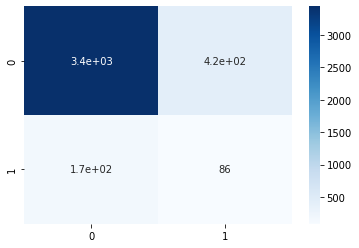

In [56]:
import seaborn as sns
import sklearn
r2 = sklearn.metrics.confusion_matrix(y_predicted, data_test.maslow)
print(r2)
ax = sns.heatmap(r2, annot=True, cmap='Blues')

In [57]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

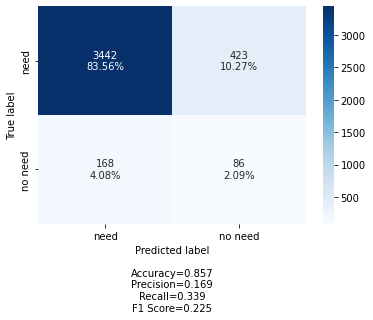

In [58]:
import matplotlib.pyplot as plt
number = [0,1]
category = ['need','no need']
make_confusion_matrix(r2, group_names=number, categories=category, cmap='Blues')

In [59]:
def get_mistakes(prediction_values, actual_values, test_sentences, actual_category, predicted_category,samples_shown):
    # Make sure you Map catgory with the labels mapping as index. If label is 0 then the category index in the list should be 0
    count = 0
    correct_index = category.index(actual_category)
    incorrect_index = category.index(predicted_category)
    print('Text classified as ',category[incorrect_index]," but actual category is ",category[correct_index])
    for i in range(0,len(prediction_values)):
        if prediction_values[i] == incorrect_index and actual_values[i] == correct_index and count != samples_shown:
            print(str(i),test_sentences[i])
            count = count + 1

In [60]:
get_mistakes(prediction_values = list(y_predicted),
             actual_values = list(data_test.maslow),
             test_sentences = list(data_test.sentence),
             actual_category = 'need', 
             predicted_category = 'no need',
             samples_shown = 10)

Text classified as  no need  but actual category is  need
24 ginas car caught a flat tirehowever rob was able to meet up with her and replace it
25 i was walking down the streets of bombayi saw a stray dogi smiled at him and continued walkingthe following day i was walking down the same street
35 emily could not wait to watch the fireworks display
71 antwan was very young when his mother died
78 lincoln was walking to his room with his laptophe tripped on a toy and dropped the computereverything snapped and he could tell it was ruinedhe stayed up all night trying to fix it but knew it was uselessluckily he had a warranty to replace it
111 i see old joe everyday i walk to workyesterday i did not see him
113 mary found a pendant on the street
114 john has a teacher he really disliked
210 my friend patty has had a very rough time so far this weekfirst on monday she got a flat tire on her way to workon tuesday she missed an appointment because she had to work late
216 yesterday there was a

#### Ignore

In [ ]:
texts = input(str('input the text '))
x_val = tokenizer(
    text = texts,  
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = 'max_length',
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True
)
validation = model.predict({'input_ids':x_val['input_ids'], 'attention_mask':x_val['attention_mask']})*100 
validation

input the text I am tired


array([[37.3986  , 10.790863, 97.73828 , 36.55313 , 39.555515]],
      dtype=float32)

In [ ]:
for key, value in zip(encoded_dict.keys(), validation[0]):
    print(key, value)

esteem 37.3986
love 10.790863
physiological 97.73828
spiritual growth 36.55313
stability 39.555515


In [ ]:
reddit_data = pd.read_excel('reddit_data_with_predictions.xlsx')
reddit_data = reddit_data[['sentence']]

In [ ]:
df_cleaned = text_preprocessing(reddit_data,'sentence')

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

In [ ]:
df_cleaned['num_words'] = df_cleaned.sentence.apply(lambda x:len(x.split()))

In [ ]:
df_cleaned

,sentence,num_words
0,it feels like everyone else is passing me by a...,87
1,i do not know why but no matter what i do life...,79
2,recently i have been having obsessive thoughts...,417
3,he hides it from his friends whom he plays gam...,55
4,hello i have 22f struggled with my mental heal...,304
5,i fucked up and i need help apologizing to som...,70
6,i have just lost all my friends and i feel lik...,39
7,hello i am looking for support or just anyone ...,599
8,hey my friend has been struggling with a lot o...,69
9,everyday feels the same and i am distancing my...,136


In [ ]:
df_cleaned.num_words.max()

2608

In [ ]:
x_test = tokenizer(
    text = df_cleaned.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

array([0.63248813, 0.4430282 , 0.19274719, 0.81802523, 0.3240795 ],
      dtype=float32)

In [ ]:
#y_predicted = np.argmax(predicted_raw[0])
#y_predicted

3

In [ ]:
#'esteem':0, 'love':1,'physiological':2, 'spiritual growth':3, 'stability':4
category = ['esteem','love','physiological','spiritual growth','stability']
#category[y_predicted]

In [ ]:
y_predicted = np.argmax(predicted_raw, axis = 1) 

In [ ]:
lis = []
for val in y_predicted:
    print(category[val])
    lis.append(category[val])
df_cleaned['prediction'] = lis

spiritual growth
love
esteem
esteem
esteem
love
love
love
love
love
stability
love
love
love
love
spiritual growth
love
spiritual growth
love
love
spiritual growth
love
spiritual growth
spiritual growth
love
love
love
love
love
love
love
stability
esteem
spiritual growth
love
stability
stability
spiritual growth
love
spiritual growth
esteem
esteem
physiological
spiritual growth
esteem
spiritual growth
stability
spiritual growth
spiritual growth


In [ ]:
df_cleaned.head()

,sentence,num_words,prediction
0,it feels like everyone else is passing me by a...,87,spiritual growth
1,i do not know why but no matter what i do life...,79,love
2,recently i have been having obsessive thoughts...,417,esteem
3,he hides it from his friends whom he plays gam...,55,esteem
4,hello i have 22f struggled with my mental heal...,304,esteem


In [ ]:
from google.colab import files
df_cleaned.to_excel('reddit_data_with_predictions.xlsx')
files.download('reddit_data_with_predictions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>